# README
this is just a copy of hte preivous algo and I have created all the neccessary funcitons at the top. I will keep using htis one as a workbook and create new files fro

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime as dt
pd.set_option('display.max_columns', None) # so that we can view the pandas dataframes better source link
pd.set_option("display.precision", 2) # https://towardsdatascience.com/pandas-full-tutorial-on-a-single-dataset-4aa43461e1e2


#All necessary plotly libraries
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Algo v0.1: An initial attempt at a simple algo to get some ideas
### I have explored this further later where I develop these ideas further

<Axes: >

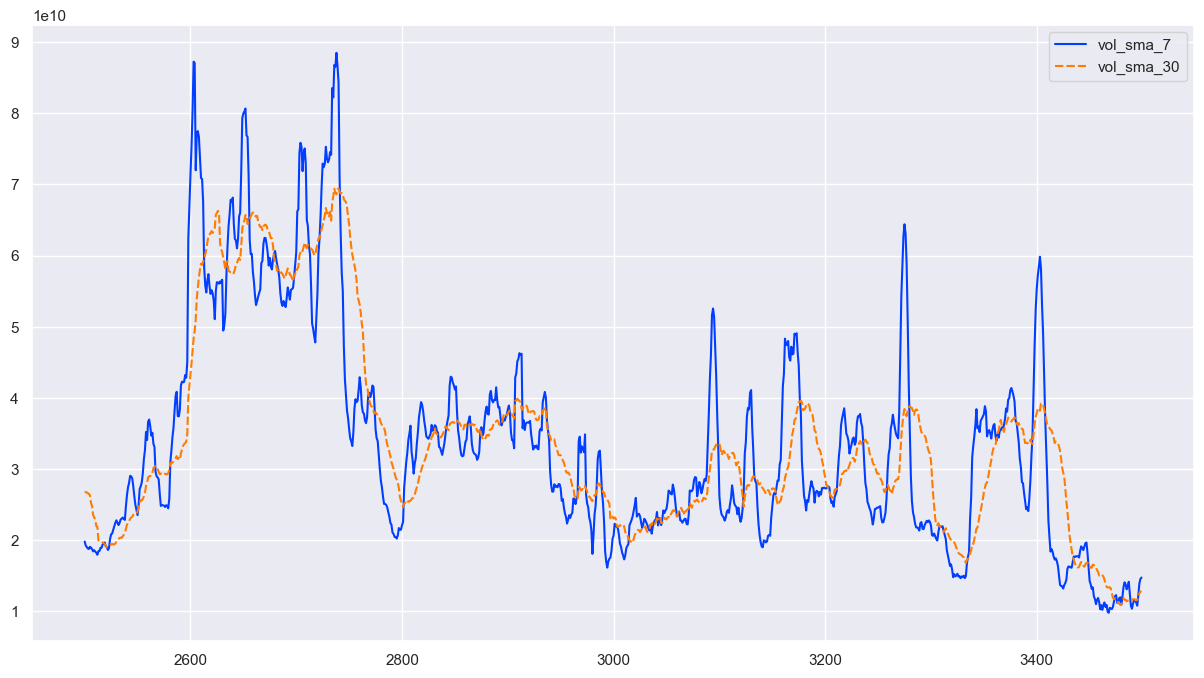

In [67]:
sns.lineplot(data=btc_hist_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from the above and below charts
- Volume is MUCH more volatile than price 
- Since we are interested in higher time frame trades, it seems more useful to only look at SMAs as they smooth out the curve
- Deviation between 7-day and 30-day SMA of volumes seems to strongly predict whats going to happen
- Size of deviation seems to provide confidence/predict size of the move
- WHEN STUFF GOES UP, then 7-day vol moves significantly above 30-day vol and stays there, this is pretty strong and slightly predictive

- WHEN STUFF GOES DOWN, then 1. There is a large increase in 7-day vol compated to 30-day vol, followed by it going much lower the PRICE follows this pattern by a few days 


## <font color='orange'> Notes from observations on 23 June </font>
<font color='blue'> **(this is much later than the original observations)** </font> 
* Next time, I should plot price on the same graph as indicators as in this case, plotting them on separate graphs, caused me to realise, much later, that the signals I thought were predictive were actually lagging and hence much less useful!

<Axes: >

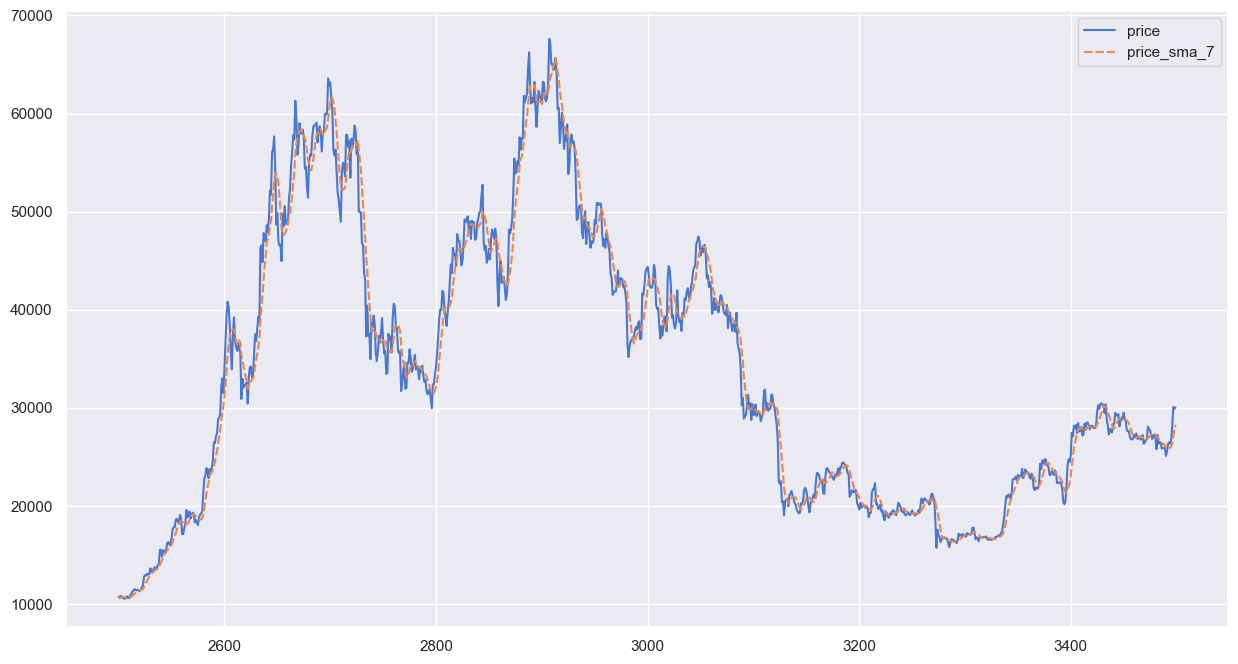

In [68]:
sns.lineplot(data=btc_hist_prices[['date','price','price_sma_7']].tail(1000),palette='muted')

<Axes: >

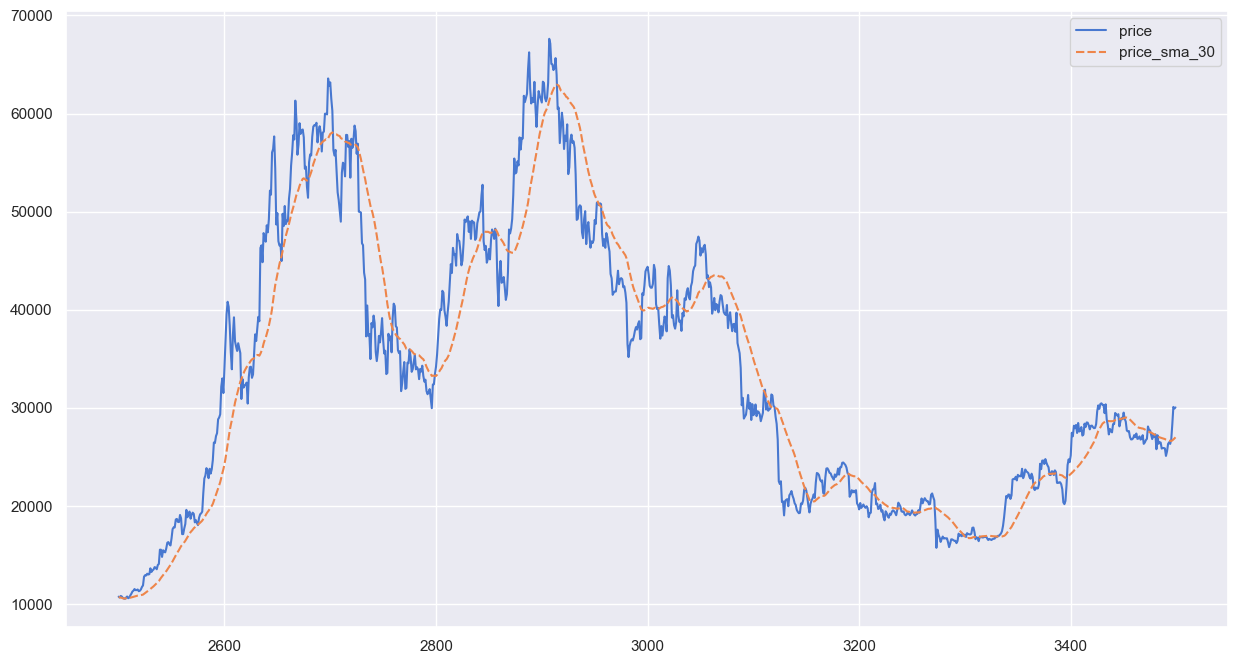

In [69]:
sns.lineplot(data=btc_hist_prices[['date','price','price_sma_30']].tail(1000),palette='muted')

## <font color='orange'> Notes from observations on 23 June </font>
<font color='blue'> **(this is much later than the original observations)** </font> 
* It seems like simply buying as soon as price exceeds 30-day average and selling once it touches 30 day moving average again is a great algorithm
* I am going to test this algo and if it worked all right, I am going to use that as the base algo going forwards to be built on top of


<Axes: >

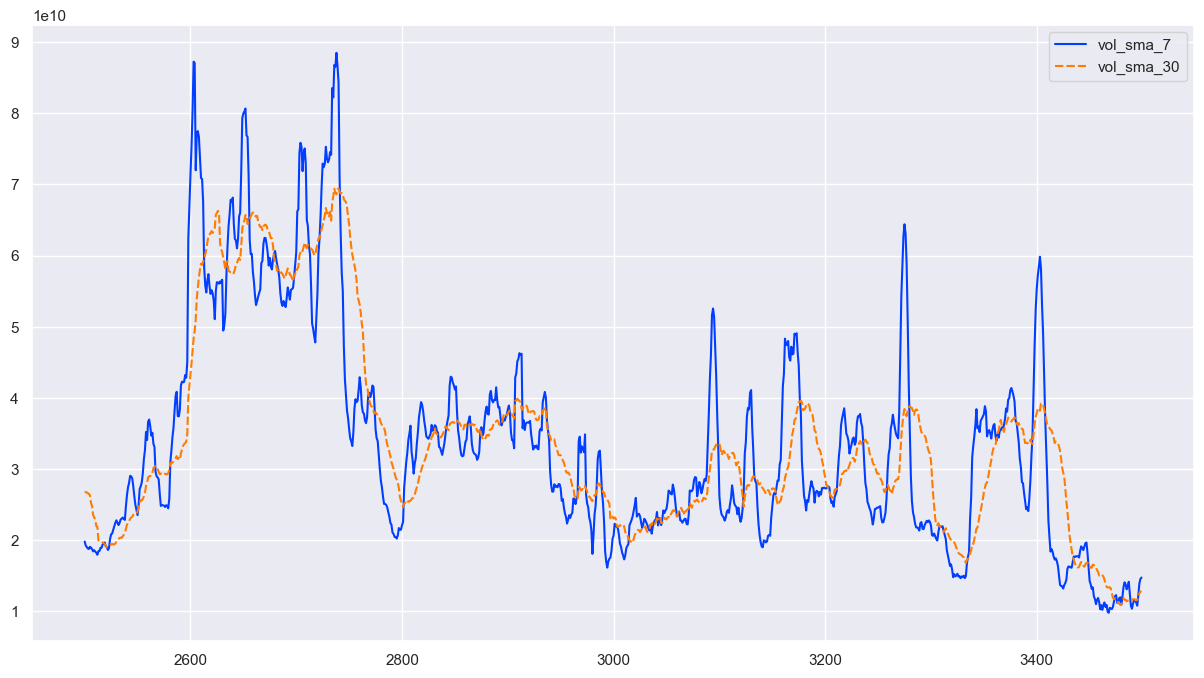

In [70]:
sns.lineplot(data=btc_hist_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from above 2 and the below graphs 
- WHEN STUFF GOES UP then 30-day vol is significantly up than 7-day vol AND 7-day price is above 30-day price significantly too (say 10%)
- WHEN STUFF goes down then 30-day vol is significantly higher than 7-day and 7-day price is signficantly (Say 10%) lower than 30-day price


<Axes: >

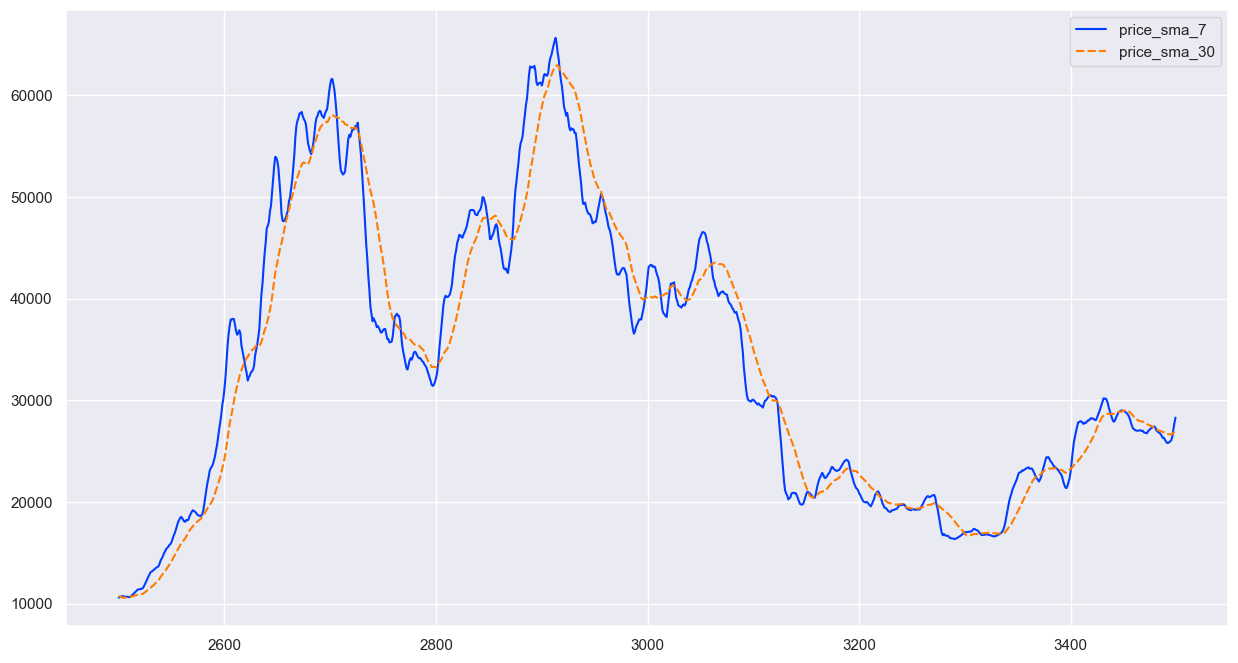

In [71]:


sns.lineplot(data=btc_hist_prices[['date','price_sma_7','price_sma_30']].tail(1000),palette='bright')


# A simple algorithm could be:

1. When 7-day vol is above a threshold (say 25%) than 30-day vol and 7-day price is above another threshold (say 10%) (i.e. trending up) then BUY 
2. When 7-day vol threshold is above another threshold (say 25%) above 30-day vol and 7-day price is below another thresold, say 10% (i.e.price is trending down) then SELL
3. 7-day vol going siginifcantly lower than 30-day will confirm the bearish trend
4. Similarly 7-day prices consistently staying above 30-days confirms the bull trend


### Some ideas
- shall i consider having diff between sma7 and sma 30 values? and perhaps use them as a feature in the model?
- shall i consider having volaitility/std dev to come up with the thresholds to detect a signal?

### Ideas on designing the algorithm

## Signal
1. One function should simply return whether we should buy or sell or do nothing on a given date
2. LATER I can add functionality that will help with sizing/confidence. Perhaps it will be best to keep asset allocation and risk management out of this piece, as that could be more global and this could just give us the signal, confidence level and perhaps an indication of size of the move

### Backtesting 
1. Perhaps I can just calculate the price on the day of entry and then at exit, and cal the % gain and use that as the metric to be optimised as well. Later I can think about making this much more sophisiticated I suppose, but in the beginning this shoudl suffice 

### Designing 
1. I must explore if there were ways of visualising the signals and deviations i.e. the workigns of the algo
2. I can try and do some initial adjustments to the thresholds and backtest and refine 
3. Once a basic and not very scary initial algo is made, I will move to actually executing trades and using the Kraken API to start doing so 
4. Later I will conitnue to work on making the basic algo more sophisticated, performant and better technically designed (e.g. running on a server, broken up into components, etc.)
5. I am first going to get a basic version working i.e. deploying actual money, before moving on to making it better

### Future
1. at some point, after the basic version is working, I will explore adding additional signals like coins moving onn/off exchange, signals from other coins, copy trading/wallet/blockhain analysis, tradfi signals, twitter sentiment, etc. to my algo 
2. Once I have had a few go s at teh algo my self, with raw thinking and Neha's help, then I will study existing materials and books to understand algo trading better 

## Designing the simple algorithm 
- this is for BTC at the moment, later I will add same thing for ETH as well 

### <font color='purple'> find out if I can visualise buy/sell signals on the chart </font>

In [72]:
### Showing annotations on the plot 

In [73]:
## generate a temp signal array 

In [74]:
# great link on finding no. of rows in a df
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
#del(temp)
temp = [None]*len(btc_hist_prices.index)
temp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [75]:
# great link on generating a given no. of rand integers from a given sample 
# https://pynative.com/python-random-randrange/ 
for i in random.sample(range(0,3500),25):
    temp[i]='BUY'
    
for i in random.sample(range(0,3500),25):
    temp[i]='SELL'
    
temp


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'BUY',
 None,
 None,
 'BUY',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 No

In [76]:
len(btc_hist_prices.index)

3500

In [77]:
btc_hist_prices['temp_signal'] = temp


In [78]:
# 2 neat ways of filtering on non-empty rows for a given column
#https://stackoverflow.com/questions/39475566/python-pandas-filter-out-records-with-null-or-empty-string-for-a-given-field 
btc_hist_prices[~btc_hist_prices.temp_signal.isnull()]

date         price    market_cap        volume coin   price_sma_7   
18   2013-12-11    887.080000  1.074125e+10  0.000000e+00  btc    896.648571  \
23   2013-12-16    789.150000  9.573258e+09  0.000000e+00  btc    871.580000   
57   2014-01-19    838.170000  1.029334e+10  1.757410e+07  btc    838.357143   
60   2014-01-22    865.030000  1.063502e+10  1.787990e+07  btc    847.542857   
72   2014-02-03    813.380000  1.004329e+10  1.275920e+07  btc    815.894286   
109  2014-03-12    638.070000  7.979719e+09  2.080630e+07  btc    628.882857   
219  2014-06-30    637.755000  8.269626e+09  4.701597e+07  btc    593.260729   
296  2014-09-15    473.031300  6.278083e+09  1.272350e+07  btc    474.680029   
392  2014-12-20    328.774000  4.480154e+09  6.432849e+07  btc    328.312714   
395  2014-12-23    333.970000  4.555334e+09  5.857179e+07  btc    322.609143   
443  2015-02-10    220.649300  3.049997e+09  6.670897e+07  btc    222.223114   
460  2015-02-27    253.899100  3.525783e+09  1.371865e+08  btc    240.572922   
496  2015-04-04    253.321300  3.551248e+09  6.395913e+07  btc    248.255029   
503  2015-04-11    236.450100  3.319541e+09  8.763500e+07  btc    246.684365   
551  2015-05-29    237.071400  3.369940e+09  3.110842e+07  btc    238.143399   
592  2015-07-09    268.892800  3.862504e+09  7.594063e+07  btc    265.585913   
604  2015-07-21    274.942888  3.961652e+09  4.323914e+07  btc    276.925779   
684  2015-10-09    244.205100  3.588832e+09  1.091540e+08  btc    242.103571   
933  2016-06-14    685.932132  1.074043e+10  1.295618e+09  btc    628.522353   
946  2016-06-27    648.300000  1.018270e+10  1.893446e+09  btc    640.739584   
970  2016-07-21    665.364385  1.049352e+10  6.517366e+08  btc    670.454462   
984  2016-08-04    576.603707  9.107193e+09  1.656264e+09  btc    600.357690   
1089 2016-11-17    738.480000  1.181046e+10  5.475859e+09  btc    716.976725   
1119 2016-12-17    788.877500  1.266060e+10  1.759607e+09  btc    778.079800   
1131 2016-12-29    971.721300  1.561702e+10  3.796961e+09  btc    926.242833   
1440 2017-11-03   7234.738382  1.205467e+11  2.826731e+09  btc   6477.174115   
1511 2018-01-13  15193.314898  2.552657e+11  3.134248e+09  btc  15436.773086   
1852 2018-12-20   3687.750553  6.436355e+10  4.721563e+09  btc   3400.004137   
2221 2019-12-24   7335.207616  1.329316e+11  3.023586e+10  btc   7172.126791   
2249 2020-01-21   8631.253954  1.568480e+11  2.952769e+10  btc   8782.106716   
2339 2020-04-20   7127.511950  1.306807e+11  2.971477e+10  btc   6973.194203   
2345 2020-04-26   7538.557687  1.382981e+11  3.161017e+10  btc   7193.249505   
2359 2020-05-10   9566.777187  1.757526e+11  4.670654e+10  btc   9324.108892   
2388 2020-06-08   9738.603357  1.791677e+11  2.385664e+10  btc   9734.719001   
2405 2020-06-25   9288.061774  1.710283e+11  2.318376e+10  btc   9423.226485   
2551 2020-11-18  17651.820428  3.274488e+11  3.157238e+10  btc  16389.332814   
2575 2020-12-12  18058.027340  3.353108e+11  2.608020e+10  btc  18697.865564   
2613 2021-01-19  36595.464769  6.826472e+11  4.676903e+10  btc  36581.293789   
2648 2021-02-23  54410.856295  1.012092e+12  1.015320e+11  btc  53944.487478   
2674 2021-03-21  58376.158471  1.090022e+12  5.454911e+10  btc  57945.902065   
2769 2021-06-24  33702.617794  6.316348e+11  3.979824e+10  btc  34766.534594   
2776 2021-07-01  35171.486305  6.602004e+11  3.102415e+10  btc  34135.310693   
2821 2021-08-15  47088.853135  8.865935e+11  3.329485e+10  btc  45808.161052   
3187 2022-08-16  24179.014652  4.624372e+11  3.340481e+10  btc  24062.550236   
3218 2022-09-16  19702.169890  3.777194e+11  3.371596e+10  btc  21041.357870   
3400 2023-03-17  25161.272018  4.863756e+11  6.068806e+10  btc  23054.624712   
3460 2023-05-16  27227.793423  5.276552e+11  1.457003e+10  btc  27142.472334   
3486 2023-06-11  25858.122892  5.016539e+11  9.755627e+09  btc  26500.934037   
3497 2023-06-22  30101.764819  5.840705e+11  2.375725e+10  btc  27134.015139   

      pric

In [79]:
btc_hist_prices.temp_signal.unique()

array([None, 'SELL', 'BUY'], dtype=object)

In [80]:
# using enumerate to grab indexes and signals from btc historical prices df 
# we will actually use iterrows as thats a pandas specific way to do it and makes is much much easier for our case
# since we want to do this on .tail(1000) elements only 
for (i,signal) in enumerate(btc_hist_prices.temp_signal):
    if (signal != None):
        print(btc_hist_prices.date[i], btc_hist_prices.price[i], signal)

2013-12-11 00:00:00 887.08 SELL
2013-12-16 00:00:00 789.15 SELL
2014-01-19 00:00:00 838.17 BUY
2014-01-22 00:00:00 865.03 BUY
2014-02-03 00:00:00 813.38 SELL
2014-03-12 00:00:00 638.07 SELL
2014-06-30 00:00:00 637.7549999999999 SELL
2014-09-15 00:00:00 473.0313 SELL
2014-12-20 00:00:00 328.7740000000001 BUY
2014-12-23 00:00:00 333.97 SELL
2015-02-10 00:00:00 220.6493 SELL
2015-02-27 00:00:00 253.8991 SELL
2015-04-04 00:00:00 253.3213 SELL
2015-04-11 00:00:00 236.4501 BUY
2015-05-29 00:00:00 237.0714 SELL
2015-07-09 00:00:00 268.8928000000001 SELL
2015-07-21 00:00:00 274.9428876558478 BUY
2015-10-09 00:00:00 244.2051 SELL
2016-06-14 00:00:00 685.932131564762 SELL
2016-06-27 00:00:00 648.2999999999998 BUY
2016-07-21 00:00:00 665.3643845142738 SELL
2016-08-04 00:00:00 576.6037067248545 SELL
2016-11-17 00:00:00 738.4799999999999 BUY
2016-12-17 00:00:00 788.8774999999998 SELL
2016-12-29 00:00:00 971.7212999999998 BUY
2017-11-03 00:00:00 7234.73838202036 BUY
2018-01-13 00:00:00 15193.3148979

In [81]:
# iterrows is a pandas provided iterator that returns the entire pandas dataframe row and helps us iterate
#over the df this way we dont have to worry about index of the dataframe. I was using enumerate, however, i also 
#wanted to manipulate tail(1000) elements only which was proving to be pretty difficult but iterrows is teh natural
#way of doing it (suggested by Neha)
# here is a nice quick link on using iterrows: 
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas 


for index, row in btc_hist_prices.iterrows():
    if (row['temp_signal'] != None):
        print(row['date'], row['price'], row['temp_signal'])

2013-12-11 00:00:00 887.08 SELL
2013-12-16 00:00:00 789.15 SELL
2014-01-19 00:00:00 838.17 BUY
2014-01-22 00:00:00 865.03 BUY
2014-02-03 00:00:00 813.38 SELL
2014-03-12 00:00:00 638.07 SELL
2014-06-30 00:00:00 637.7549999999999 SELL
2014-09-15 00:00:00 473.0313 SELL
2014-12-20 00:00:00 328.7740000000001 BUY
2014-12-23 00:00:00 333.97 SELL
2015-02-10 00:00:00 220.6493 SELL
2015-02-27 00:00:00 253.8991 SELL
2015-04-04 00:00:00 253.3213 SELL
2015-04-11 00:00:00 236.4501 BUY
2015-05-29 00:00:00 237.0714 SELL
2015-07-09 00:00:00 268.8928000000001 SELL
2015-07-21 00:00:00 274.9428876558478 BUY
2015-10-09 00:00:00 244.2051 SELL
2016-06-14 00:00:00 685.932131564762 SELL
2016-06-27 00:00:00 648.2999999999998 BUY
2016-07-21 00:00:00 665.3643845142738 SELL
2016-08-04 00:00:00 576.6037067248545 SELL
2016-11-17 00:00:00 738.4799999999999 BUY
2016-12-17 00:00:00 788.8774999999998 SELL
2016-12-29 00:00:00 971.7212999999998 BUY
2017-11-03 00:00:00 7234.73838202036 BUY
2018-01-13 00:00:00 15193.3148979

### Adding annotations to plot

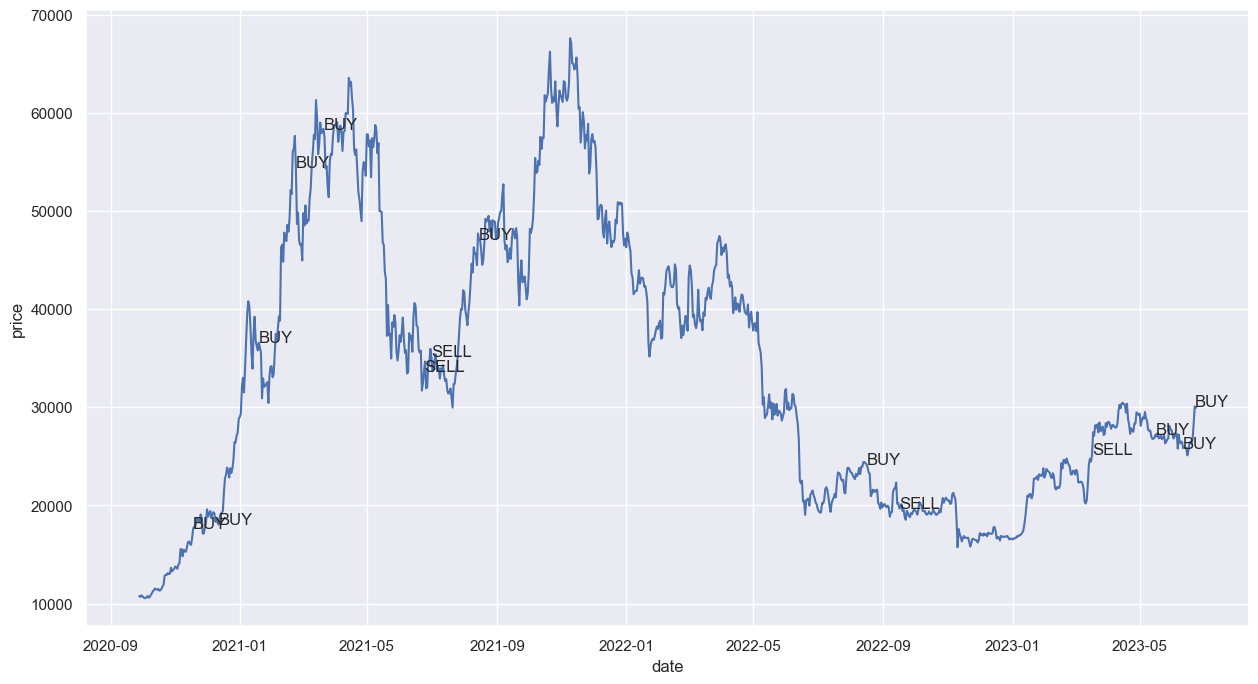

In [82]:
# https://www.geeksforgeeks.org/how-to-add-text-to-matplotlib/
# good link on adding text and annotations to plots
sns.lineplot(x='date',y='price',data=btc_hist_prices[['date','price','price_sma_30']].tail(1000))

for index, row in btc_hist_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

#plt.show()


### Figuring out how to plot multiple lines on the same plot 

In [83]:
## METHOD1: Add multiple plots. PROs: easy syntax, easy to understanding, no melting needed CONS: legend and labeling

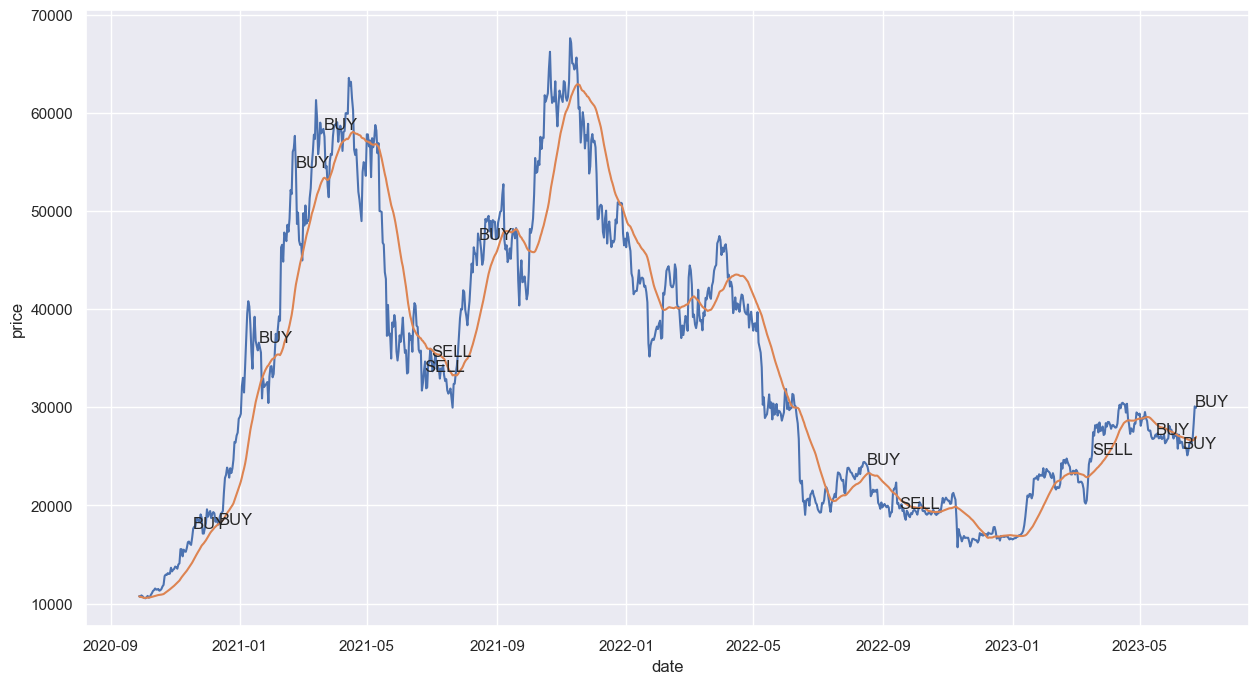

In [84]:

sns.lineplot(x='date', y='price',data=btc_hist_prices[['date','price','price_sma_30']].tail(1000))

sns.lineplot(x='date', y='price_sma_30',data=btc_hist_prices[['date','price','price_sma_30']].tail(1000))

for index, row in btc_hist_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

In [85]:
## MEthOD2: Usign melt function PROS: axes, legend, etc. easy and natural CONS: unneccessary manipulation of data to fit a plotting library 

In [86]:
# plotting several lines on the same plot, trying to use melt function to do this 
# info at the end of this link: https://www.statology.org/seaborn-plot-multiple-lines/
data=pd.melt(btc_hist_prices[['date','price','price_sma_30']].tail(10), ['date'])
data

date      variable         value
0  2023-06-15 00:00:00         price  25107.754696
1  2023-06-16 00:00:00         price  25564.599633
2  2023-06-17 00:00:00         price  26327.325669
3  2023-06-18 00:00:00         price  26501.044442
4  2023-06-19 00:00:00         price  26333.092530
5  2023-06-20 00:00:00         price  26779.387462
6  2023-06-21 00:00:00         price  28330.891420
7  2023-06-22 00:00:00         price  30101.764819
8  2023-06-23 00:00:00         price  29935.632107
9  2023-06-23 05:35:52         price  30048.436298
10 2023-06-15 00:00:00  price_sma_30  26758.737860
11 2023-06-16 00:00:00  price_sma_30  26710.134075
12 2023-06-17 00:00:00  price_sma_30  26674.712547
13 2023-06-18 00:00:00  price_sma_30  26663.315612
14 2023-06-19 00:00:00  price_sma_30  26644.939661
15 2023-06-20 00:00:00  price_sma_30  26634.459540
16 2023-06-21 00:00:00  price_sma_30  26686.361579
17 2023-06-22 00:00:00  price_sma_30  26794.097539
18 2023-06-23 00:00:00  price_sma_30  26884.520684
19 2023-06-23 05:35:52  price_sma_30  27008.170263

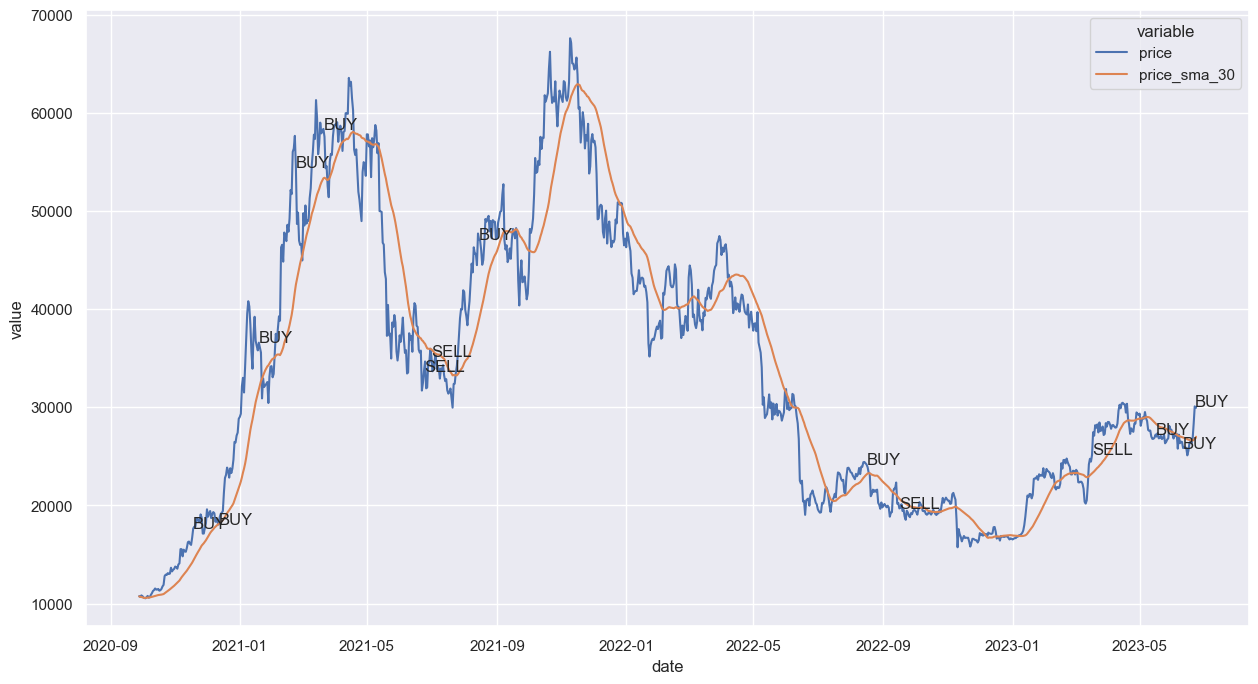

In [87]:

sns.lineplot(x='date',y='value',data=pd.melt(btc_hist_prices[['date','price','price_sma_30']].tail(1000), ['date']),hue='variable')

for index, row in btc_hist_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

In [88]:
##Method 3, provide all rows as a single data frame PROs: no melting needed   CONS: x-axis is screwed; its a sequence rather than dates
# not going to use this one as cant annotate text and hard to interpret

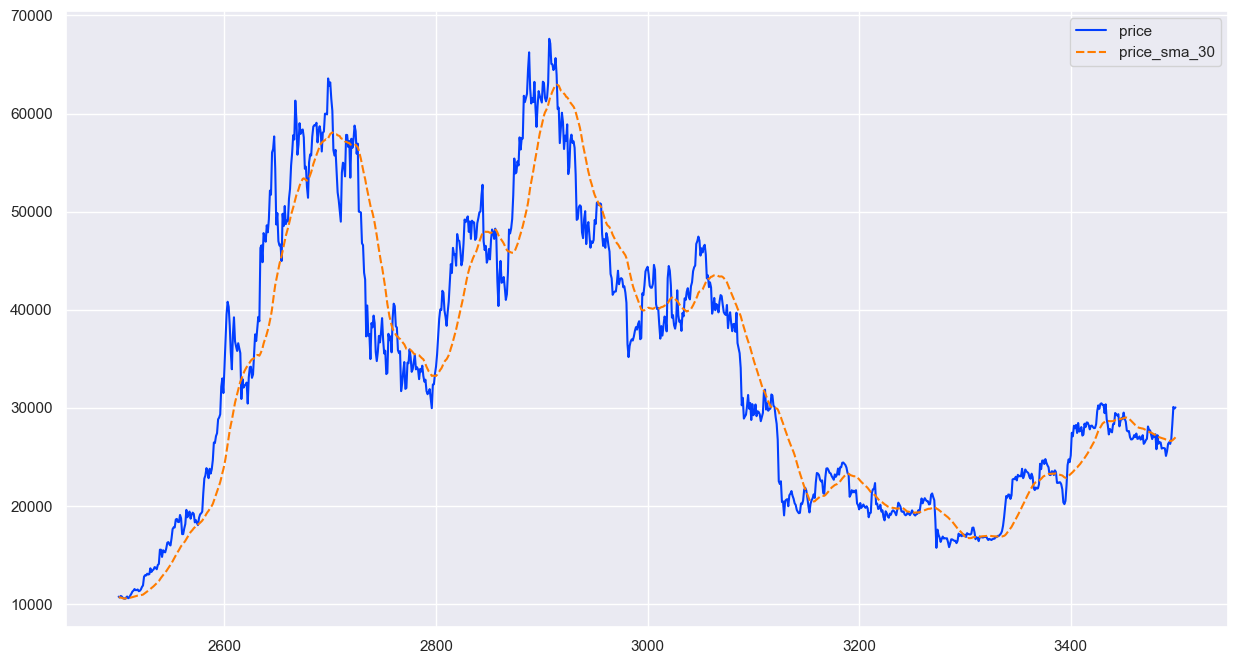

In [89]:
sns.lineplot(data=btc_hist_prices[['date','price','price_sma_30']].tail(1000),palette='bright')
#for index, row in btc_hist_prices.tail(1000).iterrows():
 #   if (row['temp_signal'] != None):
  #      plt.text(row['date'], row['price'], row['temp_signal'])
# X axis is fucked which is likely the reason I cant print text annotations as date is not really the x axis here!!
plt.show()

In [90]:
##Method 4: OLD school, use matplotlib
# for laters, If time permits, not a priority as I already found 2 useful methods!

### Visualising the % deviations on the chart 

#### plotting 2 axes on a plot 
good quick link for this: https://stackoverflow.com/questions/47591650/second-y-axis-time-series
basically create and use another axis


<Axes: xlabel='date', ylabel='dev_price_sma_30'>

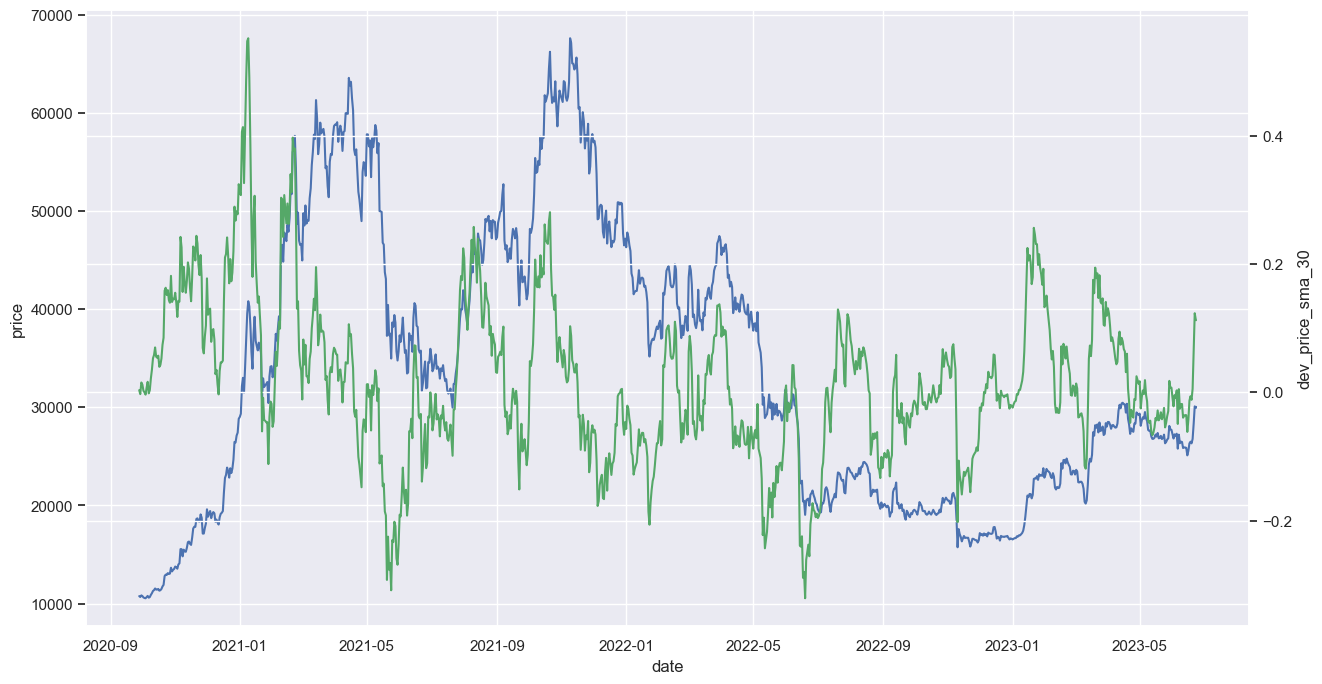

In [91]:
sns.lineplot(x='date', y='price',
             data=btc_hist_prices[['date','price','price_sma_30']].tail(1000),color='b')
ax2=plt.twinx() #this does the magic
sns.lineplot(x='date', y='dev_price_sma_30',
              data=btc_hist_prices[['date','dev_price_sma_7','dev_price_sma_30']].tail(1000),color='g',ax=ax2)

#### plotting deviations on the chart 

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

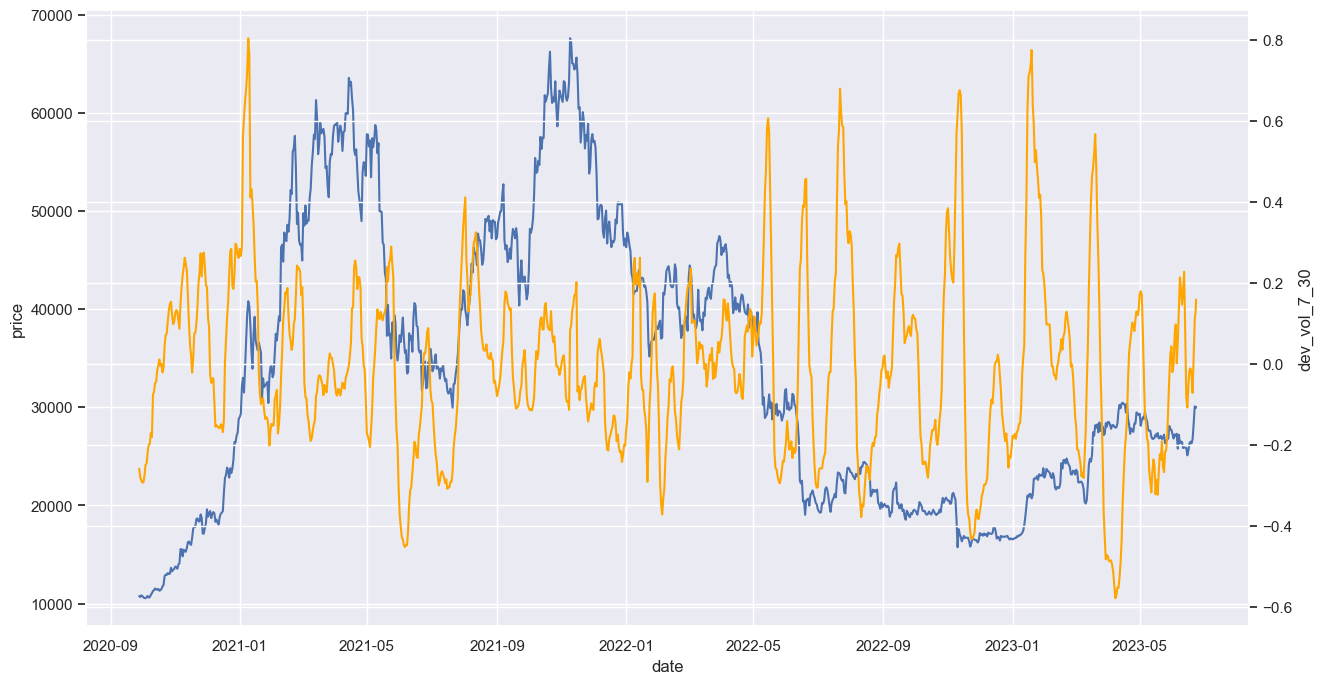

In [92]:
sns.lineplot(x='date', y='price',
             data=btc_hist_prices[['date','price','price_sma_30']].tail(1000),color='b')
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_hist_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(1000),color='orange',ax=ax2)

In [93]:
btc_hist_prices.describe()

date         price    market_cap   
count                           3500   3500.000000  3.499000e+03  \
mean   2018-09-08 09:03:10.215428352  12446.799530  2.311099e+11   
min              2013-11-23 00:00:00    172.147900  2.362640e+09   
25%              2016-04-16 18:00:00    620.510350  9.064534e+09   
50%              2018-09-08 12:00:00   6658.357601  1.151775e+11   
75%              2021-01-30 06:00:00  18545.314733  3.423976e+11   
max              2023-06-23 05:35:52  67617.015545  1.278798e+12   
std                              NaN  15749.068685  2.984697e+11   

             volume   price_sma_7  price_sma_30  price_sma_90  price_sma_180   
count  3.500000e+03   3494.000000   3471.000000   3411.000000    3321.000000  \
mean   1.498097e+10  12442.313831  12433.430482  12402.430714   12377.852653   
min    0.000000e+00    203.151300    224.437643    236.047097     242.357982   
25%    3.813580e+08    621.516464    611.363993    605.922722     590.937093   
50%    4.496849e+09   6614.851383   6693.768469   7015.515946    7351.796169   
75%    2.525304e+10  18318.223644  18171.523708  18349.669409   19388.013359   
max    1.788941e+11  65652.921591  62939.128266  56243.654655   50537.138808   
std    1.870585e+10  15730.687868  15672.608386  15472.710609   15147.710425   

          vol_sma_7    vol_sma_30  ...  dev_price_sma_7  dev_price_sma_30   
count  3.494000e+03  3.471000e+03  ...      3494.000000       3471.000000  \
mean   1.499178e+10  1.504993e+10  ...         0.003547          0.018497   
min    0.000000e+00  0.000000e+00  ...        -0.345271         -0.432662   
25%    4.412646e+08  4.862217e+08  ...        -0.020441         -0.053961   
50%    4.472206e+09  4.481977e+09  ...         0.002428          0.008633   
75%    2.614678e+10  2.718848e+10  ...         0.029370          0.082472   
max    8.849832e+10  6.941579e+10  ...         0.444755          1.021754   
std    1.788060e+10  1.736551e+10  ...         0.052529          0.127327   

       dev_price_sma_90  dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30   
count       3411.000000        3321.000000    3466.000000     3466.000000  \
mean           0.062067           0.141766       0.017774        0.078230   
min           -0.495556          -0.582205      -0.987693       -0.993005   
25%           -0.106533          -0.160642      -0.187750       -0.252038   
50%            0.018843           0.072417      -0.037840       -0.053660   
75%            0.201149           0.326961       0.144465        0.222521   
max            1.893556           2.870716       6.000000       29.000000   
std            0.258615           0.426317       0.378962        0.869513   

       dev_vol_sma_90  dev_vol_sma_180  dev_vol_7_30  dev_price_7_30  
count     3411.000000      3321.000000   3466.000000     3471.000000  
mean         0.147852         0.298407      0.045230        0.013055  
min         -0.994497        -0.992013     -0.978876       -0.347024  
25%         -0.323026        -0.345153     -0.164687       -0.043600  
50%         -0.036432        -0.031527     -0.006452        0.006838  
75%          0.382925         0.564834      0.202945        0.066082  
max         54.103480        64.850223      3.285714        0.521111  
std          1.203292         1.566255      0.382903        0.099454  

[8 rows x 22 columns]

### design a function along the lines of the algo that returns a buy/sell/do nothing on a given date

#### calculation for the buy signals

In [94]:
btc_hist_prices['signal'] = None # create a column for signal 
for index, row in btc_hist_prices.iterrows():
    if (row['dev_vol_7_30'] >=0.20 and row['dev_price_7_30'] >=0.025):
        btc_hist_prices.at[index,'signal'] ='BUY' #below is a good link on assigning a cell in pandas data frame
                                                         # https://www.geeksforgeeks.org/how-to-set-cell-value-in-pandas-dataframe/
# Will parametrise these thresholds and apply ML to find optimal ones later  

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

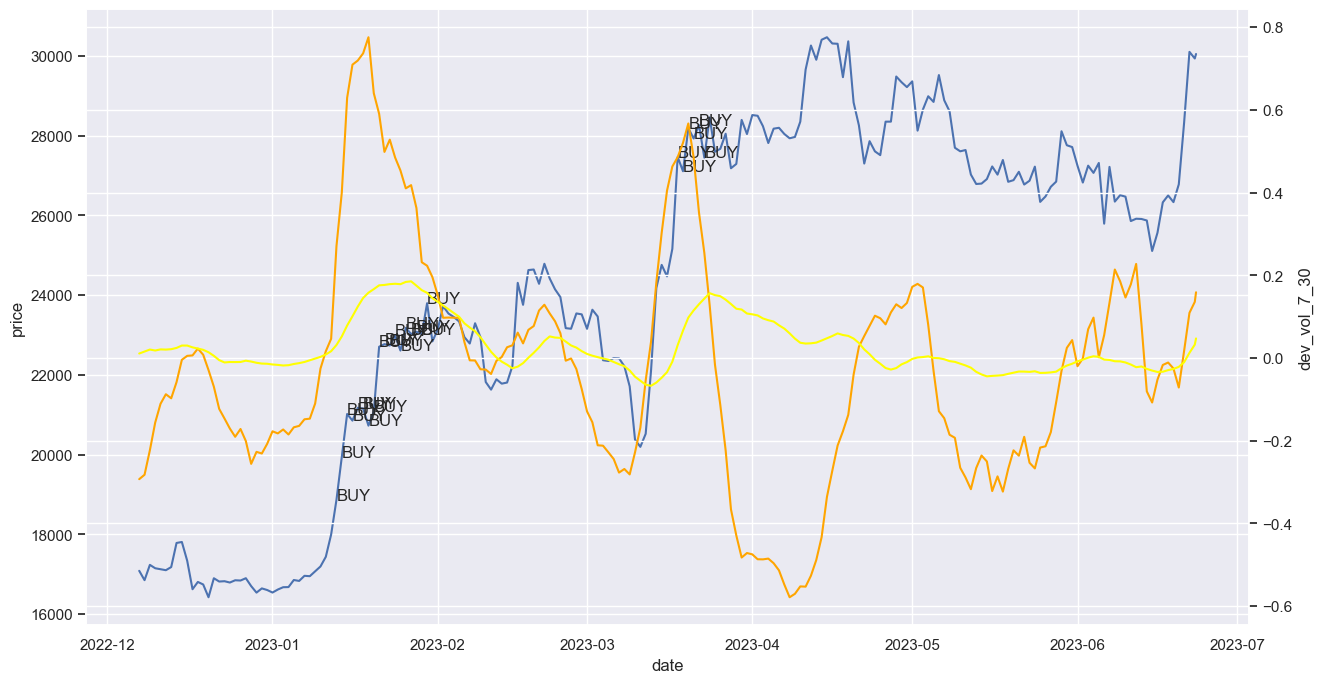

In [95]:

# plot signals and indicators for a given number of points from the tail
num_points=200

sns.lineplot(x='date', y='price',
             data=btc_hist_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_hist_prices.tail(200).iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_hist_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_7_30',
              data=btc_hist_prices[['date','dev_price_7_30']].tail(num_points),color='yellow',ax=ax2)



#### calculation for the sell signal

In [96]:
#btc_hist_prices['signal'] = None # create a column for signal 
for index, row in btc_hist_prices.iterrows():
    if (row['dev_vol_7_30'] >=0.15 and row['dev_price_sma_7'] <=0.025):
        btc_hist_prices.at[index,'signal'] ='SELL'

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

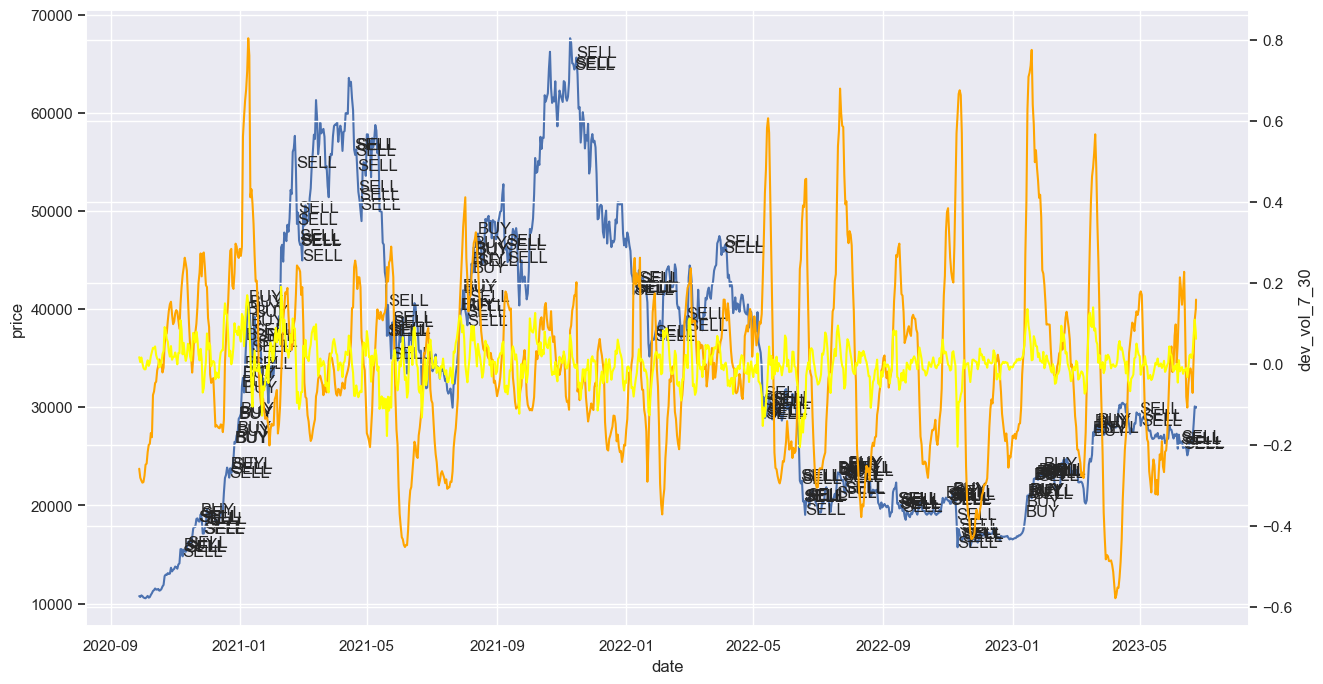

In [97]:
# plot signals and indicators for a given number of points from the tail
num_points=1000

sns.lineplot(x='date', y='price',
             data=btc_hist_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_hist_prices.tail(num_points).iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_hist_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_sma_7',
              data=btc_hist_prices[['date','dev_price_sma_7']].tail(num_points),color='yellow',ax=ax2)

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

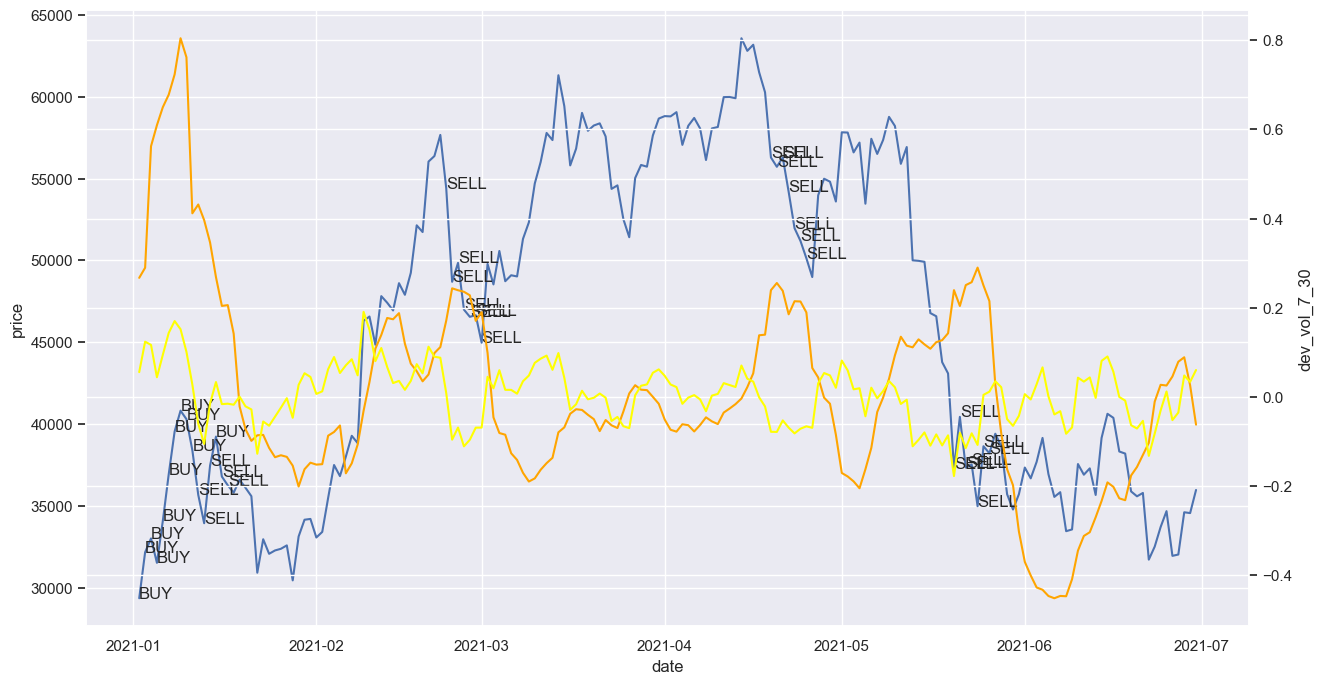

In [98]:
# plot signals and indicators for a given date range in a given range of dates 

from_date= '2021-01-01' #datetime.datetime(2021, 1, 1)
to_date= '2021-07-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')


for index, row in plot_data.iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal'])
        

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)

### Cleanup the signals 


<i>clean up the signals so that they represent trade recommendations, i.e. a single buy, followed by a sell</i>

1.  create functions or isBuyorSell() that returns whether there is a buy of a sell signal on a given date
2.  as soon as I see a BUY signal, call a 'trade' function that takes buy date as the input and returns the sell date, it also adds these on the data frame 
    the function will check isBuyorSell() from buy date+1, until it encounters a sell, upon which it will register the signal on DF and return the sell date to the calling function 
3. then we start the above function from the next date after the previous trade 

In [99]:
def isBuyorSell(date):
    return (btc_hist_prices[btc_hist_prices.date==date]['signal'].iloc[0]) # tested OK (temp comment)

In [100]:
# set buy date as the date passed and keep scanning until I find a sell, then record it and return the sell date
### LATER: I need to think about the cases where BUY and SELL were actually being calculated for the same date###
format = '%Y-%m-%d' # https://www.geeksforgeeks.org/python-convert-string-to-datetime-and-vice-versa/
                    # converting strings to dates

def create_trade(buy_date):
    if(type(buy_date)==str):
        buy_date=datetime.datetime.strptime(buy_date, format)
    sell_date=buy_date # just declaring it so that its scope it bigger and I can use it for return statement
    btc_hist_prices.loc[btc_hist_prices.date ==buy_date,'trade_reco'] ='BUY'
    
    for idate in btc_hist_prices.date:
        if (idate <= buy_date):
            continue # skip the rest of the loop until we are past the buy_date
        elif (isBuyorSell(idate)=='SELL'):
            btc_hist_prices.loc[btc_hist_prices.date ==idate,'trade_reco'] ='SELL'
            sell_date=idate
            #print('breaking now')
            break # if SELL found, break the loop
    return sell_date

In [101]:
btc_hist_prices.trade_reco = None
start_date= btc_hist_prices.loc[0]['date']

for idate in btc_hist_prices.date : ### IMP: (check with Neha)should I sort the dates in case they are not in order in DF?
    if (idate<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(idate)=='BUY'):
        start_date=create_trade(idate) # record the trade and scan next 
        

In [102]:
btc_hist_prices[btc_hist_prices.trade_reco.notnull()]

AttributeError: 'NoneType' object has no attribute 'notnull'

#### signals generated, now checking the signals and whether the code behaves as expected

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

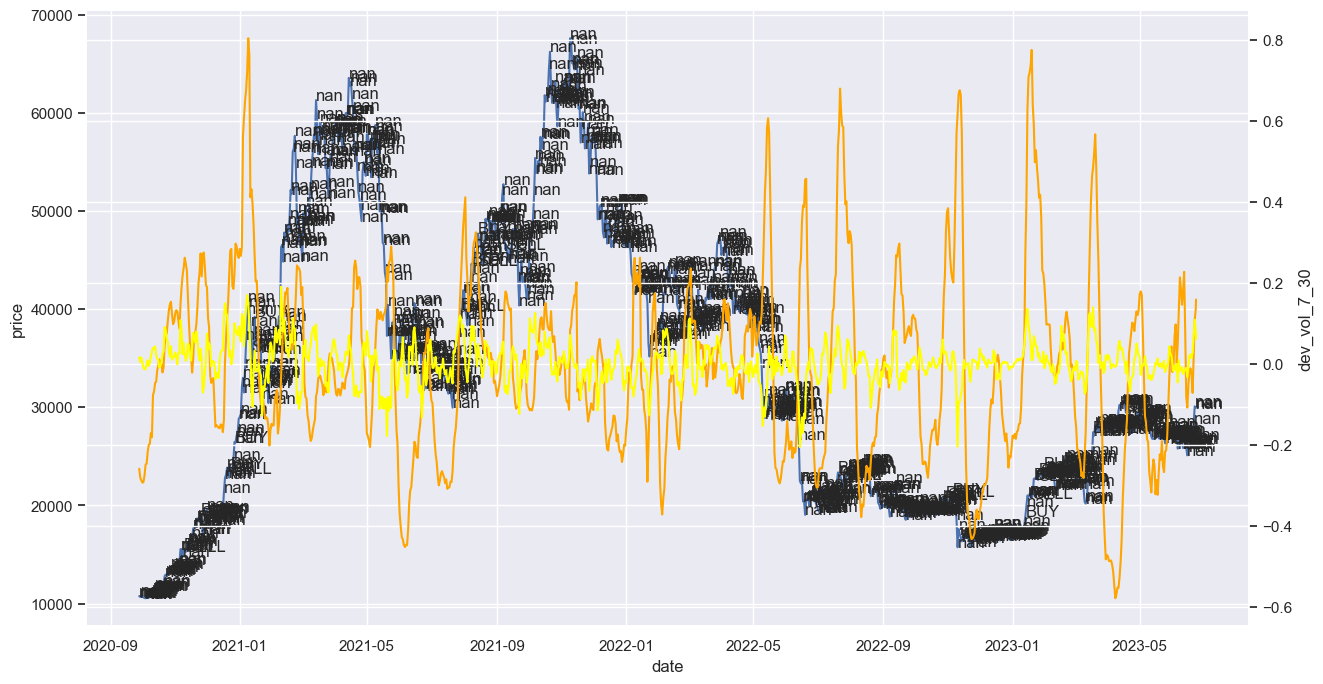

In [103]:
# plot cleaned up trade recos and indicators for a given number of points from the tail
num_points=1000

sns.lineplot(x='date', y='price',
             data=btc_hist_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_hist_prices.tail(num_points).iterrows():
    if (row['trade_reco'] != None):
        plt.text(row['date'], row['price'], row['trade_reco']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_hist_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_sma_7',
              data=btc_hist_prices[['date','dev_price_sma_7']].tail(num_points),color='yellow',ax=ax2)

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

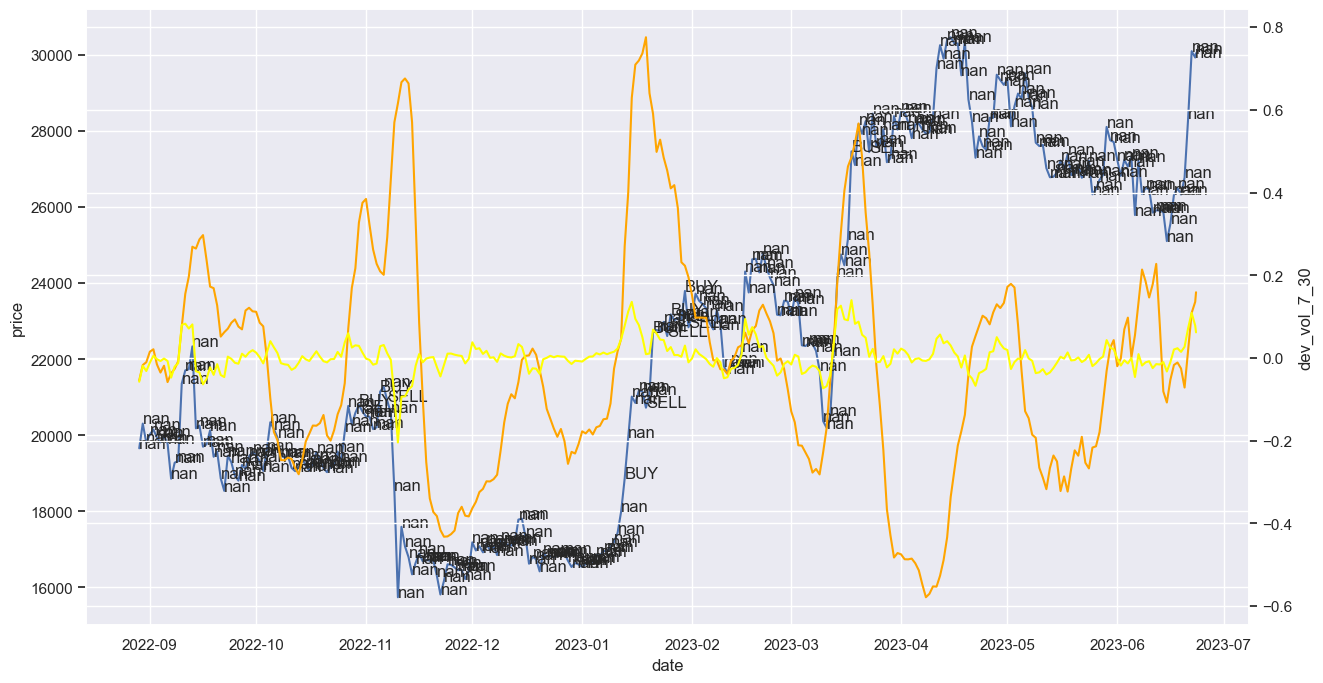

In [104]:
# plot cleaned up trade recos and indicators for a given number of points from the tail
num_points=300

sns.lineplot(x='date', y='price',
             data=btc_hist_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_hist_prices.tail(num_points).iterrows():
    if (row['trade_reco'] != None):
        plt.text(row['date'], row['price'], row['trade_reco']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_hist_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_sma_7',
              data=btc_hist_prices[['date','dev_price_sma_7']].tail(num_points),color='yellow',ax=ax2)

## <font color='blue'> Algo improvement notes on 18 June 2023 </font>

* these will go into improving algo later. noting so that I dont forget* 

#### Adding a 7 day price signal to improve buy signal 
At the moment, I am only using 7 vs 30 day vol and price deviations as signals
a problem with that is that sometimes I am catching the peak of a down trend, to fix, this I can try using 
7 day price vs current price as a signal, if its negative dont give a buy signal, etc. At the moment, not doing this, as
I am going to cover this in the sell signal. But will revisit in a further iteration of algo 

#### Using ML to find optimal parameters
I can parametrise the thresholds nad use ML/gradient descent to find optimal parameters that maximise certain goals like
profitablity, good sharpe ratio, low drawdowns, etc. **perhaps use linear optimisations too? underexploited tool** perhaps? maybe Kalman filters as well?

#### Add trend indicators
I noted that 7 day price being consistently below 30 day price and vol remaining low is bearish trend and high consistent volume and orice is bullish trend, later I will add a trend indicator to the model as well

#### Using the swing in signals
At the moment, I am not using the fact that the 7 vs30 day volume swings widly from negative to positive at the start of a bull trend
if I can capture this mathematically in my algo, *it seems to reliably predict an upcoing upswing*



## <font color='blue'> Algo improvement notes 19 June 2023  </font>
1. As seen in above and below plots some trades are very short duration trades and dont seem particularly helpful, I will find a way to not identify those trades. Others actually seem rather good
2. Actually the signals are very numerous and not always in the right direction, I need to spend more time to make the signals less noise and more value before proceeding 


### <font color='green'>Refining the Algo </font>

In [105]:
Points to improve upon
1. Missing the big moves sometimes! like really big moves 
2. very short trades 
3. 

SyntaxError: invalid syntax (3882677594.py, line 1)

2913.9091684672244 13476.229827280175 1056.232065881295
17875.3 18374.7 12.485000000000037


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

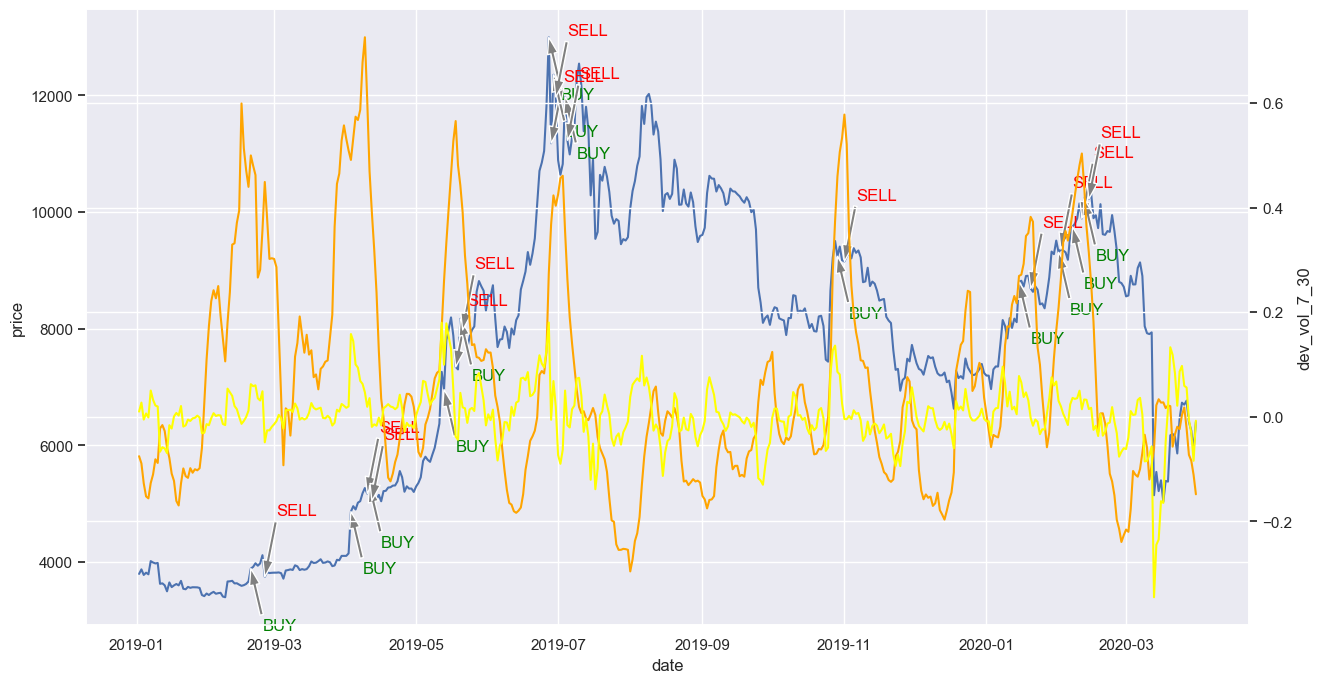

In [106]:
# plot trade recos and indicators for a given date range

from_date= '2019-01-01' #datetime.datetime(2021, 1, 1)
to_date= '2020-04-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))



# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)

#useful links for text annotations on plot
# https://www.geeksforgeeks.org/how-to-add-text-to-matplotlib/ 
# https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots/
# for adding a time delta
# https://stackoverflow.com/questions/61153546/addition-subtraction-of-integers-and-integer-arrays-with-timestamp-is-no-longer 




### Looking at vol signals

3248.6468630232553 13460.28993706322 1021.1643074039965
17944.85 18212.15 6.682500000000073


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

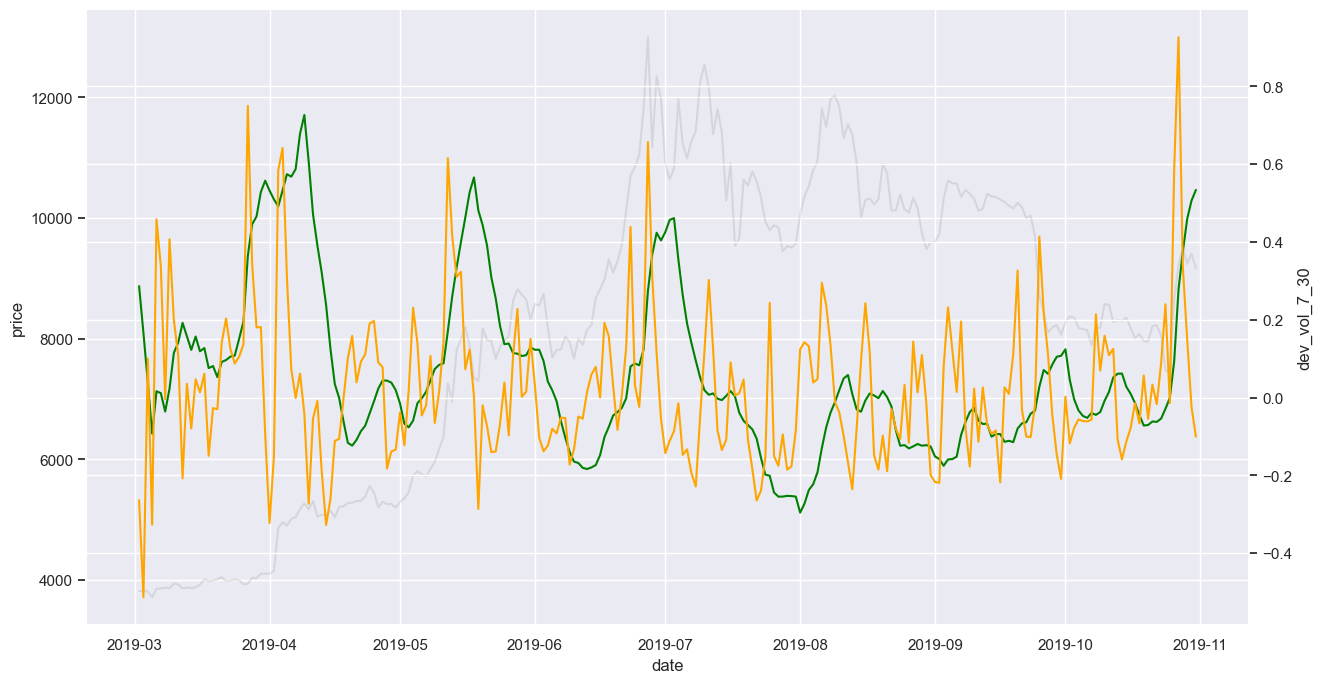

In [107]:
# plot price and vol indicators 

from_date= '2019-03-01' #datetime.datetime(2021, 1, 1)
to_date= '2019-11-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_vol_sma_7',
              data=plot_data[['date','dev_vol_sma_7']],color='orange',ax=ax2)

8510.024633823512 19595.40511258133 1108.538047875782
18405.95 18605.05 4.977499999999964


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

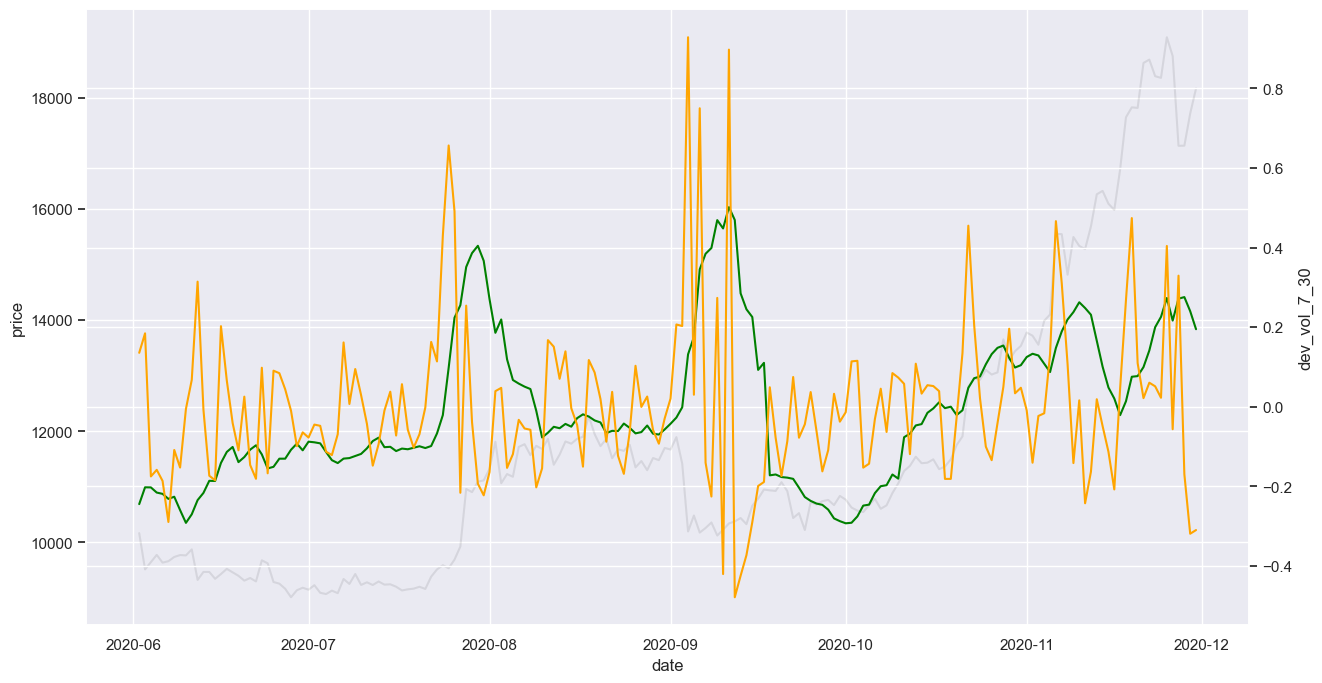

In [108]:
# plot price and vol indicators 

from_date= '2020-06-01' #datetime.datetime(2021, 1, 1)
to_date= '2020-12-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_vol_sma_7',
              data=plot_data[['date','dev_vol_sma_7']],color='orange',ax=ax2)

## <font color ='green' >Observations from above graphs and next steps </font>

1. dev vol 7 vs 30 is too laggy and a threshold is not the best way to capture the start of a trend, as it is often pretty low right before the start of the next up move. This means that by the time, I check for vol>0.2 it had already had moved quite a lot from its lows so I need to capture it earlier

2. One way to do it would be to look at the rate of change/ signs of trend reversal/beginning of a spike in dev_vol_sma_7. this is a pretty good indicator of start of price run up. Although it does peak quite a lot and quite vigorously. I will need to find additional indicators that confirm the bull trend so that we dont catch every day of high vol as a buy signal

3. Duration a visual inspection showed that most of these spikes are actually just 1 or 2 day long, so I can  just check dev_vol_sma_7 on d-1 vs D, and when its above a threshold, I would have detected a peak change in volume

4. Spotting the sell off/price drop
    c) It seems like there is a spike in dev_vol_Sma_7 even at the start of the price dump, although I will need to confirm this more rigourously 

5. testing in other time periods 


### MIsc observations
1. for larger more sustained peaks, we just have more spikes for e.g. 2-3 spikes in a really big run up 
2. size of move 


### Looking at price signals

8510.024633823512 19595.40511258133 1108.538047875782
18405.95 18605.05 4.977499999999964


<Axes: xlabel='date', ylabel='dev_price_7_30'>

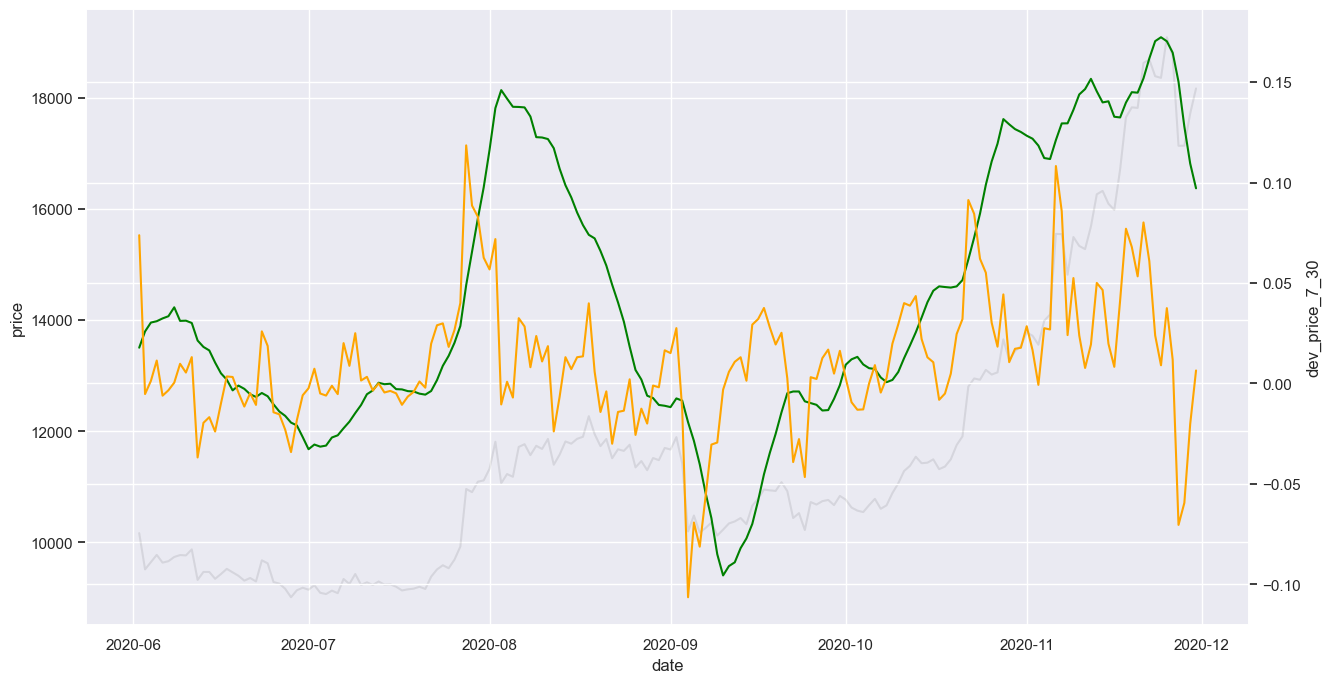

In [109]:
# plot price and vol indicators 

from_date= '2020-06-01' #datetime.datetime(2021, 1, 1)
to_date= '2020-12-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_price_7_30',
               data=plot_data[['date','dev_price_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='orange',ax=ax2)

3248.6468630232553 13460.28993706322 1021.1643074039965
17944.85 18212.15 6.682500000000073


<Axes: xlabel='date', ylabel='dev_price_7_30'>

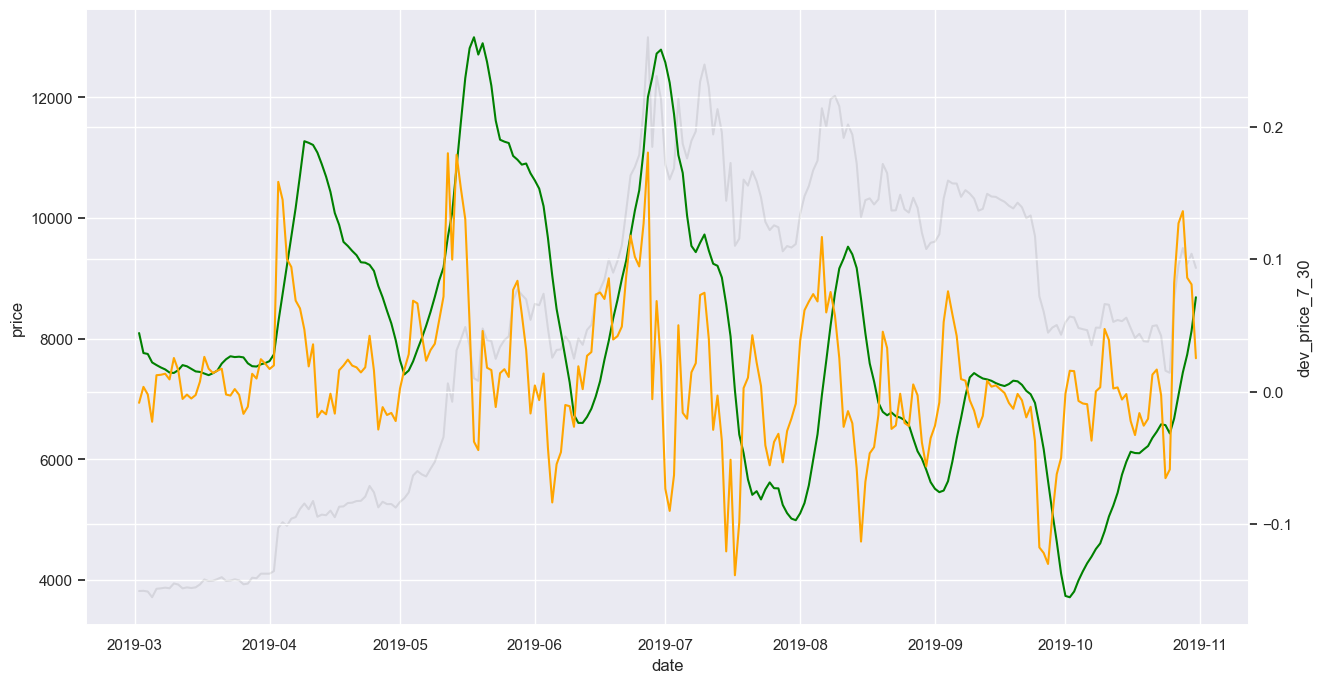

In [113]:
# plot price and vol indicators 

from_date= '2019-03-01' #datetime.datetime(2021, 1, 1)
to_date= '2019-11-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_price_7_30',
               data=plot_data[['date','dev_price_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='orange',ax=ax2)

## <font color ='green' >Observations from above graphs and next steps </font>

1. when dev_price_7_30 is in a dwontrend, then its not a good idea to buy/hold. i.e. SELL if dev_price_7_30 is detected in a downtrend. Ahtough, it shouldnt be the only indicator I think Other than this, there is not much that could be deduced from this signal
2. dev_price_7 varies quite a bit
    a) It also changes course, and just being or above a threshold, is not a reliable indicator, instead it changing course/trend reversal coube be an indicator of upcoming price run-up although it doesnt seem particularly strong to me 
    b) when it is positive, it is usually a price run-up so it can definitely be an either/or check between trend reversal OR it being positive as a signal to 'BUY'. <i> this might come in handy, will need to experiment. </i>
    
3. Note that the range for this idnicator is much smaller than the vol idnicators, 15 is very large move and 5 is a pretty big move as well

# to be investigated still 
size of peaks?
length of peaks?

In [111]:
plot_data[(plot_data.date>='2019-05-01') & (plot_data.date<='2019-06-01')]

date        price    market_cap        volume coin  price_sma_7   
1984 2019-05-01  5292.803975  9.353408e+10  1.679487e+10  btc  5279.768244  \
1985 2019-05-02  5354.586800  9.457989e+10  1.456641e+10  btc  5265.837536   
1986 2019-05-03  5450.706620  9.638961e+10  1.651262e+10  btc  5301.211539   
1987 2019-05-04  5731.493100  1.011759e+11  2.000629e+10  btc  5363.446651   
1988 2019-05-05  5803.943309  1.026530e+11  1.924284e+10  btc  5441.584580   
1989 2019-05-06  5749.323780  1.017647e+11  1.618406e+10  btc  5511.801799   
1990 2019-05-07  5715.757136  1.011015e+11  1.681122e+10  btc  5585.516389   
1991 2019-05-08  5841.053771  1.039825e+11  1.940827e+10  btc  5663.837788   
1992 2019-05-09  5957.856733  1.052718e+11  1.667241e+10  btc  5750.019207   
1993 2019-05-10  6168.268996  1.092843e+11  1.840140e+10  btc  5852.528118   
1994 2019-05-11  6370.233759  1.126846e+11  2.080184e+10  btc  5943.776784   
1995 2019-05-12  7258.261281  1.293237e+11  3.248004e+10  btc  6151.536494   
1996 2019-05-13  6953.751389  1.228269e+11  3.154533e+10  btc  6323.597581   
1997 2019-05-14  7805.981649  1.380898e+11  3.207804e+10  btc  6622.201083   
1998 2019-05-15  7990.055554  1.413411e+11  3.542612e+10  btc  6929.201337   
1999 2019-05-16  8192.223139  1.446156e+11  3.089371e+10  btc  7248.396538   
2000 2019-05-17  7875.913200  1.395254e+11  3.502695e+10  btc  7492.345710   
2001 2019-05-18  7343.371457  1.301232e+11  3.303015e+10  btc  7631.365381   
2002 2019-05-19  7300.655158  1.292700e+11  2.247877e+10  btc  7637.421649   
2003 2019-05-20  8168.730690  1.445975e+11  3.074768e+10  btc  7810.990121   
2004 2019-05-21  7976.851713  1.411098e+11  2.862148e+10  btc  7835.400130   
2005 2019-05-22  7958.365526  1.410167e+11  2.531434e+10  btc  7830.872983   
2006 2019-05-23  7665.796854  1.359131e+11  2.458988e+10  btc  7755.669228   
2007 2019-05-24  7861.812792  1.394952e+11  2.534506e+10  btc  7753.654884   
2008 2019-05-25  7977.244882  1.413568e+11  2.736846e+10  btc  7844.208231   
2009 2019-05-26  8037.627432  1.423014e+11  2.397834e+10  btc  7949.489984   
2010 2019-05-27  8631.080578  1.527790e+11  2.922440e+10  btc  8015.539968   
2011 2019-05-28  8816.033915  1.563515e+11  3.313684e+10  btc  8135.423140   
2012 2019-05-29  8726.978110  1.547064e+11  2.733599e+10  btc  8245.224938   
2013 2019-05-30  8650.677406  1.531907e+11  2.821489e+10  btc  8385.922159   
2014 2019-05-31  8310.891063  1.475289e+11  3.329524e+10  btc  8450.076198   
2015 2019-06-01  8575.646353  1.520373e+11  3.032934e+10  btc  8535.562122   

      price_sma_30  price_sma_90  price_sma_180     vol_sma_7  ...   
1984   5158.046516   4262.266381    4242.246092  1.745519e+10  ...  \
1985   5198.322012   4283.629082    4236.296899  1.660203e+10  ...   
1986   5217.937885   4305.698154    4231.088659  1.619961e+10  ...   
1987   5243.793261   4330.641615    4227.646610  1.625308e+10  ...   
1988   5273.957320   4356.751809    4224.249387  1.687688e+10  ...   
1989   5298.436251   4382.144257    4220.218701  1.696416e+10  ...   
1990   5320.899187   4407.098284    4215.446234  1.715976e+10  ...   
1991   5343.035050   4434.156250    4211.838451  1.753310e+10  ...   
1992   5366.067115   4462.643384    4209.305532  1.783396e+10  ...   
1993   5399.270239   4490.465461    4207.852034  1.810378e+10  ...   
1994   5434.647842   4520.496855    4207.496196  1.821743e+10  ...   
1995   5508.330112   4560.303184    4212.201239  2.010846e+10  ...   
1996   5570.706320   4597.217705    4215.309362  2.230293e+10  ...   
1997   5661.806136   4643.573445    4226.516968  2.448390e+10  ...   
1998   5756.497504   4692.240037    4239.314271  2.677217e+10  ...   
1999   5861.575575   4743.379607    4253.660198  2.880378e+10  ...   
2000   5950.319402   4790.876096    4266.308652  3.117886e+10  ...   
2001   6021.133213   4832.218094    4275.778152  3.292576e+10  ...   
2002   6088.662817   4872.613423    4289.175137  3.149701e+10  ...   
2003   6184.942026   4920.193540    

In [ ]:
# plot price and price indicators 

<font color='purple'> **On 23rd June I had discovered that simply using 30 day price average might give a pretty good algo,
so I will pivot and test that one first before moving to development of the algo that I had been building until 23rd Jun
that was based on 7, and 7vs 30 day price and volume signals** </font>

# Improving algo v0.2 - Simply using 30-day avg price (new - 23 June)

### plot the main graph

<Axes: >

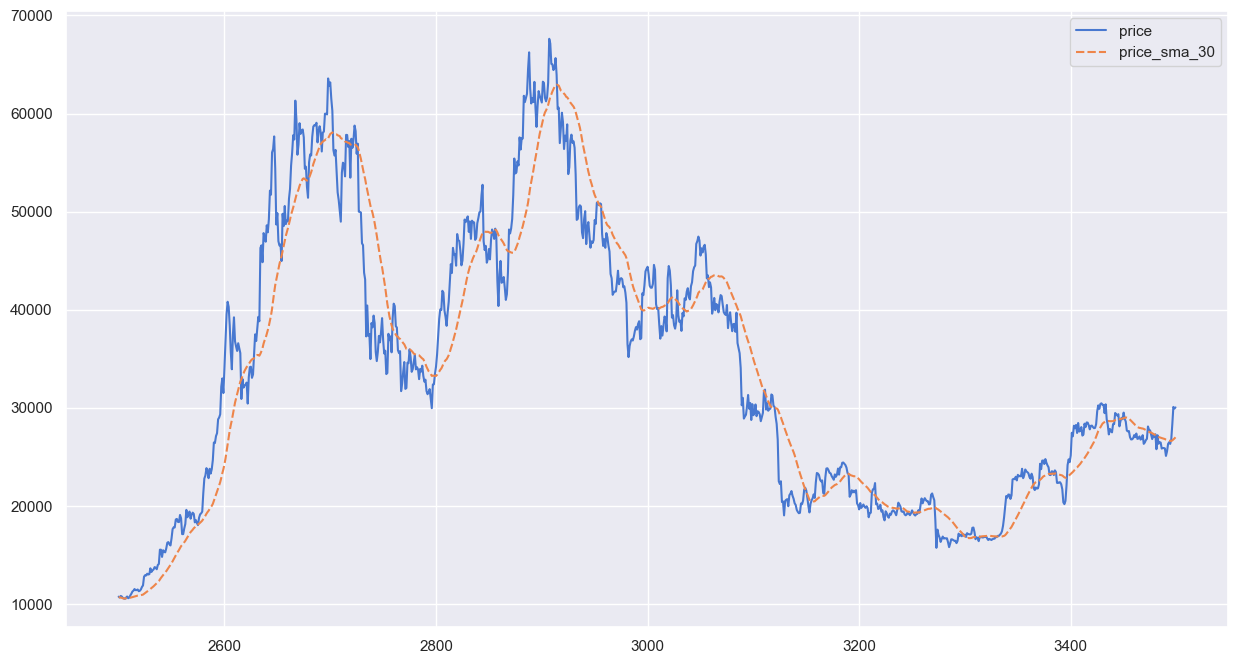

In [69]:
sns.lineplot(data=btc_hist_prices[['date','price','price_sma_30']].tail(1000),palette='muted')

(observations are copied from above cells) 
* It seems like simply buying as soon as price exceeds 30-day average and selling once it touches 30 day moving average again is a great algorithm
* I am going to test this algo and if it worked all right, I am going to use that as the base algo going forwards to be built on top of


In [115]:
btc_hist_prices.sample(10)

date     price  market_cap    volume coin  price_sma_7   
506  2015-04-14    218.00    3.06e+09  1.10e+08  btc       233.73  \
956  2016-07-07    638.62    1.01e+10  2.12e+09  btc       670.90   
2866 2021-09-29  41010.38    7.76e+11  2.97e+10  btc     42967.39   
3464 2023-05-20  26884.37    5.21e+11  1.16e+10  btc     27011.10   
478  2015-03-17    284.35    3.97e+09  5.05e+07  btc       288.45   
2945 2021-12-17  47694.53    9.02e+11  2.47e+10  btc     48333.60   
1508 2018-01-10  15509.27    2.60e+11  4.97e+09  btc     16673.03   
1673 2018-06-24   6169.44    1.06e+11  1.64e+09  btc      6495.47   
743  2015-12-07    394.36    5.89e+09  1.28e+09  btc       375.00   
1210 2017-03-18    961.96    1.56e+10  3.43e+08  btc      1176.03   

      price_sma_30  price_sma_90  price_sma_180  vol_sma_7  vol_sma_30   
506         250.82        245.58         294.57   9.40e+07    9.20e+07  \
956         666.67        532.77         470.23   1.60e+09    1.66e+09   
2866      46269.91      42007.70       44192.91   3.35e+10    3.63e+10   
3464      28003.69      26793.17       23020.44   1.12e+10    1.45e+10   
478         263.74        262.06         314.98   5.91e+07    7.99e+07   
2945      53657.28      55485.21       48151.61   2.75e+10    3.33e+10   
1508      16329.69      11003.22        7375.54   4.67e+09    4.82e+09   
1673       7033.86       7827.94        9471.89   1.73e+09    1.75e+09   
743         347.90        293.46         275.53   1.16e+09    6.23e+08   
1210       1175.73       1015.64         852.87   1.66e+08    1.47e+08   

      vol_sma_90  vol_sma_180  dev_price_sma_7  dev_price_sma_30   
506     1.05e+08     9.08e+07        -6.73e-02             -0.13  \
956     1.12e+09     1.26e+09        -4.81e-02             -0.04   
2866    3.21e+10     4.37e+10        -4.55e-02             -0.11   
3464    2.38e+10     2.53e+10        -4.69e-03             -0.04   
478     1.03e+08     8.28e+07        -1.42e-02              0.08   
2945    3.60e+10     3.43e+10        -1.32e-02             -0.11   
1508    4.06e+09     2.48e+09        -6.98e-02             -0.05   
1673    2.35e+09     3.17e+09        -5.02e-02             -0.12   
743     3.61e+08     2.13e+08         5.16e-02              0.13   
1210    1.63e+09     2.39e+09        -1.82e-01             -0.18   

      dev_price_sma_90  dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30   
506          -1.12e-01          -2.60e-01           0.16            0.19  \
956           1.99e-01           3.58e-01           0.33            0.28   
2866         -2.37e-02          -7.20e-02          -0.11           -0.18   
3464          3.40e-03           1.68e-01           0.03           -0.20   
478           8.51e-02          -9.72e-02          -0.14           -0.37   
2945         -1.40e-01          -9.49e-03          -0.10           -0.26   
1508          4.10e-01           1.10e+00           0.06            0.03   
1673         -2.12e-01          -3.49e-01          -0.05           -0.06   
743           3.44e-01           4.31e-01           0.11            1.06   
1210         -5.28e-02           1.28e-01           1.07            1.33   

      dev_vol_sma_90  dev_vol_sma_180  dev_vol_7_30  dev_price_7_30   
506             0.05             0.21      2.21e-02       -6.81e-02  \
956             0.90             0.68     -3.78e-02        6.34e-03   
2866           -0.07            -0.32     -7.69e-02       -7.14e-02   
3464           -0.51            -0.54     -2.23e-01       -3.54e-02   
478            -0.51            -0.39     -2.61e-01        9.37e-02   
2945           -0.31            -0.28     -1.76e-01       -9.92e-02   
1508            0.22             1.00     -2.95e-02        2.10e-02   
1673           -0.30            -0.48     -8.64e-03       -7.65e-02   
743             2.55             5.03      8.55e-01        7.79e-02   
1210           -0.79            -0.86      1.28e-01        2.55e-04   

     temp_signal signal trade_reco  
506         None   None        

In [117]:
btc_hist_prices.drop(columns='temp_signal', inplace=True) # dropping a column using inplace = True, source:
btc_hist_prices.sample(10)                                # https://towardsdatascience.com/pandas-full-tutorial-on-a-single-dataset-4aa43461e1e2

date     price  market_cap    volume coin  price_sma_7   
68   2014-01-30    817.17    1.01e+10  1.63e+07  btc       824.16  \
2426 2020-07-16   9203.37    1.70e+11  1.66e+10  btc      9248.80   
2647 2021-02-22  57669.30    1.08e+12  6.12e+10  btc     53014.15   
2793 2021-07-18  31588.67    5.93e+11  1.77e+10  btc     32547.41   
485  2015-03-24    245.17    3.43e+09  1.54e+08  btc       259.29   
649  2015-09-04    230.05    3.35e+09  5.53e+07  btc       228.43   
125  2014-03-28    503.66    6.33e+09  7.96e+07  btc       562.67   
424  2015-01-21    224.05    3.08e+09  9.92e+07  btc       210.57   
513  2015-04-21    234.69    3.30e+09  8.08e+07  btc       225.44   
2677 2021-03-24  54584.87    1.02e+12  6.04e+10  btc     57155.04   

      price_sma_30  price_sma_90  price_sma_180  vol_sma_7  vol_sma_30   
68          843.79           NaN            NaN   3.12e+07    3.71e+07  \
2426       9275.04       9053.10        8568.39   1.79e+10    2.01e+10   
2647      41773.87      31625.69       22083.33   6.60e+10    5.94e+10   
2793      33744.11      41458.47       45735.01   2.04e+10    2.94e+10   
485         268.34        257.13         309.09   9.27e+07    8.06e+07   
649         243.29        257.08         250.10   5.39e+07    7.46e+07   
125         603.08        710.87            NaN   2.62e+07    2.35e+07   
424         271.84        328.15         396.32   1.37e+08    1.11e+08   
513         240.82        247.31         288.46   7.64e+07    9.20e+07   
2677      53227.53      42746.65       29154.77   5.80e+10    6.24e+10   

      vol_sma_90  vol_sma_180  dev_price_sma_7  dev_price_sma_30   
68           NaN          NaN        -8.48e-03         -3.15e-02  \
2426    3.04e+10     3.69e+10        -4.91e-03         -7.73e-03   
2647    5.13e+10     3.78e+10         8.78e-02          3.81e-01   
2793    4.79e+10     5.43e+10        -2.95e-02         -6.39e-02   
485     1.05e+08     8.48e+07        -5.44e-02         -8.64e-02   
649     6.36e+07     6.65e+07         7.08e-03         -5.44e-02   
125     3.48e+07          NaN        -1.05e-01         -1.65e-01   
424     8.70e+07     5.82e+07         6.40e-02         -1.76e-01   
513     9.83e+07     9.24e+07         4.10e-02         -2.55e-02   
2677    6.15e+10     4.37e+10        -4.50e-02          2.55e-02   

      dev_price_sma_90  dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30   
68                 NaN                NaN          -0.48           -0.56  \
2426              0.02               0.07          -0.07           -0.18   
2647              0.82               1.61          -0.07            0.03   
2793             -0.24              -0.31          -0.13           -0.40   
485              -0.05              -0.21           0.66            0.91   
649              -0.11              -0.08           0.02           -0.26   
125              -0.29                NaN           2.03            2.38   
424              -0.32              -0.43          -0.28           -0.10   
513              -0.05              -0.19           0.06           -0.12   
2677              0.28               0.87           0.04           -0.03   

      dev_vol_sma_90  dev_vol_sma_180  dev_vol_7_30  dev_price_7_30 signal   
68               NaN              NaN         -0.16       -2.33e-02   None  \
2426           -0.45            -0.55         -0.11       -2.83e-03   None   
2647            0.19             0.62          0.11        2.69e-01   None   
2793           -0.63            -0.67         -0.30       -3.55e-02   None   
485             0.46             0.82          0.15       -3.37e-02   SELL   
649            -0.13            -0.17         -0.28       -6.11e-02   None   
125             1.29              NaN          0.12       -6.70e-02   None   
424             0.14             0.71          0.24       -2.25e-01   None   
513            -0.18            -0.13         -0.17       -6.39e-02   None   
2677           -0.02             0.38         -0.07        7.38e-02   

In [124]:
btc_hist_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3500 non-null   datetime64[ns]
 1   price                 3500 non-null   float64       
 2   market_cap            3499 non-null   float64       
 3   volume                3500 non-null   float64       
 4   coin                  3500 non-null   object        
 5   price_sma_7           3494 non-null   float64       
 6   price_sma_30          3471 non-null   float64       
 7   price_sma_90          3411 non-null   float64       
 8   price_sma_180         3321 non-null   float64       
 9   vol_sma_7             3494 non-null   float64       
 10  vol_sma_30            3471 non-null   float64       
 11  vol_sma_90            3411 non-null   float64       
 12  vol_sma_180           3321 non-null   float64       
 13  dev_price_sma_7   

In [133]:
# # I had created a columns by mistke so deleting that here. 
# btc_hist_prices.drop(columns=btc_hist_prices.columns[[-1]], axis=1, inplace=True) 
# btc_hist_prices.sample(10) # dropping a column by its integer location source:
#                                 # https://www.geeksforgeeks.org/drop-columns-in-dataframe-by-label-names-or-by-index-positions/


date     price  market_cap    volume coin  price_sma_7   
2619 2021-01-25  32273.52    6.01e+11  4.28e+10  btc     33785.86  \
533  2015-05-11    241.85    3.42e+09  7.08e+07  btc       238.47   
855  2016-03-28    422.76    6.50e+09  2.16e+09  btc       418.55   
2124 2019-09-18  10203.07    1.83e+11  1.73e+10  btc     10290.63   
286  2014-09-05    480.24    6.35e+09  1.41e+07  btc       482.37   
1327 2017-07-13   2364.32    3.89e+10  2.33e+08  btc      2437.24   
2192 2019-11-25   6935.74    1.26e+11  2.51e+10  btc      7658.35   
1804 2018-11-02   6379.97    1.11e+11  2.92e+09  btc      6396.90   
906  2016-05-18    453.37    7.05e+09  3.83e+08  btc       454.97   
969  2016-07-20    670.89    1.06e+10  7.18e+08  btc       669.63   

      price_sma_30  price_sma_90  price_sma_180  vol_sma_7  vol_sma_30   
2619      33768.88      23299.76       17285.57   5.46e+10    6.32e+10  \
533         231.09        247.63         276.20   7.36e+07    7.67e+07   
855         416.24        410.04         377.00   2.01e+09    2.05e+09   
2124      10232.01      10659.86        8552.52   1.71e+10    1.93e+10   
286         515.28        576.26         544.84   2.09e+07    2.56e+07   
1327       2553.32       2116.56        1594.45   2.73e+08    3.35e+08   
2192       8712.45       8975.67        9597.18   2.69e+10    2.82e+10   
1804       6486.79       6556.98        6938.87   2.53e+09    2.48e+09   
906         452.94        431.02         417.16   5.33e+08    8.23e+08   
969         659.09        566.70         488.71   8.11e+08    1.51e+09   

      vol_sma_90  vol_sma_180  dev_price_sma_7  dev_price_sma_30   
2619    4.09e+10     3.18e+10        -4.48e-02         -4.43e-02  \
533     8.56e+07     9.63e+07         1.42e-02          4.66e-02   
855     1.43e+09     1.04e+09         1.00e-02          1.57e-02   
2124    2.61e+10     2.37e+10        -8.51e-03         -2.83e-03   
286     4.86e+07     3.53e+07        -4.41e-03         -6.80e-02   
1327    3.16e+08     2.57e+08        -2.99e-02         -7.40e-02   
2192    2.23e+10     2.49e+10        -9.44e-02         -2.04e-01   
1804    4.35e+09     3.67e+09        -2.65e-03         -1.65e-02   
906     1.27e+09     1.19e+09        -3.51e-03          9.55e-04   
969     1.14e+09     1.23e+09         1.89e-03          1.79e-02   

      dev_price_sma_90  dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30   
2619              0.39               0.87      -2.16e-01           -0.32  \
533              -0.02              -0.12      -3.86e-02           -0.08   
855               0.03               0.12       7.25e-02            0.05   
2124             -0.04               0.19       9.64e-03           -0.10   
286              -0.17              -0.12      -3.28e-01           -0.45   
1327              0.12               0.48      -1.47e-01           -0.30   
2192             -0.23              -0.28      -6.92e-02           -0.11   
1804             -0.03              -0.08       1.55e-01            0.18   
906               0.05               0.09      -2.82e-01           -0.53   
969               0.18               0.37      -1.14e-01           -0.52   

      dev_vol_sma_90  dev_vol_sma_180  dev_vol_7_30  dev_price_7_30 signal   
2619            0.05         3.44e-01         -0.14        5.03e-04   None  \
533            -0.17        -2.65e-01         -0.04        3.19e-02   None   
855             0.51         1.07e+00         -0.02        5.56e-03   None   
2124           -0.34        -2.70e-01         -0.11        5.73e-03   None   
286            -0.71        -6.01e-01         -0.18       -6.39e-02   None   
1327           -0.26        -9.40e-02         -0.18       -4.55e-02   None   
2192            0.13         6.89e-03         -0.05       -1.21e-01   None   
1804           -0.33        -2.04e-01          0.02       -1.39e-02   None   
906            -0.70        -6.78e-01         -0.35        4.48e-03   None   
969            -0.37        -4.17e-01         -0.46        1.60e-02   

In [134]:
btc_hist_prices[['signal', 'trade_reco']] = None
btc_hist_prices.sample(10) 

date     price  market_cap    volume coin  price_sma_7   
452  2015-02-19    240.30    3.33e+09  7.14e+07  btc       240.14  \
1636 2018-05-18   8056.05    1.37e+11  2.17e+09  btc      8448.52   
1604 2018-04-16   8258.07    1.40e+11  2.35e+09  btc      7481.55   
295  2014-09-14    474.80    6.30e+09  1.15e+07  btc       474.41   
3264 2022-11-01  20494.60    3.93e+11  3.73e+10  btc     20522.60   
1545 2018-02-16  10112.58    1.71e+11  4.33e+09  btc      8909.19   
1207 2017-03-15   1258.46    2.04e+10  7.28e+07  btc      1207.33   
1985 2019-05-02   5354.59    9.46e+10  1.46e+10  btc      5265.84   
2741 2021-05-27  39406.93    7.38e+11  4.70e+10  btc     38076.48   
2585 2020-12-22  22840.99    4.24e+11  3.84e+10  btc     22414.20   

      price_sma_30  price_sma_90  price_sma_180  vol_sma_7  vol_sma_30   
452         232.70        289.62         346.27   1.30e+08    1.26e+08  \
1636       8945.99       8861.74       10805.12   2.81e+09    2.81e+09   
1604       7679.46       9244.50       10405.39   2.73e+09    2.78e+09   
295         490.24        562.96         537.22   1.74e+07    2.40e+07   
3264      19658.20      20563.29       22926.77   3.76e+10    2.72e+10   
1545       9905.41      12724.68        8922.68   3.20e+09    4.04e+09   
1207       1169.08       1005.69         844.93   1.62e+08    1.28e+08   
1985       5198.32       4283.63        4236.30   1.66e+10    1.78e+10   
2741      49379.18      53512.73       43279.33   7.09e+10    6.90e+10   
2585      19519.59      15272.31       12896.88   3.82e+10    3.13e+10   

      vol_sma_90  vol_sma_180  dev_price_sma_7  dev_price_sma_30   
452     1.02e+08     7.44e+07         6.60e-04              0.03  \
1636    3.08e+09     3.99e+09        -4.65e-02             -0.10   
1604    3.58e+09     3.92e+09         1.04e-01              0.08   
295     4.78e+07     3.54e+07         8.16e-04             -0.03   
3264    2.92e+10     3.08e+10        -1.36e-03              0.04   
1545    4.87e+09     3.21e+09         1.35e-01              0.02   
1207    1.68e+09     2.40e+09         4.23e-02              0.08   
1985    1.11e+10     7.25e+09         1.69e-02              0.03   
2741    6.30e+10     5.82e+10         3.49e-02             -0.20   
2585    2.55e+10     2.44e+10         1.90e-02              0.17   

      dev_price_sma_90  dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30   
452          -1.70e-01              -0.31      -4.53e-01           -0.43  \
1636         -9.09e-02              -0.25      -2.27e-01           -0.23   
1604         -1.07e-01              -0.21      -1.39e-01           -0.15   
295          -1.57e-01              -0.12      -3.42e-01           -0.52   
3264         -3.34e-03              -0.11      -8.66e-03            0.37   
1545         -2.05e-01               0.13       3.55e-01            0.07   
1207          2.51e-01               0.49      -5.50e-01           -0.43   
1985          2.50e-01               0.26      -1.23e-01           -0.18   
2741         -2.64e-01              -0.09      -3.37e-01           -0.32   
2585          4.96e-01               0.77       5.42e-03            0.23   

      dev_vol_sma_90  dev_vol_sma_180  dev_vol_7_30  dev_price_7_30 signal   
452            -0.30            -0.04      3.70e-02            0.03   None  \
1636           -0.29            -0.45      1.51e-03           -0.06   None   
1604           -0.34            -0.40     -1.70e-02           -0.03   None   
295            -0.76            -0.68     -2.74e-01           -0.03   None   
3264            0.28             0.21      3.85e-01            0.04   None   
1545           -0.11             0.35     -2.10e-01           -0.10   None   
1207           -0.96            -0.97      2.66e-01            0.03   None   
1985            0.31             1.01     -6.72e-02            0.01   None   
2741           -0.25            -0.19      2.76e-02           -0.23   None   
2585            0.51             0.57      2.21e-01            0.15   

In [135]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30','signal', 'trade_reco']].sample(10)

date     price  price_sma_30  dev_price_sma_30 signal trade_reco
128  2014-03-31    457.40        593.62             -0.23   None       None
2556 2020-11-23  18390.61      15345.63              0.20   None       None
670  2015-09-25    234.98        232.15              0.01   None       None
2298 2020-03-10   7921.33       9374.47             -0.16   None       None
2383 2020-06-03   9515.24       9324.28              0.02   None       None
1176 2017-02-12   1000.52        943.53              0.06   None       None
1444 2017-11-07   7166.74       6019.80              0.19   None       None
1665 2018-06-16   6406.81       7447.85             -0.14   None       None
595  2015-07-12    310.19        255.85              0.21   None       None
1837 2018-12-05   3943.69       5109.12             -0.23   None       None

In [137]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30','signal', 'trade_reco']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3500 non-null   datetime64[ns]
 1   price             3500 non-null   float64       
 2   price_sma_30      3471 non-null   float64       
 3   dev_price_sma_30  3471 non-null   float64       
 4   signal            0 non-null      object        
 5   trade_reco        0 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 164.2+ KB


In [ ]:
# some of the code below might be a repeat of the above code!

#### calculating signals

In [140]:
btc_hist_prices['signal'] = None 

for index, row in btc_hist_prices.iterrows():
    if (row['dev_price_sma_30'] >0):
        btc_hist_prices.at[index,'signal'] ='BUY'
    else:
        btc_hist_prices.at[index,'signal'] ='SELL'

In [142]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30','signal', 'trade_reco']].sample(20)

date     price  price_sma_30  dev_price_sma_30 signal trade_reco
1807 2018-11-05   6351.06       6468.97         -1.82e-02   SELL       None
2639 2021-02-14  46941.29      37150.50          2.64e-01    BUY       None
704  2015-10-29    313.91        260.46          2.05e-01    BUY       None
523  2015-05-01    232.74        234.51         -7.56e-03   SELL       None
1638 2018-05-20   8180.63       8946.28         -8.56e-02   SELL       None
2980 2022-01-21  40707.68      45270.58         -1.01e-01   SELL       None
887  2016-04-29    456.57        433.12          5.41e-02    BUY       None
592  2015-07-09    268.89        249.26          7.88e-02    BUY       None
1170 2017-02-06   1024.51        911.26          1.24e-01    BUY       None
2288 2020-02-29   8717.33       9656.26         -9.72e-02   SELL       None
1478 2017-12-11  17106.51      10393.41          6.46e-01    BUY       None
3391 2023-03-08  22217.21      23150.40         -4.03e-02   SELL       None
2731 2021-05-17  46585.06      54323.32         -1.42e-01   SELL       None
514  2015-04-22    233.78        239.74         -2.49e-02   SELL       None
2600 2021-01-06  34082.21      24250.11          4.05e-01    BUY       None
1745 2018-09-04   7260.90       6641.09          9.33e-02    BUY       None
3455 2023-05-11  27639.73      28918.09         -4.42e-02   SELL       None
2585 2020-12-22  22840.99      19519.59          1.70e-01    BUY       None
3132 2022-06-22  20700.92      27156.57         -2.38e-01   SELL       None
2196 2019-11-29   7438.62       8440.19         -1.19e-01   SELL       None

In [138]:
def isBuyorSell(date):
    return (btc_hist_prices[btc_hist_prices.date==date]['signal'].iloc[0]) # tested OK (temp comment)

In [139]:
def create_trade(buy_date):
    if(type(buy_date)==str):
        buy_date=datetime.datetime.strptime(buy_date, format)
    sell_date=buy_date 
    btc_hist_prices.loc[btc_hist_prices.date ==buy_date,'trade_reco'] ='BUY'
    
    for idate in btc_hist_prices.date:
        if (idate <= buy_date):
            continue # skip the rest of the loop until we are past the buy_date
        elif (isBuyorSell(idate)=='SELL'):
            btc_hist_prices.loc[btc_hist_prices.date ==idate,'trade_reco'] ='SELL'
            sell_date=idate
            break # if SELL found, break the loop
    return sell_date

In [143]:
btc_hist_prices.trade_reco = None
start_date= btc_hist_prices.loc[0]['date']

for idate in btc_hist_prices.date : ### IMP: (check with Neha)should I sort the dates in case they are not in order in DF?
    if (idate<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(idate)=='BUY'):
        start_date=create_trade(idate) # record the trade and scan next 
        

In [158]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30',
                       'signal', 'trade_reco']] [(btc_hist_prices['trade_reco']=='BUY') 
                                                 | (btc_hist_prices['trade_reco']=='SELL')].head(50)

date   price  price_sma_30  dev_price_sma_30 signal trade_reco
41  2014-01-03  825.47        774.07          6.64e-02    BUY        BUY
62  2014-01-24  808.32        826.75         -2.23e-02   SELL       SELL
64  2014-01-26  853.51        833.05          2.46e-02    BUY        BUY
66  2014-01-28  777.00        839.84         -7.48e-02   SELL       SELL
101 2014-03-04  675.00        645.98          4.49e-02    BUY        BUY
104 2014-03-07  617.62        627.77         -1.62e-02   SELL       SELL
106 2014-03-09  636.17        618.44          2.87e-02    BUY        BUY
117 2014-03-20  592.07        606.40         -2.36e-02   SELL       SELL
143 2014-04-15  520.12        502.34          3.54e-02    BUY        BUY
145 2014-04-17  494.40        495.25         -1.71e-03   SELL       SELL
147 2014-04-19  501.55        487.81          2.82e-02    BUY        BUY
153 2014-04-25  458.81        470.01         -2.38e-02   SELL       SELL
178 2014-05-20  483.42        449.93          7.44e-02    BUY        BUY
203 2014-06-14  570.00        576.22         -1.08e-02   SELL       SELL
204 2014-06-15  583.41        580.83          4.44e-03    BUY        BUY
208 2014-06-19  593.39        600.16         -1.13e-02   SELL       SELL
219 2014-06-30  637.75        612.14          4.18e-02    BUY        BUY
242 2014-07-23  617.94        618.08         -2.22e-04   SELL       SELL
325 2014-10-14  398.29        387.37          2.82e-02    BUY        BUY
327 2014-10-16  379.39        381.91         -6.58e-03   SELL       SELL
328 2014-10-17  380.29        379.43          2.28e-03    BUY        BUY
334 2014-10-23  356.20        373.42         -4.61e-02   SELL       SELL
351 2014-11-09  363.42        358.13          1.48e-02    BUY        BUY
362 2014-11-20  355.39        358.33         -8.22e-03   SELL       SELL
365 2014-11-23  366.78        357.59          2.57e-02    BUY        BUY
376 2014-12-04  368.23        371.20         -8.01e-03   SELL       SELL
377 2014-12-05  376.38        372.50          1.04e-02    BUY        BUY
379 2014-12-07  374.45        374.47         -4.55e-05   SELL       SELL
429 2015-01-26  271.29        259.23          4.65e-02    BUY        BUY
431 2015-01-29  232.53        254.65         -8.68e-02   SELL       SELL
446 2015-02-13  235.68        224.91          4.79e-02    BUY        BUY
479 2015-03-18  255.61        264.40         -3.33e-02   SELL       SELL
483 2015-03-22  267.80        267.29          1.89e-03    BUY        BUY
484 2015-03-23  266.03        268.02         -7.44e-03   SELL       SELL
522 2015-04-30  236.22        234.98          5.28e-03    BUY        BUY
523 2015-05-01  232.74        234.51         -7.56e-03   SELL       SELL
524 2015-05-02  235.16        233.94          5.20e-03    BUY        BUY
528 2015-05-06  229.82        231.36         -6.68e-03   SELL       SELL
529 2015-05-07  236.85        230.81          2.61e-02    BUY        BUY
540 2015-05-18  232.48        233.79         -5.63e-03   SELL       SELL
543 2015-05-21  235.42        234.45          4.14e-03    BUY        BUY
551 2015-05-29  237.07        237.23         -6.56e-04   SELL       SELL
566 2015-06-13  232.63        232.22          1.75e-03    BUY        BUY
617 2015-08-03  281.83        281.90         -2.33e-04   SELL       SELL
618 2015-08-04  284.24        282.34          6.74e-03    BUY        BUY
619 2015-08-05  281.40        282.76         -4.81e-03   SELL       SELL
652 2015-09-07  240.50        239.89          2.55e-03    BUY        BUY
654 2015-09-09  237.95        238.35         -1.68e-03   SELL       SELL
655 2015-09-10  238.78        237.31          6.18e-03    BUY        BUY
657 2015-09-12  234.91        235.43         -2.20e-03   SELL       SELL

7565.505807234831 63874.70708160167 5630.920127436684
18496.5 18727.5 5.775


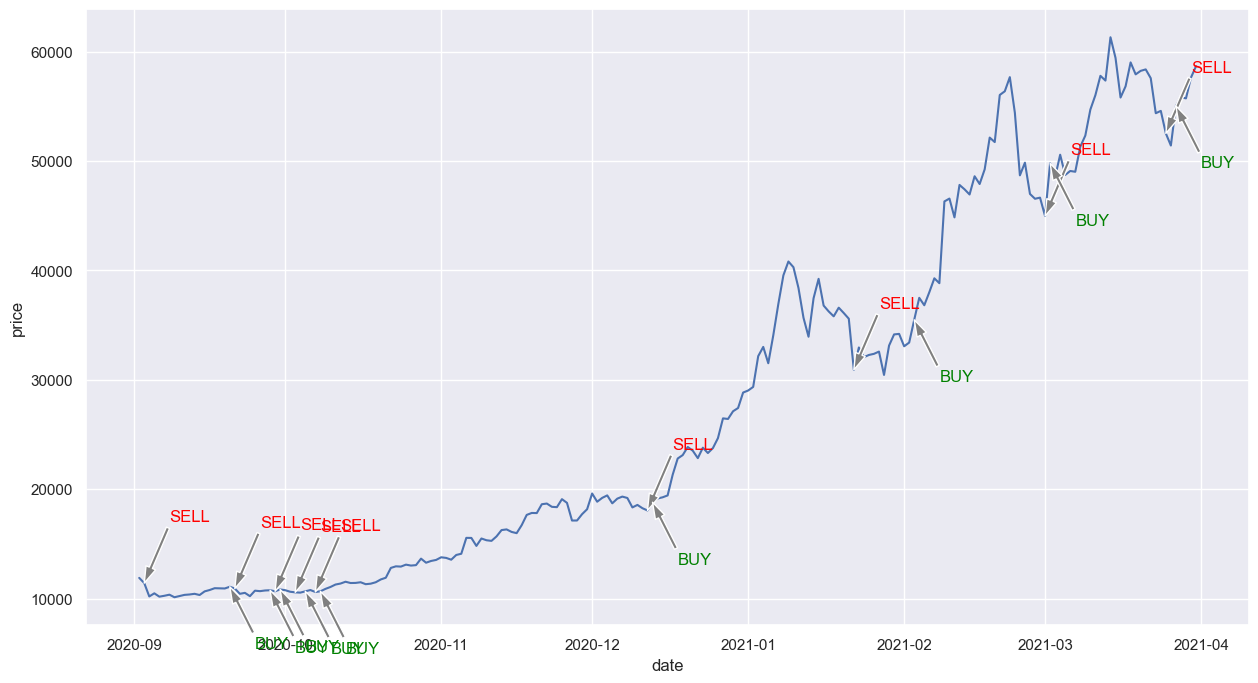

In [164]:
# plot trade recos and indicators for a given date range

from_date= '2020-09-01'
to_date= '2021-04-01'

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


### Observations

* very good performance overall in this kind of secular uptrend
### <font color='red'> **REALLY MiSSINg the peak in SELL by a LOT** </font>

8510.024633823512 19595.40511258133 1108.538047875782
18405.95 18605.05 4.977499999999964


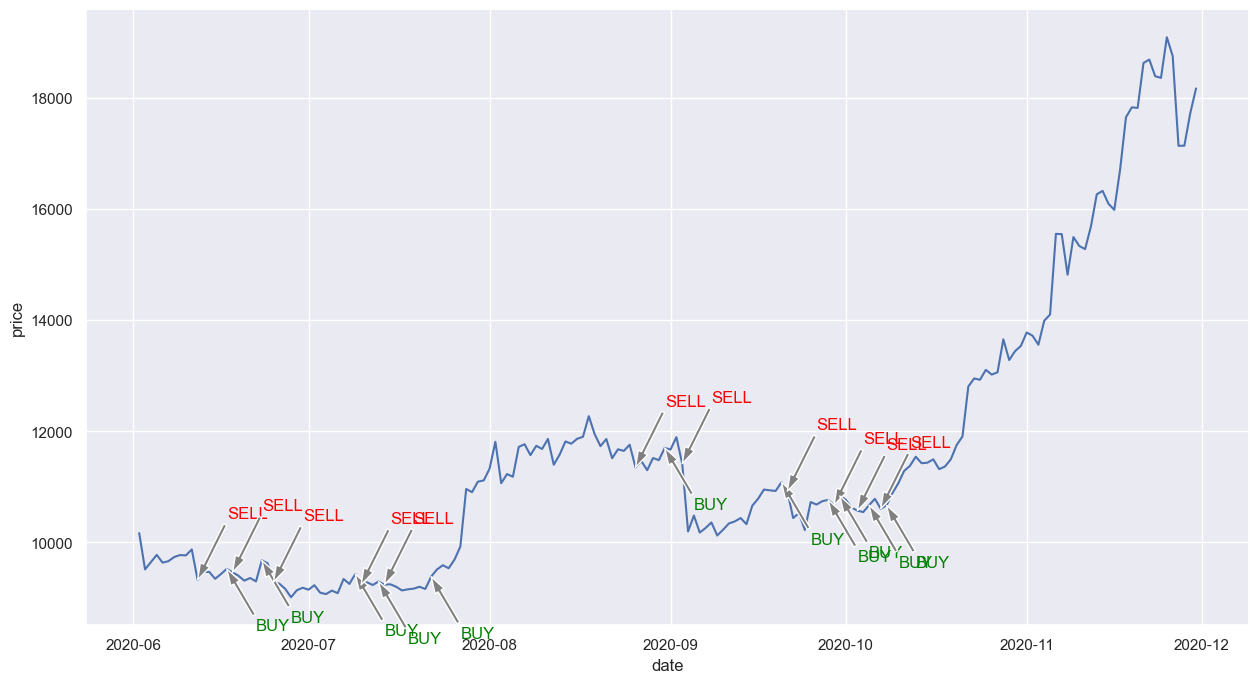

In [160]:


from_date= '2020-06-01' 
to_date= '2020-12-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


124.38279499999999 1175.215105 105.08323100000001
15982.0 17082.0 27.5


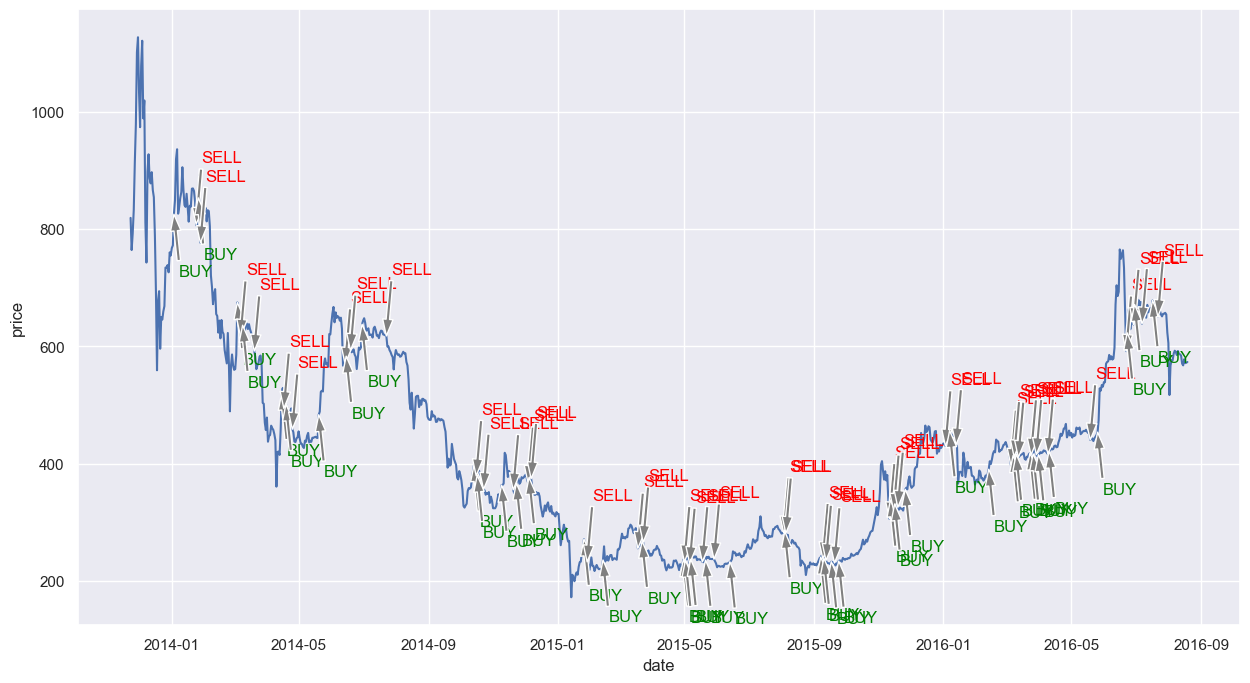

In [163]:
num_points=1000

plot_data=btc_hist_prices.head(num_points)

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


147.38688 692.12932 54.474244
16178.3 16479.7 7.535000000000037


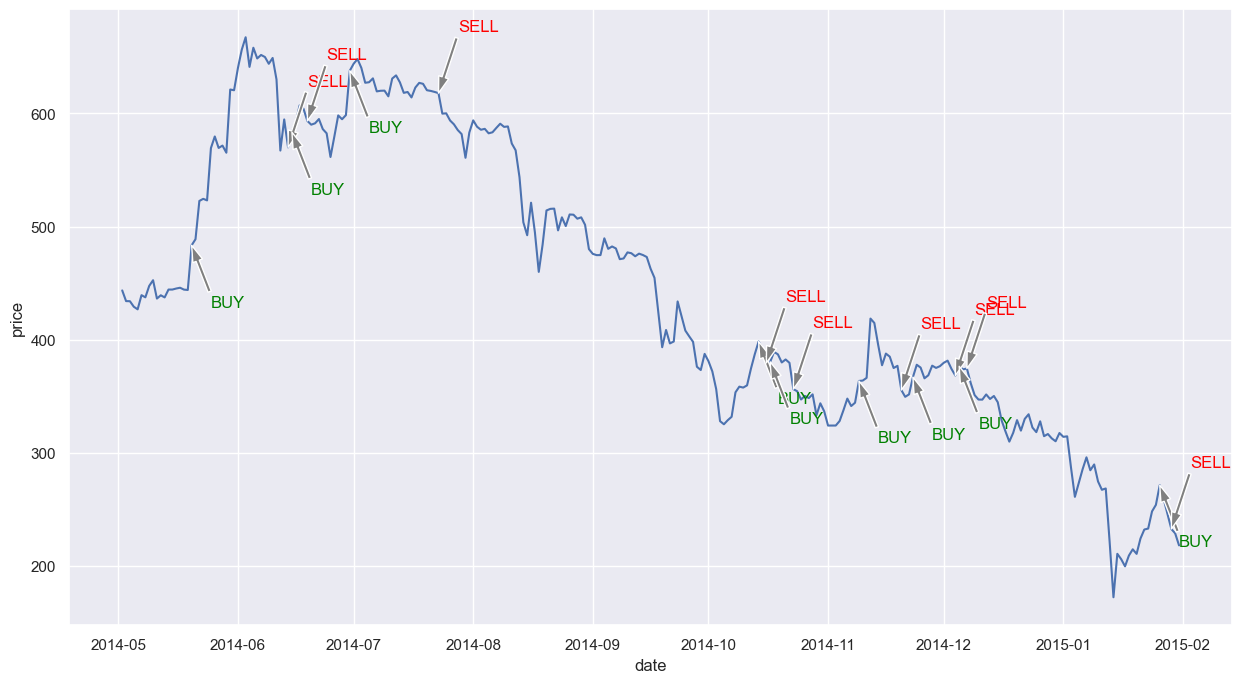

In [165]:

from_date= '2014-05-01' 
to_date= '2015-02-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


197.2063043169834 480.7440807468102 28.35377764298268
16538.8 16939.2 10.010000000000037


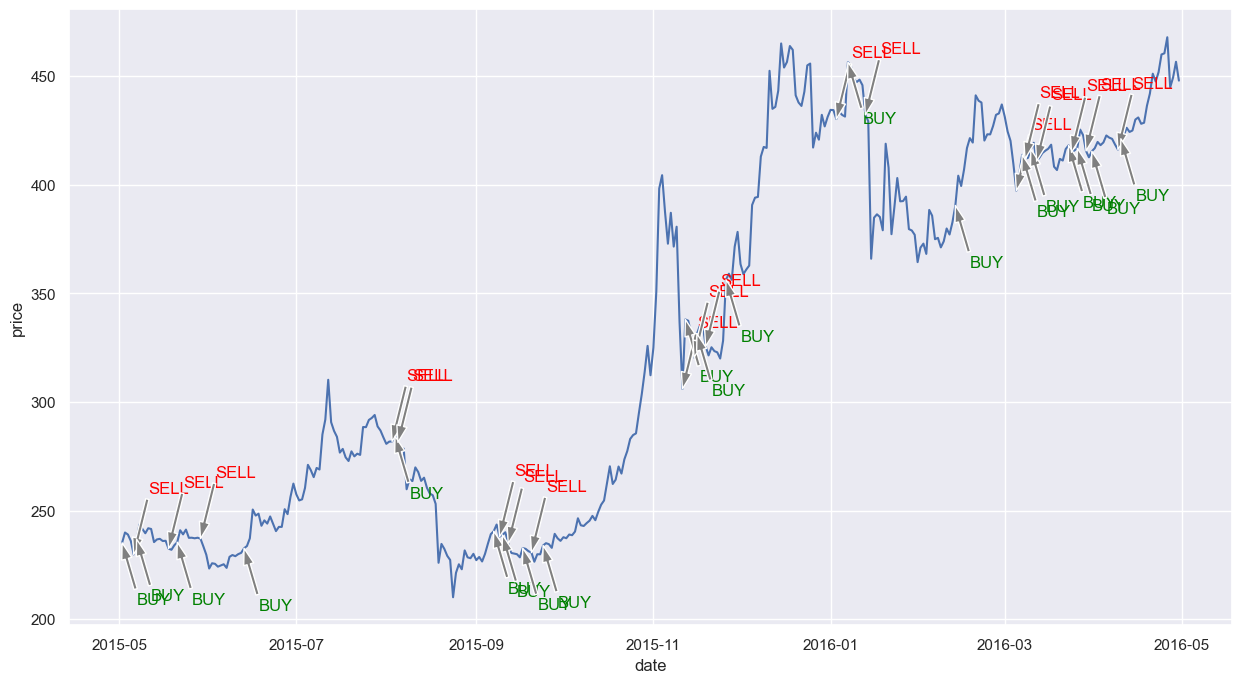

In [166]:
from_date= '2015-05-01' 
to_date= '2016-05-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


In [172]:
!jt -t oceans16 -tf merriserif -tfs 14 -nf ptsans -nfs 14

zsh:1: command not found: jt


### <font color='green'> Observations (important) </font>

* this algo captures long term up or down moves very well
    * it  is based on 30-day averge vs current price, so does this very well

* the sell is almost always past the actual peak and well in the downtrend often
    * this is because we are looking at 30-day averages, which takes some time to change. We should instead look 
    at 7-day price, 7-day vol, 7-30-vol,7-30 price and their trends to find the sell signal sooner

* the algo makes numerous small trades that dont make much profit 
    * IT seems like this happens where there is a lot of volatility in price since the algo is literally just checking 
    against 30day average. the solution would be to look at vol-7, vol-7-30, price7, price 7-30 trends to filter the buy
    signal when there are legit buy conditions
    
* buy is a bit delayed but doesnt seem like a huge problem 
    * will investigate later if seems like an issue



### Spotting the Sell earlier 

Investigate t 7-day price, 7-day vol, 7-30-vol,7-30. their thresholds or trend changes might be better indicator of sell sign

In [ ]:
### good test periods
# from_date= '2014-05-01' to_date= '2015-02-01' 
# AND 
# from_date= '2015-05-01' to_date= '2016-05-01' 

147.38688 692.12932 54.474244
16178.3 16479.7 7.535000000000037


<Axes: xlabel='date', ylabel='dev_price_7_30'>

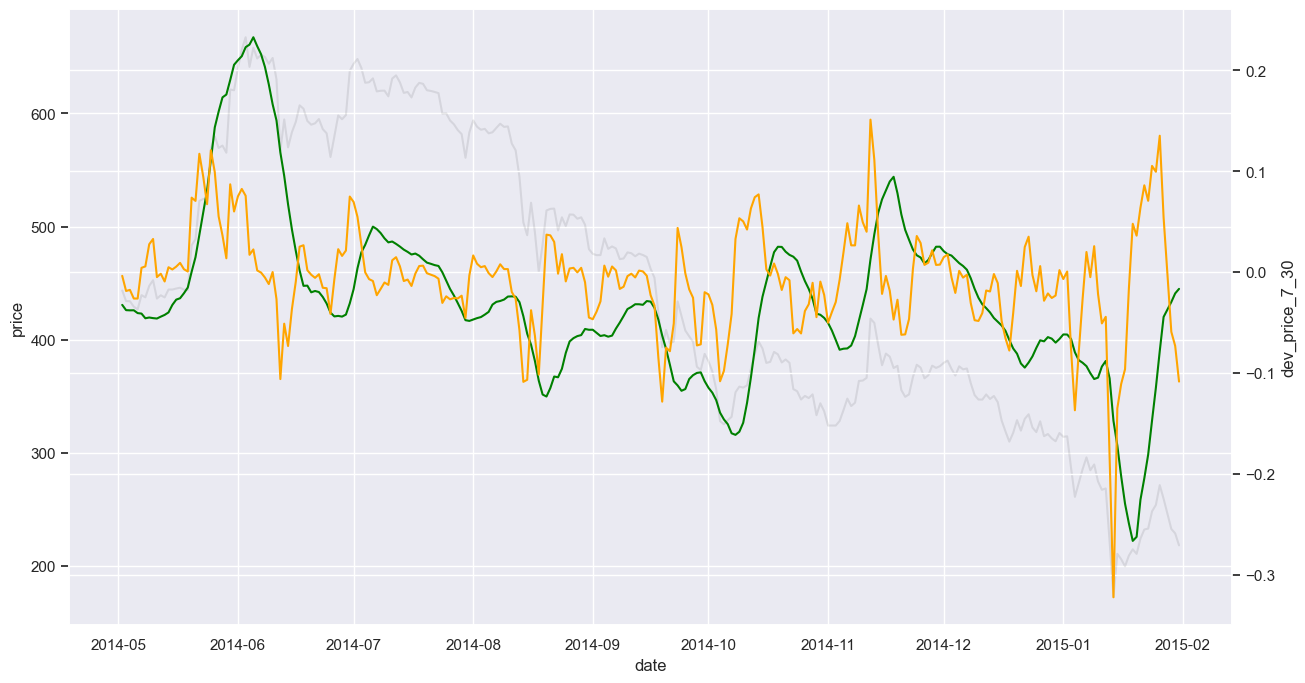

In [174]:
# plotting price signals 

from_date= '2014-05-01'
to_date= '2015-02-01' 

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_price_7_30',
               data=plot_data[['date','dev_price_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='orange',ax=ax2)

#### Observations from above and below graphs

1. dev_price_7_30 changes trends, goes from positive to negative 
2. dev_price_7_30 remains in a downtrend during the fall (and picks up later with a lag)
3. the above 2 observations would work well however, dev_price_7_30 wont be able to capture sharp peaks. However,
the dev_price_7 changes trend dramatically near sharp peaks, usually by 10% so we can use that as an additional check to identify sharp peaks (willneed to be tested)
4. dev_price_7 too noisy for me to tell any pattern

197.2063043169834 480.7440807468102 28.35377764298268
16538.8 16939.2 10.010000000000037


<Axes: xlabel='date', ylabel='dev_price_7_30'>

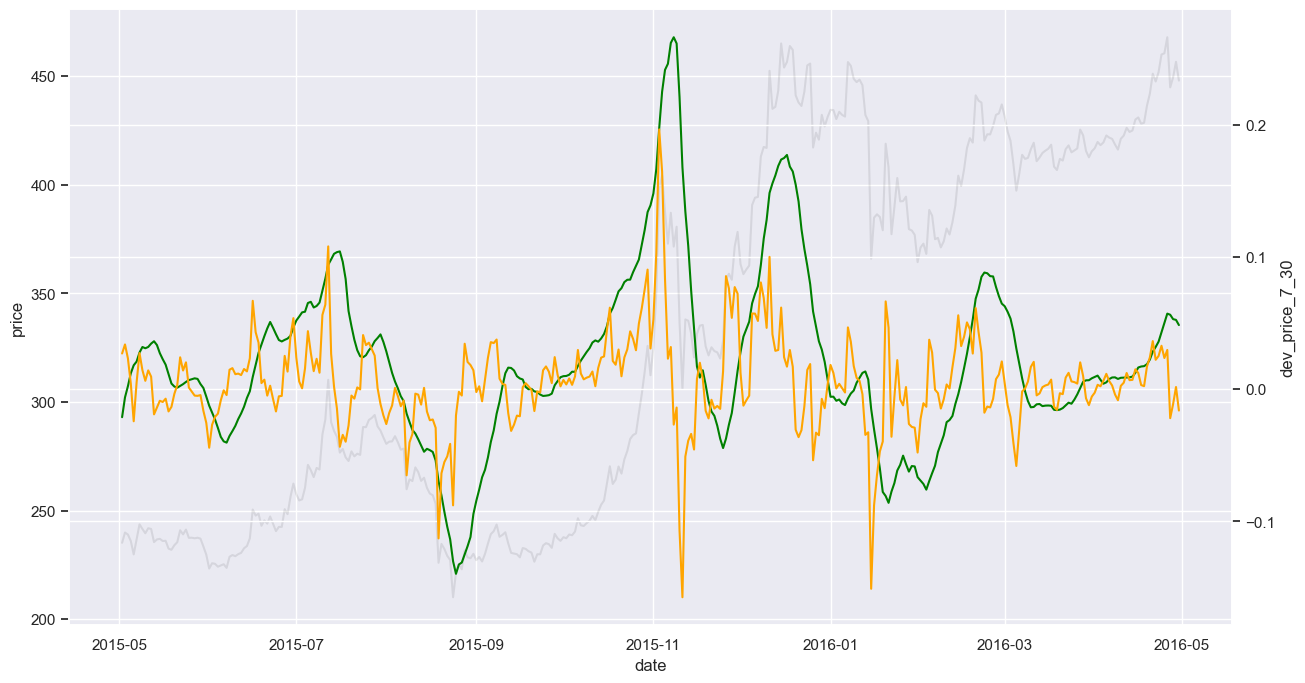

In [175]:
# plotting price signals 

from_date= '2015-05-01'
to_date= '2016-05-01' 

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_price_7_30',
               data=plot_data[['date','dev_price_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='orange',ax=ax2)

In [ ]:
# plotting vol signals

147.38688 692.12932 54.474244
16178.3 16479.7 7.535000000000037


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

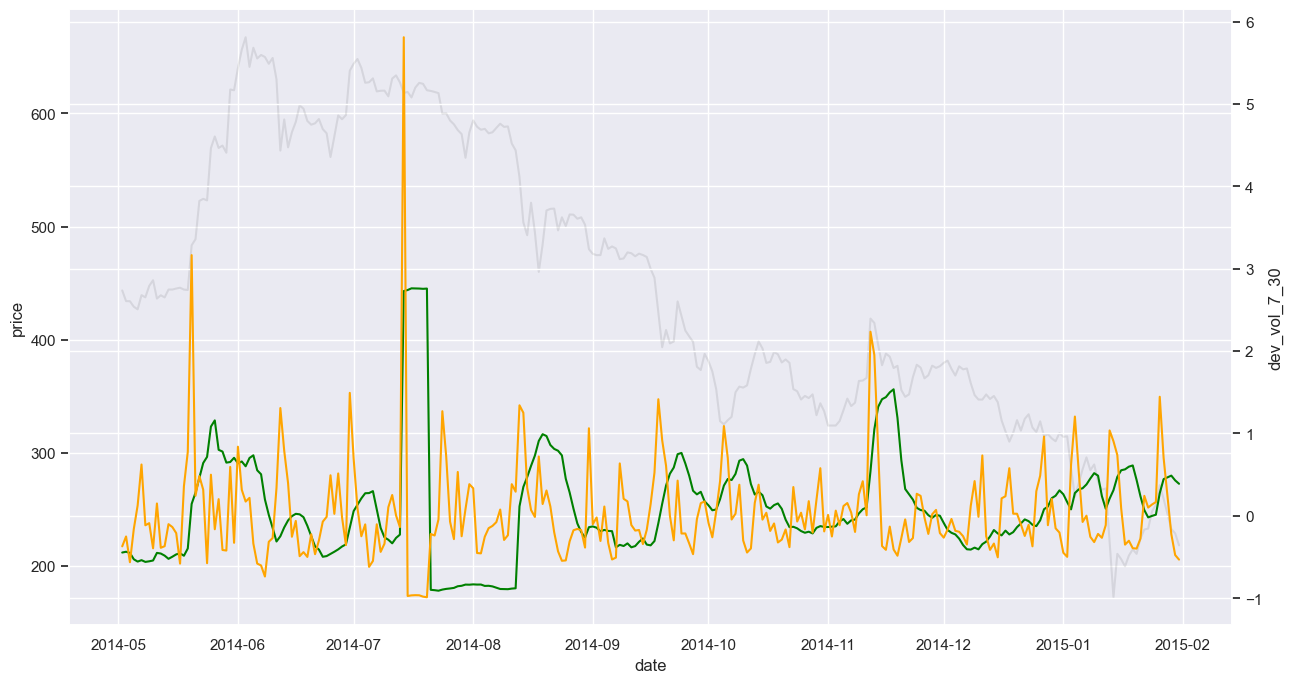

In [177]:
# plotting price signals 

from_date= '2014-05-01'
to_date= '2015-02-01' 

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
               data=plot_data[['date','dev_vol_7_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_vol_sma_7',
              data=plot_data[['date','dev_vol_sma_7']],color='orange',ax=ax2)

### Observations from above and below charts

* there is typically a sharp spike, usually over 100% in dev_vol_sma_7 as well as a trend reversal in dev_vol_7_30 at the start of selloffs
    * the trend reversal in dev_vol_7_30 could be positive OR negative
* looking at more examples, the dev_vol_sma_7 spike does not seem trustworthy and its better to rely on the trend change in dev_vol_7_30 as it is essentially capturing that only in trend reversals!
    


197.2063043169834 480.7440807468102 28.35377764298268
16538.8 16939.2 10.010000000000037


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

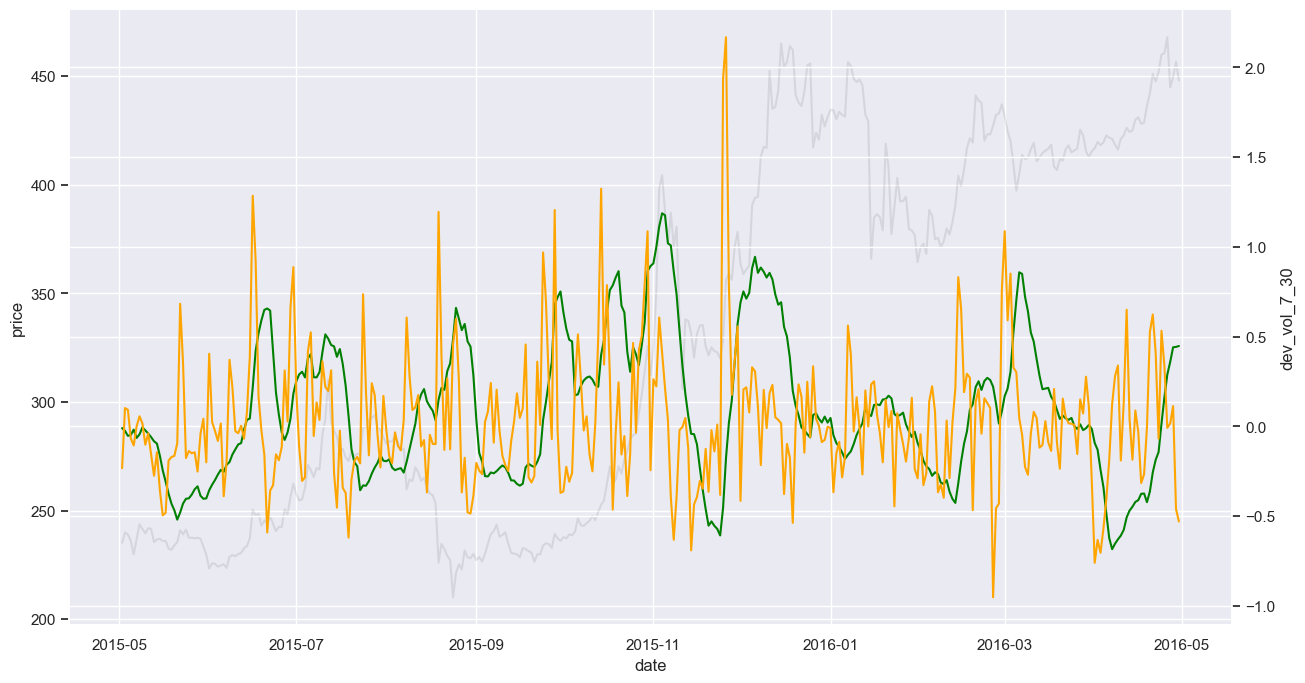

In [178]:
# plotting price signals 

from_date= '2015-05-01'
to_date= '2016-05-01' 

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
               data=plot_data[['date','dev_vol_7_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_vol_sma_7',
              data=plot_data[['date','dev_vol_sma_7']],color='orange',ax=ax2)

### <font color='purple'> A potential algorithm for a sell signal </font>


IF dev_price_sma_30 is <0 # definitely sell we have reached this point (original algo, laggy, but identified down correctly) OR

IF dev_price_7_30 changes trend and goes from +ve to negative AND dev_vol_7_30 trend changes (in any direction) , then sell 
OR

IF dev_price_7 is positive and goes -10% or more in 1-day, then SELL (this needs to be tested)



**NOT USING YET**
dev_price_7_30 remians in downtrend while price is following
dev_price_7 sees sharp peaks and trend changes around sharp peaks 

197.2063043169834 480.7440807468102 28.35377764298268
16538.8 16939.2 10.010000000000037


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

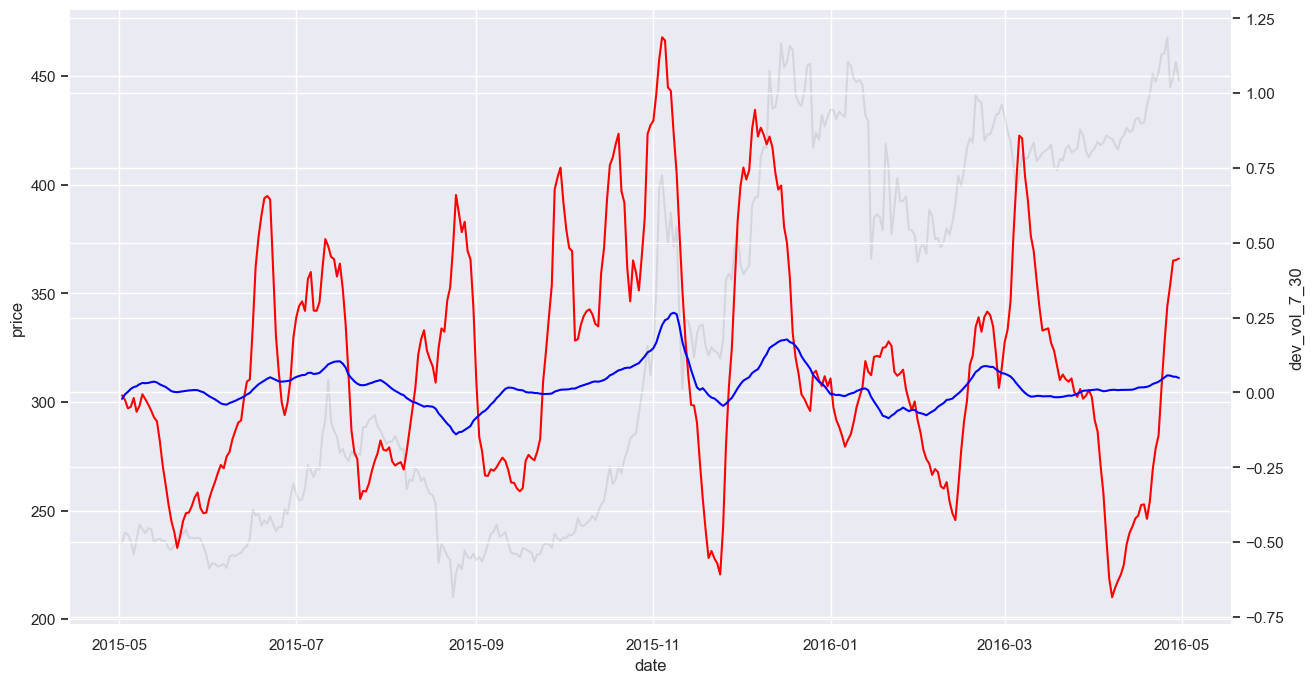

In [179]:
# plotting price signals 

from_date= '2015-05-01'
to_date= '2016-05-01' 

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
               data=plot_data[['date','dev_vol_7_30']],color='red',ax=ax2)


sns.lineplot(x='date', y='dev_price_7_30',
              data=plot_data[['date','dev_price_7_30']],color='blue',ax=ax2)

In [ ]:
# add flag to capture trend and trend reversal for dev_price_7_30 and dev_vol_7_30
# Its values will be: UP, DOWN, REV_UP, REV_DOWN

<font color = 'blue'> **After this point I have started to clean up the notebook as I go as well. i.e. compared to the code above, from this point on
I am more aggressive in deleting rought work. However, I have still kept most of the intermediate steps so this is still a workbook and not a 
cleaned up version.** </font>

In [181]:
btc_hist_prices['dev_price_7_30_diff']=btc_hist_prices['dev_price_7_30'].diff()

In [199]:
btc_hist_prices['dev_price_7_30_trend'] = None
btc_hist_prices.loc[btc_hist_prices['dev_price_7_30_diff']>0,'dev_price_7_30_trend'] = 'UP'
btc_hist_prices.loc[btc_hist_prices['dev_price_7_30_diff']<=0,'dev_price_7_30_trend'] = 'DOWN'
btc_hist_prices[['date','price','price_sma_30','dev_price_7_30','dev_price_7_30_diff','dev_price_7_30_trend']].tail(20)

date     price  price_sma_30  dev_price_7_30   
3480 2023-06-05 00:00:00  27315.45      27231.91        2.88e-03  \
3481 2023-06-06 00:00:00  25792.62      27128.74       -3.66e-03   
3482 2023-06-07 00:00:00  27216.62      27082.25       -4.58e-03   
3483 2023-06-08 00:00:00  26346.24      27037.23       -7.67e-03   
3484 2023-06-09 00:00:00  26507.91      27000.58       -8.00e-03   
3485 2023-06-10 00:00:00  26469.58      26961.58       -1.07e-02   
3486 2023-06-11 00:00:00  25858.12      26922.69       -1.57e-02   
3487 2023-06-12 00:00:00  25916.58      26893.65       -2.20e-02   
3488 2023-06-13 00:00:00  25910.36      26864.06       -2.03e-02   
3489 2023-06-14 00:00:00  25872.21      26829.41       -2.62e-02   
3490 2023-06-15 00:00:00  25107.75      26758.74       -3.03e-02   
3491 2023-06-16 00:00:00  25564.60      26710.13       -3.35e-02   
3492 2023-06-17 00:00:00  26327.33      26674.71       -3.30e-02   
3493 2023-06-18 00:00:00  26501.04      26663.32       -2.92e-02   
3494 2023-06-19 00:00:00  26333.09      26644.94       -2.63e-02   
3495 2023-06-20 00:00:00  26779.39      26634.46       -2.12e-02   
3496 2023-06-21 00:00:00  28330.89      26686.36       -9.96e-03   
3497 2023-06-22 00:00:00  30101.76      26794.10        1.27e-02   
3498 2023-06-23 00:00:00  29935.63      26884.52        3.25e-02   
3499 2023-06-23 05:35:52  30048.44      27008.17        4.75e-02   

      dev_price_7_30_diff dev_price_7_30_trend  
3480            -1.46e-03                 DOWN  
3481            -6.54e-03                 DOWN  
3482            -9.13e-04                 DOWN  
3483            -3.09e-03                 DOWN  
3484            -3.26e-04                 DOWN  
3485            -2.69e-03                 DOWN  
3486            -4.98e-03                 DOWN  
3487            -6.37e-03                 DOWN  
3488             1.70e-03                   UP  
3489            -5.89e-03                 DOWN  
3490            -4.04e-03                 DOWN  
3491            -3.28e-03                 DOWN  
3492             5.22e-04                   UP  
3493             3.86e-03                   UP  
3494             2.90e-03                   UP  
3495             5.04e-03                   UP  
3496             1.13e-02                   UP  
3497             2.26e-02                   UP  
3498             1.98e-02                   UP  
3499             1.50e-02                   UP

In [ ]:
# calculate the trend value and assig

In [ ]:

# use shift to create a -1 day shifted version of trend, then do a comparison
# if equal, then ew do nothing, else we assign a value depending on conditions
# we also ignore if any of the values is actually none



In [210]:
btc_hist_prices.loc[((btc_hist_prices['dev_price_7_30_trend'] == 'UP') & (
    btc_hist_prices['dev_price_7_30_trend'].shift()=='DOWN')),'dev_price_7_30_trend'] = 'REV_UP'
btc_hist_prices[['date','price','price_sma_30','dev_price_7_30','dev_price_7_30_diff','dev_price_7_30_trend']].tail(20)

date     price  price_sma_30  dev_price_7_30   
3475 2023-05-31 00:00:00  27713.91      27513.11       -1.36e-02  \
3476 2023-06-01 00:00:00  27245.47      27483.77       -7.88e-03   
3477 2023-06-02 00:00:00  26824.10      27422.76       -3.85e-03   
3478 2023-06-03 00:00:00  27247.74      27364.75        1.02e-03   
3479 2023-06-04 00:00:00  27066.37      27305.41        4.34e-03   
3480 2023-06-05 00:00:00  27315.45      27231.91        2.88e-03   
3481 2023-06-06 00:00:00  25792.62      27128.74       -3.66e-03   
3482 2023-06-07 00:00:00  27216.62      27082.25       -4.58e-03   
3483 2023-06-08 00:00:00  26346.24      27037.23       -7.67e-03   
3484 2023-06-09 00:00:00  26507.91      27000.58       -8.00e-03   
3485 2023-06-10 00:00:00  26469.58      26961.58       -1.07e-02   
3486 2023-06-11 00:00:00  25858.12      26922.69       -1.57e-02   
3487 2023-06-12 00:00:00  25916.58      26893.65       -2.20e-02   
3488 2023-06-13 00:00:00  25910.36      26864.06       -2.03e-02   
3489 2023-06-14 00:00:00  25872.21      26829.41       -2.62e-02   
3490 2023-06-15 00:00:00  25107.75      26758.74       -3.03e-02   
3491 2023-06-16 00:00:00  25564.60      26710.13       -3.35e-02   
3492 2023-06-17 00:00:00  26327.33      26674.71       -3.30e-02   
3493 2023-06-18 00:00:00  26501.04      26663.32       -2.92e-02   
3494 2023-06-19 00:00:00  26333.09      26644.94       -2.63e-02   
3495 2023-06-20 00:00:00  26779.39      26634.46       -2.12e-02   
3496 2023-06-21 00:00:00  28330.89      26686.36       -9.96e-03   
3497 2023-06-22 00:00:00  30101.76      26794.10        1.27e-02   
3498 2023-06-23 00:00:00  29935.63      26884.52        3.25e-02   
3499 2023-06-23 05:35:52  30048.44      27008.17        4.75e-02   

      dev_price_7_30_diff dev_price_7_30_trend  
3475             4.51e-03                   UP  
3476             5.76e-03                   UP  
3477             4.02e-03                   UP  
3478             4.88e-03                   UP  
3479             3.32e-03                   UP  
3480            -1.46e-03                 DOWN  
3481            -6.54e-03                 DOWN  
3482            -9.13e-04                 DOWN  
3483            -3.09e-03                 DOWN  
3484            -3.26e-04                 DOWN  
3485            -2.69e-03                 DOWN  
3486            -4.98e-03                 DOWN  
3487            -6.37e-03                 DOWN  
3488             1.70e-03               REV_UP  
3489            -5.89e-03                 DOWN  
3490            -4.04e-03                 DOWN  
3491            -3.28e-03                 DOWN  
3492             5.22e-04               REV_UP  
3493             3.86e-03                   UP  
3494             2.90e-03                   UP  
3495             5.04e-03                   UP  
3496             1.13e-02                   UP  
3497             2.26e-02                   UP  
3498             1.98e-02                   UP  
3499             1.50e-02                   UP

In [212]:
btc_hist_prices.loc[((btc_hist_prices['dev_price_7_30_trend'] == 'DOWN') & (
    btc_hist_prices['dev_price_7_30_trend'].shift()=='UP')),'dev_price_7_30_trend'] = 'REV_DOWN'
btc_hist_prices[['date','price','price_sma_30','dev_price_7_30','dev_price_7_30_diff','dev_price_7_30_trend']].tail(25)

date     price  price_sma_30  dev_price_7_30   
3475 2023-05-31 00:00:00  27713.91      27513.11       -1.36e-02  \
3476 2023-06-01 00:00:00  27245.47      27483.77       -7.88e-03   
3477 2023-06-02 00:00:00  26824.10      27422.76       -3.85e-03   
3478 2023-06-03 00:00:00  27247.74      27364.75        1.02e-03   
3479 2023-06-04 00:00:00  27066.37      27305.41        4.34e-03   
3480 2023-06-05 00:00:00  27315.45      27231.91        2.88e-03   
3481 2023-06-06 00:00:00  25792.62      27128.74       -3.66e-03   
3482 2023-06-07 00:00:00  27216.62      27082.25       -4.58e-03   
3483 2023-06-08 00:00:00  26346.24      27037.23       -7.67e-03   
3484 2023-06-09 00:00:00  26507.91      27000.58       -8.00e-03   
3485 2023-06-10 00:00:00  26469.58      26961.58       -1.07e-02   
3486 2023-06-11 00:00:00  25858.12      26922.69       -1.57e-02   
3487 2023-06-12 00:00:00  25916.58      26893.65       -2.20e-02   
3488 2023-06-13 00:00:00  25910.36      26864.06       -2.03e-02   
3489 2023-06-14 00:00:00  25872.21      26829.41       -2.62e-02   
3490 2023-06-15 00:00:00  25107.75      26758.74       -3.03e-02   
3491 2023-06-16 00:00:00  25564.60      26710.13       -3.35e-02   
3492 2023-06-17 00:00:00  26327.33      26674.71       -3.30e-02   
3493 2023-06-18 00:00:00  26501.04      26663.32       -2.92e-02   
3494 2023-06-19 00:00:00  26333.09      26644.94       -2.63e-02   
3495 2023-06-20 00:00:00  26779.39      26634.46       -2.12e-02   
3496 2023-06-21 00:00:00  28330.89      26686.36       -9.96e-03   
3497 2023-06-22 00:00:00  30101.76      26794.10        1.27e-02   
3498 2023-06-23 00:00:00  29935.63      26884.52        3.25e-02   
3499 2023-06-23 05:35:52  30048.44      27008.17        4.75e-02   

      dev_price_7_30_diff dev_price_7_30_trend  
3475             4.51e-03                   UP  
3476             5.76e-03                   UP  
3477             4.02e-03                   UP  
3478             4.88e-03                   UP  
3479             3.32e-03                   UP  
3480            -1.46e-03             REV_DOWN  
3481            -6.54e-03                 DOWN  
3482            -9.13e-04                 DOWN  
3483            -3.09e-03                 DOWN  
3484            -3.26e-04                 DOWN  
3485            -2.69e-03                 DOWN  
3486            -4.98e-03                 DOWN  
3487            -6.37e-03                 DOWN  
3488             1.70e-03               REV_UP  
3489            -5.89e-03                 DOWN  
3490            -4.04e-03                 DOWN  
3491            -3.28e-03                 DOWN  
3492             5.22e-04               REV_UP  
3493             3.86e-03                   UP  
3494             2.90e-03                   UP  
3495             5.04e-03                   UP  
3496             1.13e-02                   UP  
3497             2.26e-02                   UP  
3498             1.98e-02                   UP  
3499             1.50e-02                   UP

In [ ]:
# encapsulate in a function 

In [237]:
def calc_diff_trend (col) :
    col_diff=col+'_diff'
    col_trend=col+'_trend'
    btc_hist_prices[col_diff] = None
    btc_hist_prices[col_trend] = None
    btc_hist_prices[col_diff]=btc_hist_prices[col].diff()
    btc_hist_prices.loc[btc_hist_prices[col_diff]>0,col_trend] = 'UP'
    btc_hist_prices.loc[btc_hist_prices[col_diff]<=0,col_trend] = 'DOWN'
    btc_hist_prices.loc[((btc_hist_prices[col_trend] == 'UP') & (
        btc_hist_prices[col_trend].shift()=='DOWN')),col_trend] = 'REV_UP'
    btc_hist_prices.loc[((btc_hist_prices[col_trend] == 'DOWN') & (
        btc_hist_prices[col_trend].shift()=='UP')),col_trend] = 'REV_DOWN'

    

In [241]:
calc_diff_trend ('dev_price_7_30')
calc_diff_trend ('dev_vol_7_30')
calc_diff_trend ('dev_price_sma_7')

In [ ]:
btc_hist_prices[['date','price','price_sma_30',
                       'dev_price_7_30','dev_price_7_30_diff','dev_price_7_30_trend',
                     'dev_vol_7_30','dev_vol_7_30_diff','dev_vol_7_30_trend' ,
                     'dev_price_sma_7','dev_price_sma_7_diff','dev_price_sma_7_trend']].tail(25)

In [238]:
# clearing the columns before operation
btc_hist_prices[['dev_price_7_30_diff','dev_price_7_30_trend']] = None
btc_hist_prices[['dev_price_7_30_diff','dev_price_7_30_trend']]

dev_price_7_30_diff dev_price_7_30_trend
0                   None                 None
1                   None                 None
2                   None                 None
3                   None                 None
4                   None                 None
...                  ...                  ...
3495                None                 None
3496                None                 None
3497                None                 None
3498                None                 None
3499                None                 None

[3500 rows x 2 columns]

In [239]:
calc_diff_trend ('dev_price_7_30') ### LATER I will mdofiy this so that I can specify any number of columns in a
    # single function call, rather than having to call it again and again 

In [240]:
btc_hist_prices[['date','price','price_sma_30','dev_price_7_30','dev_price_7_30_diff','dev_price_7_30_trend']].tail(25)

date     price  price_sma_30  dev_price_7_30   
3475 2023-05-31 00:00:00  27713.91      27513.11       -1.36e-02  \
3476 2023-06-01 00:00:00  27245.47      27483.77       -7.88e-03   
3477 2023-06-02 00:00:00  26824.10      27422.76       -3.85e-03   
3478 2023-06-03 00:00:00  27247.74      27364.75        1.02e-03   
3479 2023-06-04 00:00:00  27066.37      27305.41        4.34e-03   
3480 2023-06-05 00:00:00  27315.45      27231.91        2.88e-03   
3481 2023-06-06 00:00:00  25792.62      27128.74       -3.66e-03   
3482 2023-06-07 00:00:00  27216.62      27082.25       -4.58e-03   
3483 2023-06-08 00:00:00  26346.24      27037.23       -7.67e-03   
3484 2023-06-09 00:00:00  26507.91      27000.58       -8.00e-03   
3485 2023-06-10 00:00:00  26469.58      26961.58       -1.07e-02   
3486 2023-06-11 00:00:00  25858.12      26922.69       -1.57e-02   
3487 2023-06-12 00:00:00  25916.58      26893.65       -2.20e-02   
3488 2023-06-13 00:00:00  25910.36      26864.06       -2.03e-02   
3489 2023-06-14 00:00:00  25872.21      26829.41       -2.62e-02   
3490 2023-06-15 00:00:00  25107.75      26758.74       -3.03e-02   
3491 2023-06-16 00:00:00  25564.60      26710.13       -3.35e-02   
3492 2023-06-17 00:00:00  26327.33      26674.71       -3.30e-02   
3493 2023-06-18 00:00:00  26501.04      26663.32       -2.92e-02   
3494 2023-06-19 00:00:00  26333.09      26644.94       -2.63e-02   
3495 2023-06-20 00:00:00  26779.39      26634.46       -2.12e-02   
3496 2023-06-21 00:00:00  28330.89      26686.36       -9.96e-03   
3497 2023-06-22 00:00:00  30101.76      26794.10        1.27e-02   
3498 2023-06-23 00:00:00  29935.63      26884.52        3.25e-02   
3499 2023-06-23 05:35:52  30048.44      27008.17        4.75e-02   

      dev_price_7_30_diff dev_price_7_30_trend  
3475             4.51e-03                   UP  
3476             5.76e-03                   UP  
3477             4.02e-03                   UP  
3478             4.88e-03                   UP  
3479             3.32e-03                   UP  
3480            -1.46e-03             REV_DOWN  
3481            -6.54e-03                 DOWN  
3482            -9.13e-04                 DOWN  
3483            -3.09e-03                 DOWN  
3484            -3.26e-04                 DOWN  
3485            -2.69e-03                 DOWN  
3486            -4.98e-03                 DOWN  
3487            -6.37e-03                 DOWN  
3488             1.70e-03               REV_UP  
3489            -5.89e-03                 DOWN  
3490            -4.04e-03                 DOWN  
3491            -3.28e-03                 DOWN  
3492             5.22e-04               REV_UP  
3493             3.86e-03                   UP  
3494             2.90e-03                   UP  
3495             5.04e-03                   UP  
3496             1.13e-02                   UP  
3497             2.26e-02                   UP  
3498             1.98e-02                   UP  
3499             1.50e-02                   UP

In [241]:
calc_diff_trend ('dev_price_7_30')
calc_diff_trend ('dev_vol_7_30')
calc_diff_trend ('dev_price_sma_7')

In [242]:
btc_hist_prices[['date','price','price_sma_30',
                       'dev_price_7_30','dev_price_7_30_diff','dev_price_7_30_trend',
                     'dev_vol_7_30','dev_vol_7_30_diff','dev_vol_7_30_trend' ,
                     'dev_price_sma_7','dev_price_sma_7_diff','dev_price_sma_7_trend']].tail(25)

date     price  price_sma_30  dev_price_7_30   
3475 2023-05-31 00:00:00  27713.91      27513.11       -1.36e-02  \
3476 2023-06-01 00:00:00  27245.47      27483.77       -7.88e-03   
3477 2023-06-02 00:00:00  26824.10      27422.76       -3.85e-03   
3478 2023-06-03 00:00:00  27247.74      27364.75        1.02e-03   
3479 2023-06-04 00:00:00  27066.37      27305.41        4.34e-03   
3480 2023-06-05 00:00:00  27315.45      27231.91        2.88e-03   
3481 2023-06-06 00:00:00  25792.62      27128.74       -3.66e-03   
3482 2023-06-07 00:00:00  27216.62      27082.25       -4.58e-03   
3483 2023-06-08 00:00:00  26346.24      27037.23       -7.67e-03   
3484 2023-06-09 00:00:00  26507.91      27000.58       -8.00e-03   
3485 2023-06-10 00:00:00  26469.58      26961.58       -1.07e-02   
3486 2023-06-11 00:00:00  25858.12      26922.69       -1.57e-02   
3487 2023-06-12 00:00:00  25916.58      26893.65       -2.20e-02   
3488 2023-06-13 00:00:00  25910.36      26864.06       -2.03e-02   
3489 2023-06-14 00:00:00  25872.21      26829.41       -2.62e-02   
3490 2023-06-15 00:00:00  25107.75      26758.74       -3.03e-02   
3491 2023-06-16 00:00:00  25564.60      26710.13       -3.35e-02   
3492 2023-06-17 00:00:00  26327.33      26674.71       -3.30e-02   
3493 2023-06-18 00:00:00  26501.04      26663.32       -2.92e-02   
3494 2023-06-19 00:00:00  26333.09      26644.94       -2.63e-02   
3495 2023-06-20 00:00:00  26779.39      26634.46       -2.12e-02   
3496 2023-06-21 00:00:00  28330.89      26686.36       -9.96e-03   
3497 2023-06-22 00:00:00  30101.76      26794.10        1.27e-02   
3498 2023-06-23 00:00:00  29935.63      26884.52        3.25e-02   
3499 2023-06-23 05:35:52  30048.44      27008.17        4.75e-02   

      dev_price_7_30_diff dev_price_7_30_trend  dev_vol_7_30   
3475             4.51e-03                   UP      4.34e-02  \
3476             5.76e-03                   UP     -1.97e-02   
3477             4.02e-03                   UP     -9.96e-04   
3478             4.88e-03                   UP      6.97e-02   
3479             3.32e-03                   UP      9.78e-02   
3480            -1.46e-03             REV_DOWN      1.89e-03   
3481            -6.54e-03                 DOWN      5.54e-02   
3482            -9.13e-04                 DOWN      1.34e-01   
3483            -3.09e-03                 DOWN      2.14e-01   
3484            -3.26e-04                 DOWN      1.85e-01   
3485            -2.69e-03                 DOWN      1.46e-01   
3486            -4.98e-03                 DOWN      1.78e-01   
3487            -6.37e-03                 DOWN      2.28e-01   
3488             1.70e-03               REV_UP      8.13e-02   
3489            -5.89e-03                 DOWN     -8.05e-02   
3490            -4.04e-03                 DOWN     -1.07e-01   
3491            -3.28e-03                 DOWN     -5.22e-02   
3492             5.22e-04               REV_UP     -1.67e-02   
3493             3.86e-03                   UP     -1.08e-02   
3494             2.90e-03                   UP     -2.52e-02   
3495             5.04e-03                   UP     -7.13e-02   
3496             1.13e-02                   UP      1.77e-02   
3497             2.26e-02                   UP      1.09e-01   
3498             1.98e-02                   UP      1.36e-01   
3499             1.50e-02                   UP      1.59e-01   

      dev_vol_7_30_diff dev_vol_7_30_trend  dev_price_sma_7   
3475           1.88e-02                 UP         2.12e-02  \
3476          -6.31e-02           REV_DOWN        -8.01e-04   
3477           1.87e-02             REV_UP        -1.80e-02   
3478           7.07e-02                 UP        -5.30e-03   
3479           2.81e-02                 UP        -1.30e-02   
3480          -9.59e-02           REV_DOWN         1.85e-04   
3481           5.35e-02             REV_UP        -4.58e-02   
3482           7.82e-02                 UP         9.58e-03   
3483           8.04

In [246]:
btc_hist_prices['signal'] = None 
btc_hist_prices['trade_reco'] = None 
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30','signal', 'trade_reco']].sample(20)

date     price  price_sma_30  dev_price_sma_30 signal trade_reco
2544 2020-11-11  15278.71      13223.76          1.55e-01   None       None
3462 2023-05-18  27389.97      28186.09         -2.82e-02   None       None
1726 2018-08-16   6267.77       7244.70         -1.35e-01   None       None
3338 2023-01-14  19941.78      17032.18          1.71e-01   None       None
1959 2019-04-06   5014.96       4104.42          2.22e-01   None       None
2758 2021-06-13  35666.15      38413.86         -7.15e-02   None       None
647  2015-09-02    228.64        246.92         -7.40e-02   None       None
2359 2020-05-10   9566.78       7877.52          2.14e-01   None       None
1191 2017-02-27   1193.13       1047.34          1.39e-01   None       None
1218 2017-03-26    954.48       1150.24         -1.70e-01   None       None
1705 2018-07-26   8144.55       6759.57          2.05e-01   None       None
3460 2023-05-16  27227.79      28364.74         -4.01e-02   None       None
616  2015-08-02    281.73        281.18          1.94e-03   None       None
652  2015-09-07    240.50        239.89          2.55e-03   None       None
2657 2021-03-04  50577.46      47084.63          7.42e-02   None       None
1868 2019-01-05   3815.27       3641.95          4.76e-02   None       None
597  2015-07-14    286.67        259.55          1.04e-01   None       None
1491 2017-12-24  14451.11      14513.37         -4.29e-03   None       None
2276 2020-02-17   9943.67       9363.24          6.20e-02   None       None
778  2016-01-11    448.35        441.74          1.50e-02   None       None

In [ ]:
# calculate the sell signal 

IF dev_price_sma_30 is <0 # definitely sell we have reached this point (original algo, laggy, but identified down correctly) OR

IF dev_price_7_30 changes trend and goes from +ve to negative AND dev_vol_7_30 trend changes (in any direction) , then sell 
OR

IF dev_price_7 is positive and goes -10% or more in 1-day, then SELL (this needs to be tested - this helps with identifying sharp peaks)


In [ ]:
# some of the code below might be a repeat of the above code!

#### calculating signals

In [254]:
###
older version with vol check as well as price check 
# btc_hist_prices['signal'] = None 
# btc_hist_prices['trade_reco'] = None 

# for index, row in btc_hist_prices.iterrows():
#     if (row['dev_price_sma_30'] >0):
#         btc_hist_prices.at[index,'signal'] ='BUY'
        
# for index, row in btc_hist_prices.iterrows():
# #     if (row['dev_price_sma_30'] <=0):
# #         btc_hist_prices.at[index,'signal'] ='SELL'
#     if ((row['dev_price_7_30_trend']=='REV_DOWN') & (
#         (row['dev_vol_7_30_trend']=='REV_UP')|(row['dev_vol_7_30_trend']=='REV_DOWN')) ):
#          btc_hist_prices.at[index,'signal'] ='SELL'
            
# ### havent added the last conndition yet on dev_price_sma_7###

In [263]:

# newer version without vol check 

btc_hist_prices['signal'] = None 
btc_hist_prices['trade_reco'] = None 

for index, row in btc_hist_prices.iterrows():
    if (row['dev_price_sma_30'] >0):
        btc_hist_prices.at[index,'signal'] ='BUY'
        
for index, row in btc_hist_prices.iterrows():
    if (row['dev_price_7_30_trend']=='REV_DOWN'):
         btc_hist_prices.at[index,'signal'] ='SELL'
    elif (row['dev_price_7_30'] <0):
        btc_hist_prices.at[index,'signal'] ='SELL'
            
### havent added the last conndition yet on dev_price_sma_7###

In [264]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30','signal', 'trade_reco']].sample(20)

date     price  price_sma_30  dev_price_sma_30 signal trade_reco
1775 2018-10-04   6499.26       6526.08         -4.11e-03   None       None
43   2014-01-05    919.41        766.07          2.00e-01    BUY       None
3227 2022-09-25  18939.97      19952.53         -5.07e-02   SELL       None
2977 2022-01-18  42298.34      45877.80         -7.80e-02   SELL       None
20   2013-12-13    897.27           NaN               NaN   None       None
2042 2019-06-28  11178.68       9088.48          2.30e-01    BUY       None
3389 2023-03-06  22421.89      23205.54         -3.38e-02   SELL       None
3276 2022-11-13  16797.99      19537.39         -1.40e-01   SELL       None
929  2016-06-10    579.23        501.11          1.56e-01   SELL       None
803  2016-02-05    385.73        400.85         -3.77e-02   SELL       None
842  2016-03-15    415.64        419.73         -9.73e-03   SELL       None
1267 2017-05-14   1767.71       1423.65          2.42e-01    BUY       None
2555 2020-11-22  18689.53      15163.55          2.33e-01    BUY       None
270  2014-08-20    514.19        565.37         -9.05e-02   SELL       None
1709 2018-07-30   8197.59       7033.40          1.66e-01    BUY       None
830  2016-03-03    420.17        407.50          3.11e-02    BUY       None
1258 2017-05-05   1506.04       1275.37          1.81e-01    BUY       None
3089 2022-05-10  30269.59      38944.76         -2.23e-01   SELL       None
2885 2021-10-18  61583.77      49897.07          2.34e-01    BUY       None
2498 2020-09-26  10681.99      10772.79         -8.43e-03   SELL       None

In [265]:
def isBuyorSell(date):
    return (btc_hist_prices[btc_hist_prices.date==date]['signal'].iloc[0]) # tested OK (temp comment)

In [266]:
def create_trade(buy_date):
    if(type(buy_date)==str):
        buy_date=datetime.datetime.strptime(buy_date, format)
    sell_date=buy_date 
    btc_hist_prices.loc[btc_hist_prices.date ==buy_date,'trade_reco'] ='BUY'
    
    for idate in btc_hist_prices.date:
        if (idate <= buy_date):
            continue # skip the rest of the loop until we are past the buy_date
        elif (isBuyorSell(idate)=='SELL'):
            btc_hist_prices.loc[btc_hist_prices.date ==idate,'trade_reco'] ='SELL'
            sell_date=idate
            break # if SELL found, break the loop
    return sell_date

In [395]:
btc_hist_prices['signal'] = None 
btc_hist_prices['trade_reco'] = None 

# Calculate BUY signals

for index, row in btc_hist_prices.iterrows():
     if ((row['dev_price_7_30_trend'] =='UP') & (row['dev_vol_7_30_trend'] =='UP')):
        btc_hist_prices.at[index,'signal'] ='BUY'
#      if ((row['dev_price_7_30'] <0)& (row['dev_price_7_30_trend']=='REV_UP')& ((row['dev_vol_7_30_trend']=='REV_UP')|(row['dev_vol_7_30_trend']=='UP'))):
#          btc_hist_prices.at[index,'signal'] ='BUY'


        
# # calculate SELL signals 
for index, row in btc_hist_prices.iterrows():
    if (row['dev_price_7_30_trend']=='REV_DOWN'):
         btc_hist_prices.at[index,'signal'] ='SELL'
    elif ((row['dev_price_7_30'] <0)& (row['dev_price_7_30_trend']=='DOWN')):
        btc_hist_prices.at[index,'signal'] ='SELL'
            
#### HAVe REVISED SELL SIGNAL to add a condition that dev price 7 30 trend != REV_UP to signal a sell when its -ve

In [396]:
btc_hist_prices.trade_reco = None
start_date= btc_hist_prices.loc[0]['date']

for idate in btc_hist_prices.date : 
    if (idate<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(idate)=='BUY'):
        start_date=create_trade(idate) # record the trade and scan next 
        

In [267]:
btc_hist_prices.trade_reco = None
start_date= btc_hist_prices.loc[0]['date']

for idate in btc_hist_prices.date : ### IMP: (check with Neha)should I sort the dates in case they are not in order in DF?
    if (idate<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(idate)=='BUY'):
        start_date=create_trade(idate) # record the trade and scan next 
        

In [395]:
btc_hist_prices['signal'] = None 
btc_hist_prices['trade_reco'] = None 

# Calculate BUY signals

for index, row in btc_hist_prices.iterrows():
     if ((row['dev_price_7_30_trend'] =='UP') & (row['dev_vol_7_30_trend'] =='UP')):
        btc_hist_prices.at[index,'signal'] ='BUY'
#      if ((row['dev_price_7_30'] <0)& (row['dev_price_7_30_trend']=='REV_UP')& ((row['dev_vol_7_30_trend']=='REV_UP')|(row['dev_vol_7_30_trend']=='UP'))):
#          btc_hist_prices.at[index,'signal'] ='BUY'


        
# # calculate SELL signals 
for index, row in btc_hist_prices.iterrows():
    if (row['dev_price_7_30_trend']=='REV_DOWN'):
         btc_hist_prices.at[index,'signal'] ='SELL'
    elif ((row['dev_price_7_30'] <0)& (row['dev_price_7_30_trend']=='DOWN')):
        btc_hist_prices.at[index,'signal'] ='SELL'
            
#### HAVe REVISED SELL SIGNAL to add a condition that dev price 7 30 trend != REV_UP to signal a sell when its -ve

In [396]:
btc_hist_prices.trade_reco = None
start_date= btc_hist_prices.loc[0]['date']

for idate in btc_hist_prices.date : 
    if (idate<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(idate)=='BUY'):
        start_date=create_trade(idate) # record the trade and scan next 
        

In [268]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30',
                       'signal', 'trade_reco']] [(btc_hist_prices['trade_reco']=='BUY') 
                                                 | (btc_hist_prices['trade_reco']=='SELL')].head(50)

date   price  price_sma_30  dev_price_sma_30 signal trade_reco
42  2014-01-04  849.14        769.41          1.04e-01    BUY        BUY
50  2014-01-12  867.45        767.66          1.30e-01   SELL       SELL
51  2014-01-13  840.96        766.79          9.67e-02    BUY        BUY
54  2014-01-16  837.98        773.49          8.34e-02   SELL       SELL
55  2014-01-17  812.90        781.94          3.96e-02    BUY        BUY
66  2014-01-28  777.00        839.84         -7.48e-02   SELL       SELL
106 2014-03-09  636.17        618.44          2.87e-02    BUY        BUY
108 2014-03-11  624.23        614.16          1.64e-02   SELL       SELL
109 2014-03-12  638.07        612.45          4.18e-02    BUY        BUY
113 2014-03-16  629.55        609.37          3.31e-02   SELL       SELL
114 2014-03-17  623.71        608.69          2.47e-02    BUY        BUY
119 2014-03-22  561.22        604.03         -7.09e-02   SELL       SELL
148 2014-04-20  497.32        484.98          2.54e-02    BUY        BUY
150 2014-04-22  484.85        479.93          1.03e-02   SELL       SELL
151 2014-04-23  487.52        477.14          2.18e-02    BUY        BUY
154 2014-04-26  453.80        466.21         -2.66e-02   SELL       SELL
178 2014-05-20  483.42        449.93          7.44e-02    BUY        BUY
195 2014-06-06  648.63        528.96          2.26e-01   SELL       SELL
196 2014-06-07  651.71        536.11          2.16e-01    BUY        BUY
207 2014-06-18  604.19        596.50          1.29e-02   SELL       SELL
221 2014-07-02  648.11        611.99          5.90e-02    BUY        BUY
226 2014-07-07  619.50        607.94          1.90e-02   SELL       SELL
227 2014-07-08  620.05        606.95          2.16e-02    BUY        BUY
243 2014-07-24  599.81        618.66         -3.05e-02   SELL       SELL
328 2014-10-17  380.29        379.43          2.28e-03    BUY        BUY
331 2014-10-20  379.77        377.11          7.05e-03   SELL       SELL
332 2014-10-21  382.41        376.64          1.53e-02    BUY        BUY
337 2014-10-26  350.19        367.42         -4.69e-02   SELL       SELL
354 2014-11-12  418.58        359.05          1.66e-01    BUY        BUY
361 2014-11-19  376.79        359.23          4.89e-02   SELL       SELL
365 2014-11-23  366.78        357.59          2.57e-02    BUY        BUY
373 2014-12-01  379.49        366.28          3.61e-02   SELL       SELL
374 2014-12-02  381.38        368.19          3.58e-02    BUY        BUY
380 2014-12-08  361.43        375.04         -3.63e-02   SELL       SELL
447 2015-02-14  259.01        227.81          1.37e-01    BUY        BUY
454 2015-02-21  244.15        234.49          4.12e-02   SELL       SELL
455 2015-02-22  235.55        234.61          4.02e-03    BUY        BUY
457 2015-02-24  238.73        234.47          1.82e-02   SELL       SELL
458 2015-02-25  237.38        233.92          1.48e-02    BUY        BUY
471 2015-03-10  290.31        250.09          1.61e-01   SELL       SELL
472 2015-03-11  295.96        252.62          1.72e-01    BUY        BUY
474 2015-03-13  288.04        257.36          1.19e-01   SELL       SELL
475 2015-03-14  281.49        259.34          8.54e-02    BUY        BUY
484 2015-03-23  266.03        268.02         -7.44e-03   SELL       SELL
526 2015-05-04  238.97        233.00          2.56e-02    BUY        BUY
532 2015-05-10  239.55        230.91          3.75e-02   SELL       SELL
533 2015-05-11  241.85        231.09          4.66e-02    BUY        BUY
536 2015-05-14  236.70        232.29          1.90e-02   SELL       SELL
537 2015-05-15  236.99        232.75          1.82e-02    BUY        BUY
550 2015-05-28  237.49        236.86          2.67e-03   SELL       SELL

197.2063043169834 480.7440807468102 28.35377764298268
16538.8 16939.2 10.010000000000037


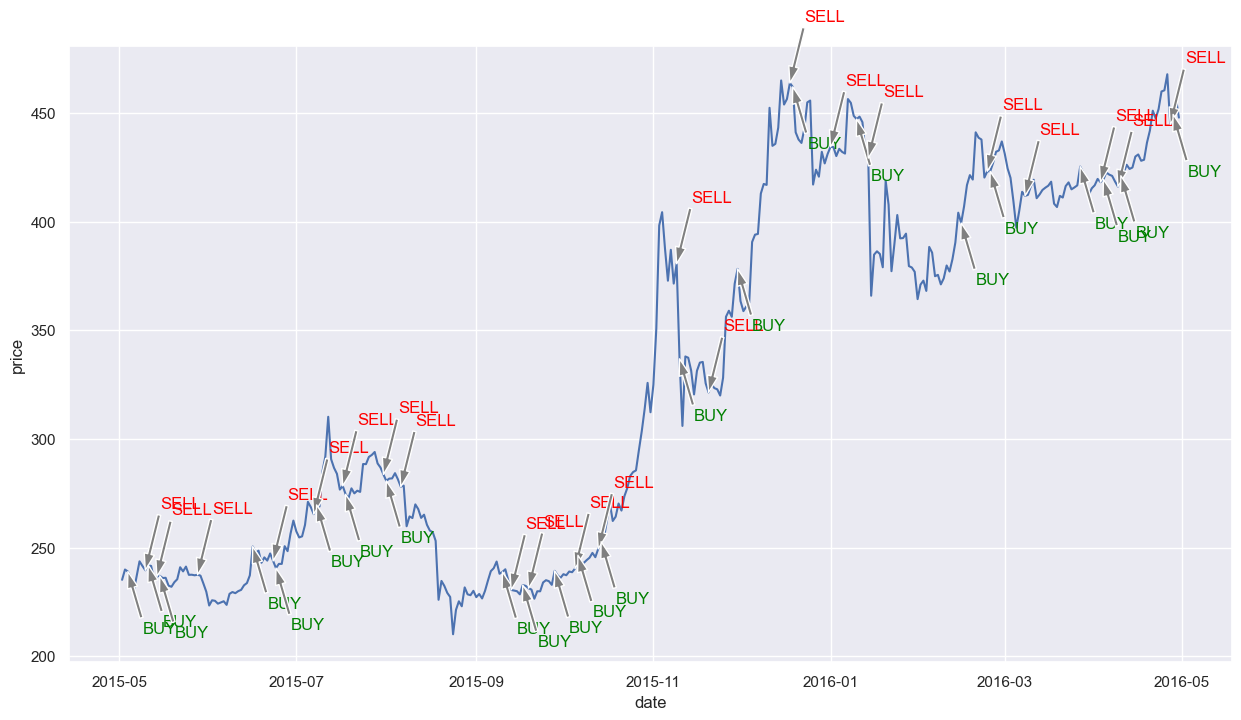

In [269]:
from_date= '2015-05-01' 
to_date= '2016-05-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


197.2063043169834 480.7440807468102 28.35377764298268
16538.8 16939.2 10.010000000000037


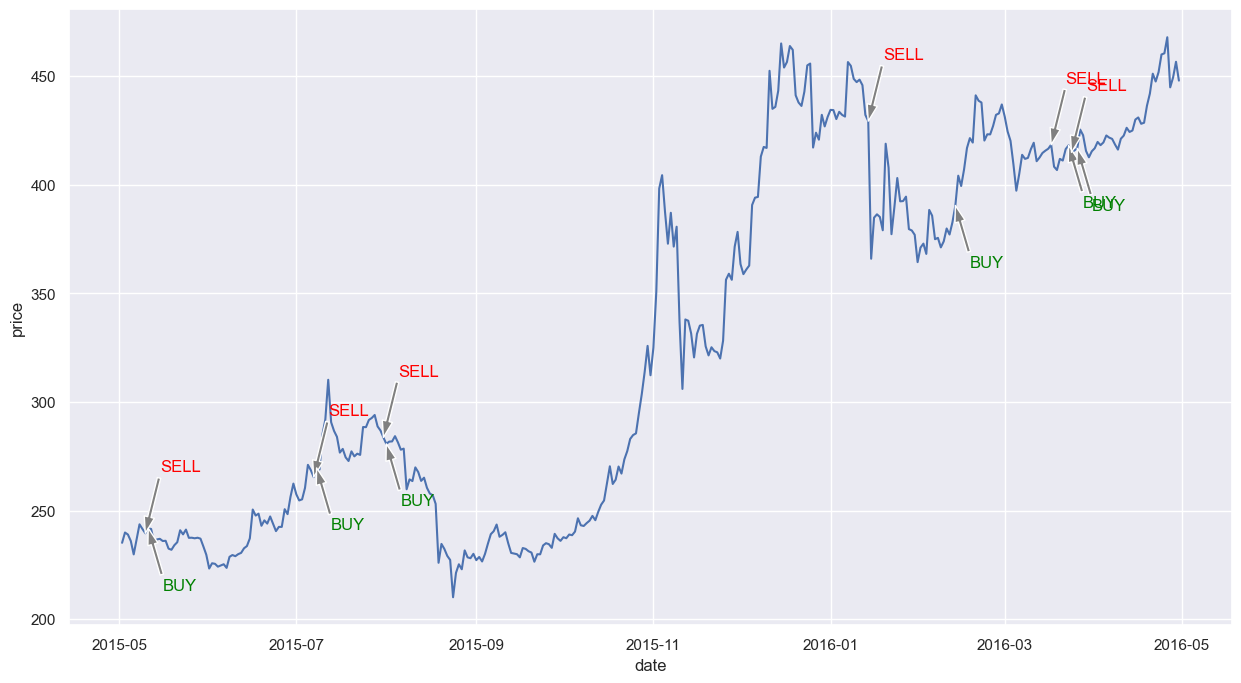

In [260]:
# older but improved version
from_date= '2015-05-01' 
to_date= '2016-05-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


In [ ]:
## OLD PLOT BELOW]

197.2063043169834 480.7440807468102 28.35377764298268
16538.8 16939.2 10.010000000000037


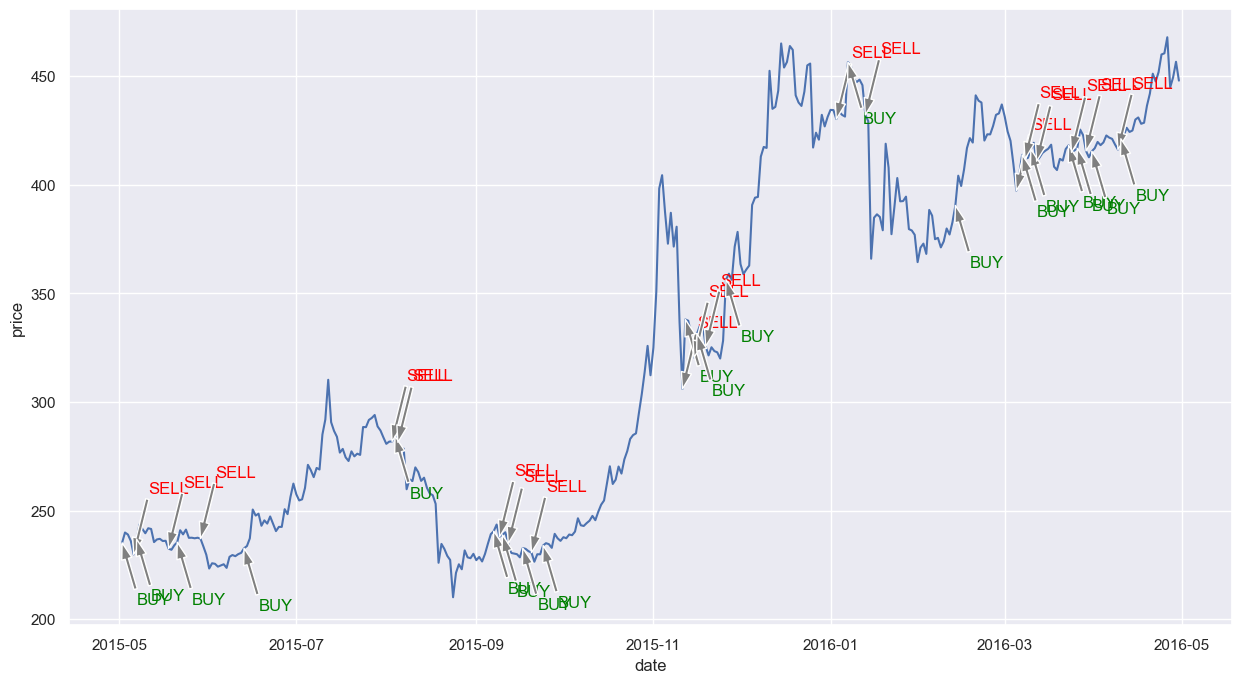

In [166]:
from_date= '2015-05-01' 
to_date= '2016-05-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


## <font color='red'>24 June - 'Sell' signal Algo update based on observations (important)</font> 

* the newer algo for sell signal, that only depends on dev price 7 30 trend change (NOT vol) and whether dev price 7 30 is <0

* works better than previous version as the older algo made me buy high and sell low. this new algo actually sells much sooner

* in the graph, we see too many buys and sells, but thats because I havent fixed buy yet. Sell is doing its job

* will try adding in vol and idenfitying sharp peaks ideas later if felt the need for them keeping it simple for now

147.38688 692.12932 54.474244
16178.3 16479.7 7.535000000000037


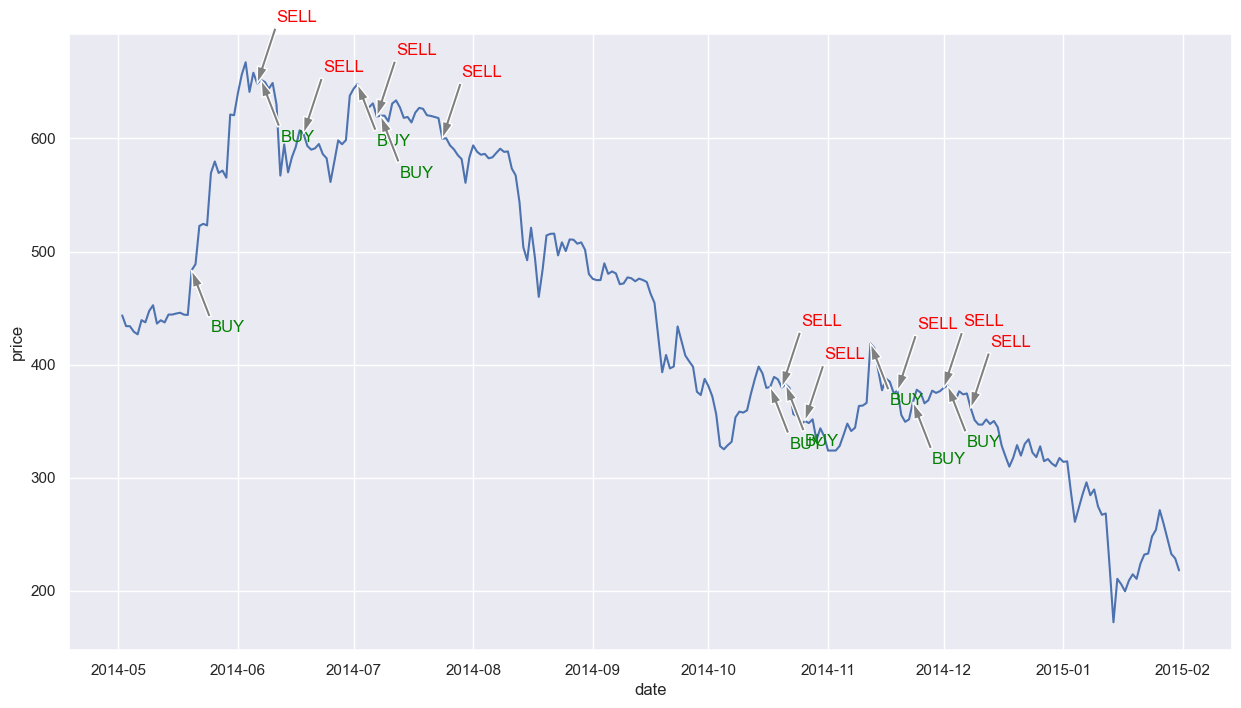

In [270]:
from_date= '2014-05-01' 
to_date= '2015-02-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


147.38688 692.12932 54.474244
16178.3 16479.7 7.535000000000037


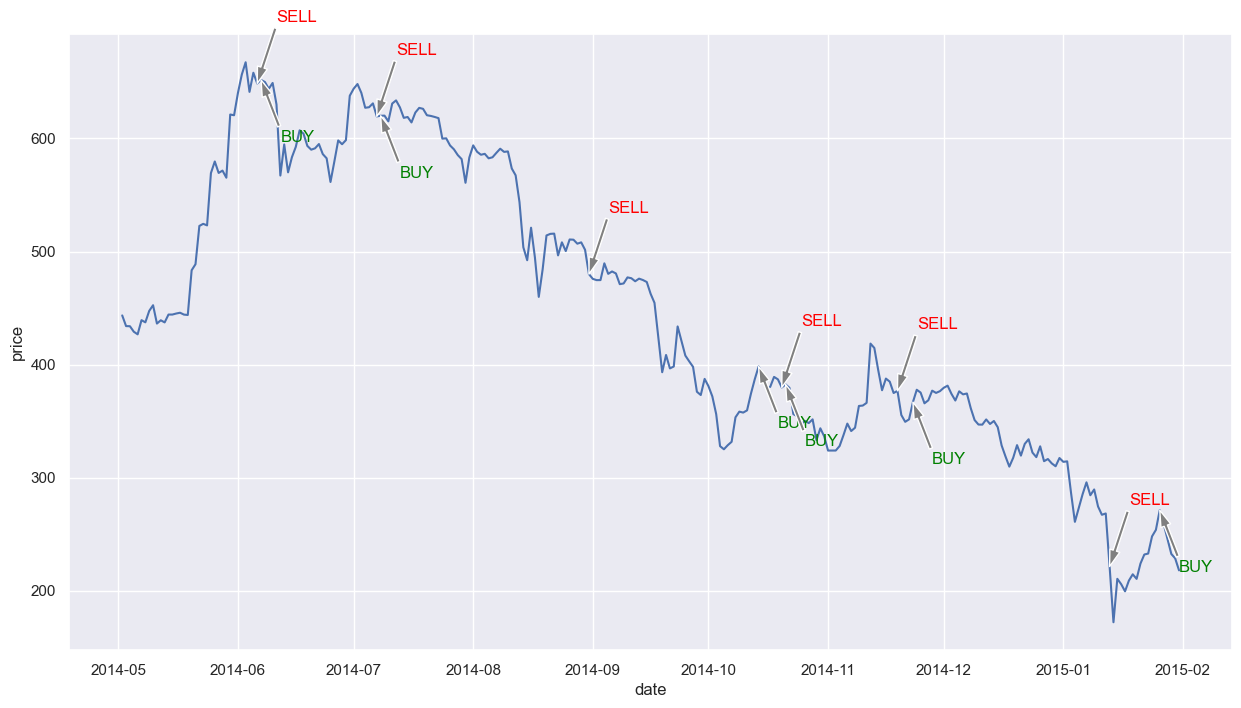

In [261]:
# older but improved algo plot
from_date= '2014-05-01' 
to_date= '2015-02-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


In [ ]:
## OLD PLOT BELOW

147.38688 692.12932 54.474244
16178.3 16479.7 7.535000000000037


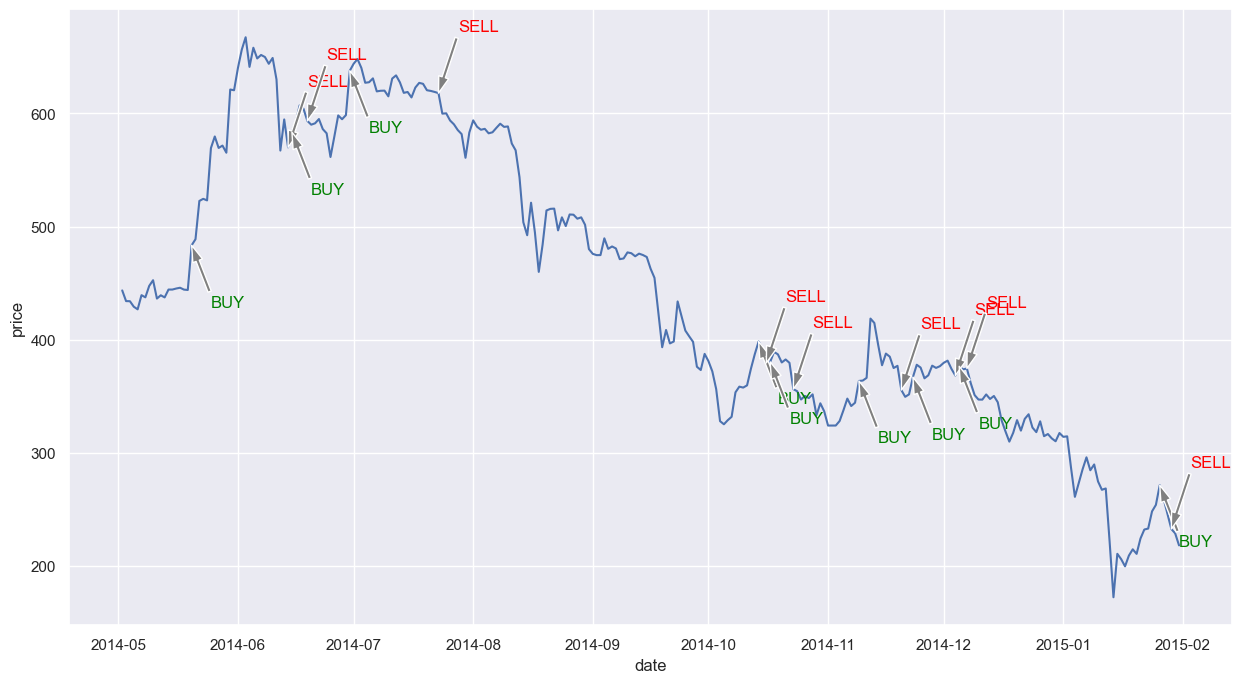

In [165]:
from_date= '2014-05-01' 
to_date= '2015-02-01' 


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)


### Avoiding false buy/sell in choppy times

check 30-day price volatility, 7-day price volalitlity for thresholds. And 7-day, 30-day volumes and prices, their thresholds OR trend reversals to filter out fake buys

### <font color='green'> Observations (important)(copied from above) </font>

* this algo captures long term up or down moves very well
    * it  is based on 30-day averge vs current price, so does this very well

* the sell is almost always past the actual peak and well in the downtrend often
    * this is because we are looking at 30-day averages, which takes some time to change. We should instead look 
    at 7-day price, 7-day vol, 7-30-vol,7-30 price and their trends to find the sell signal sooner

* the algo makes numerous small trades that dont make much profit 
    * IT seems like this happens where there is a lot of volatility in price since the algo is literally just checking 
    against 30day average. the solution would be to look at vol-7, vol-7-30, price7, price 7-30 trends to filter the buy
    signal when there are legit buy conditions
    
* buy is a bit delayed but doesnt seem like a huge problem 
    * will investigate later if seems like an issue



**Dates for testing fake buy signal solution** 
from_date= '2014-09-01' 
to_date= '2015-09-01' 

from_date= '2016-01-01' 
to_date= '2016-05-01' 


from_date= '2020-06-01' 
to_date= '2020-11-01' 


156.27792 505.4174800000001 34.91395600000001
16296.85 16696.15 9.982500000000028


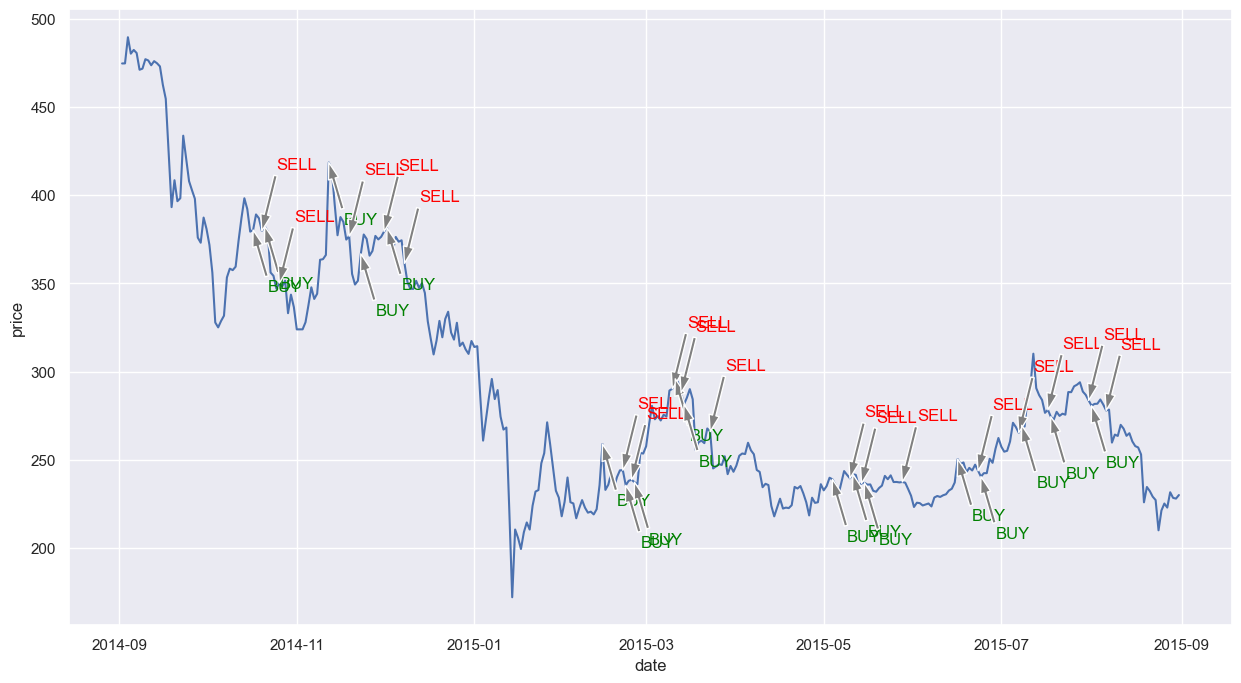

In [272]:
from_date= '2014-09-01' 
to_date= '2015-09-01'


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)

8781.841572115794 13887.249408443427 510.54078363276335
18407.45 18573.55 4.152499999999963


<Axes: xlabel='date', ylabel='dev_price_sma_7'>

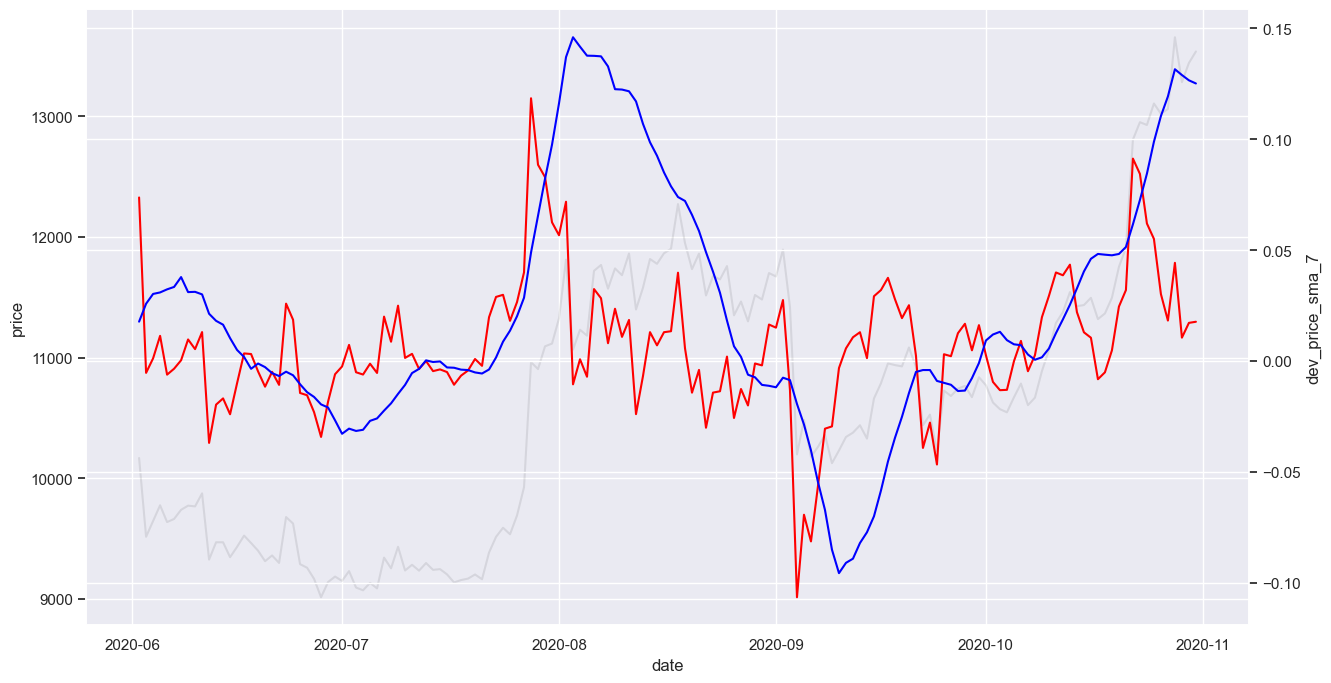

In [316]:
# plotting price signals 

from_date= '2020-06-01'
to_date= '2020-11-01' 

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_price_sma_7',
               data=plot_data[['date','dev_price_sma_7']],color='red',ax=ax2)


sns.lineplot(x='date', y='dev_price_7_30',
              data=plot_data[['date','dev_price_7_30']],color='blue',ax=ax2)


156.27792 505.4174800000001 34.91395600000001
16296.85 16696.15 9.982500000000028


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

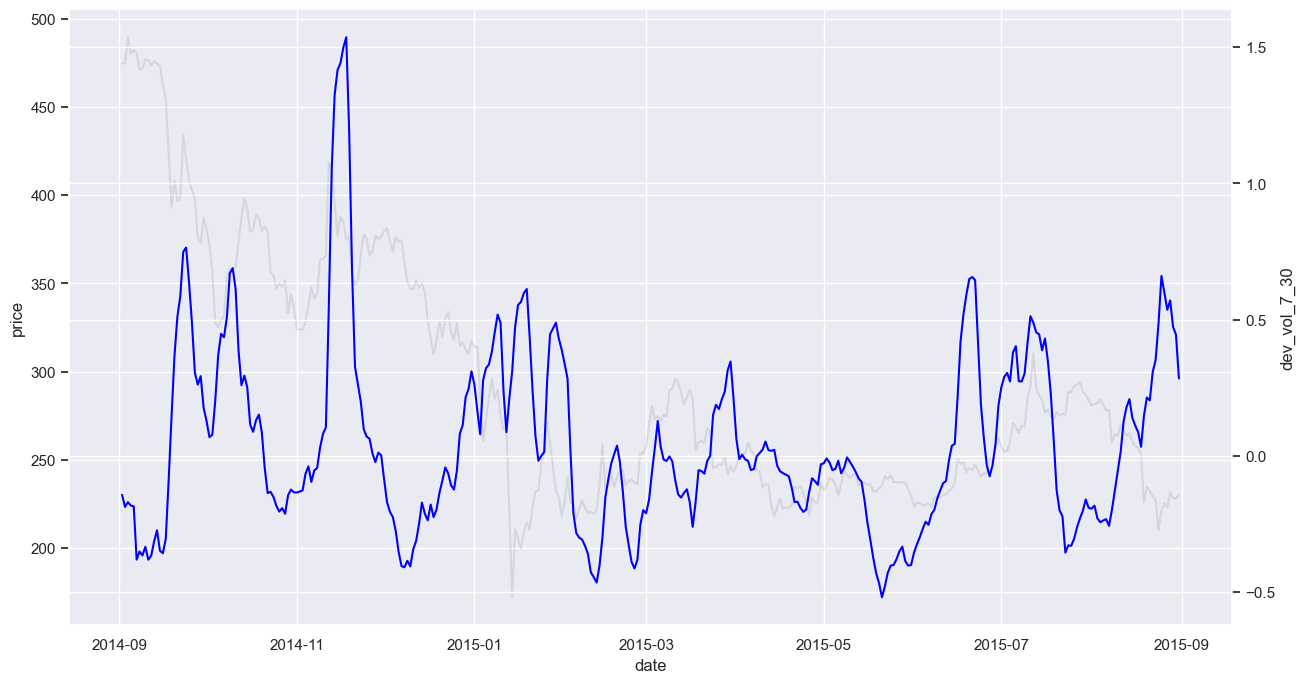

In [281]:
# plotting vol signals 

from_date= '2014-09-01'
to_date= '2015-09-01' 

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 

sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30']],color='blue',ax=ax2)


 ## Observations

* dev_price_7_30 looks like a good signal and when it is positive it is a good signal to buy however, its a bit laggy and might come a bit late, speically if it was already negative

* to fix the lag issue, we can look at dev_price_7_30 when its negative and if trend changes *shaprly* (needs to be defined) then we can say its a BUY 

* dev_price_7 and price_sma_7 are too noisy to infer a signal so not using htem 

* dev_vol_7_30 also reverses trend from negative to positive when its time to buy, if required, I can use it as a filter for my buy signal


359.17679999999996 473.0311999999999 11.385439999999996
16796.05 16926.95 3.2725000000000364


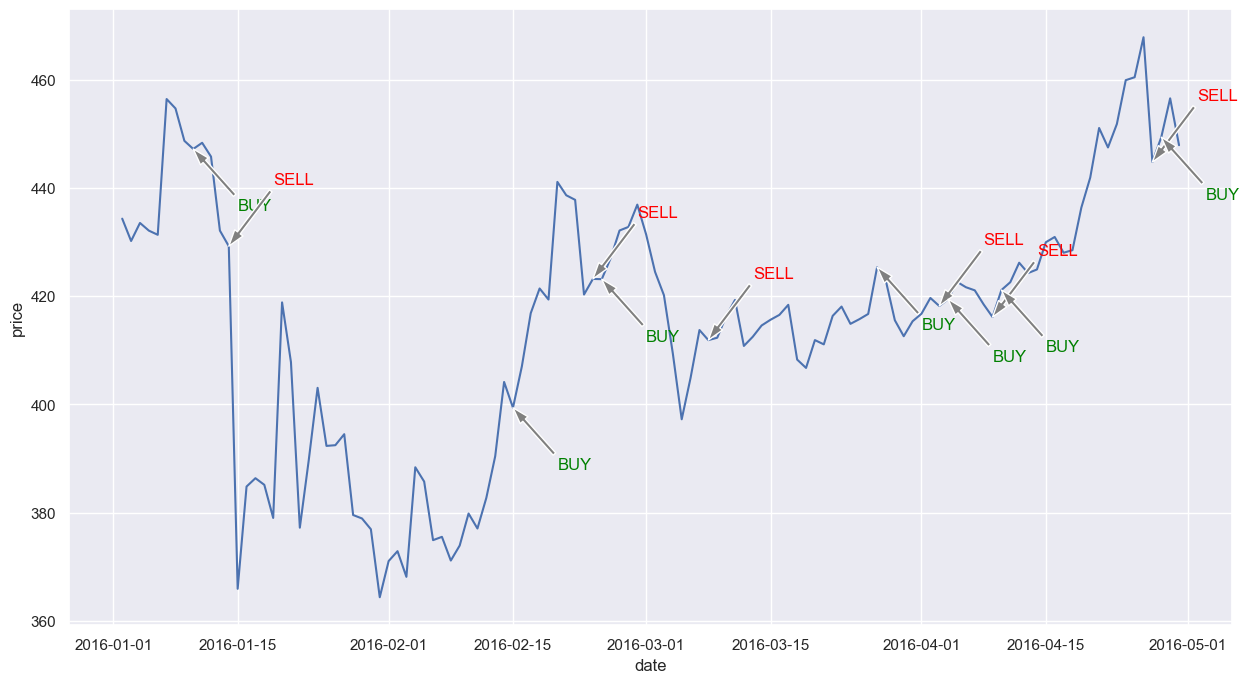

In [271]:
from_date= '2016-01-01' 
to_date= '2016-05-01'


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)

359.17679999999996 473.0311999999999 11.385439999999996
16796.05 16926.95 3.2725000000000364


<Axes: xlabel='date', ylabel='dev_price_sma_7'>

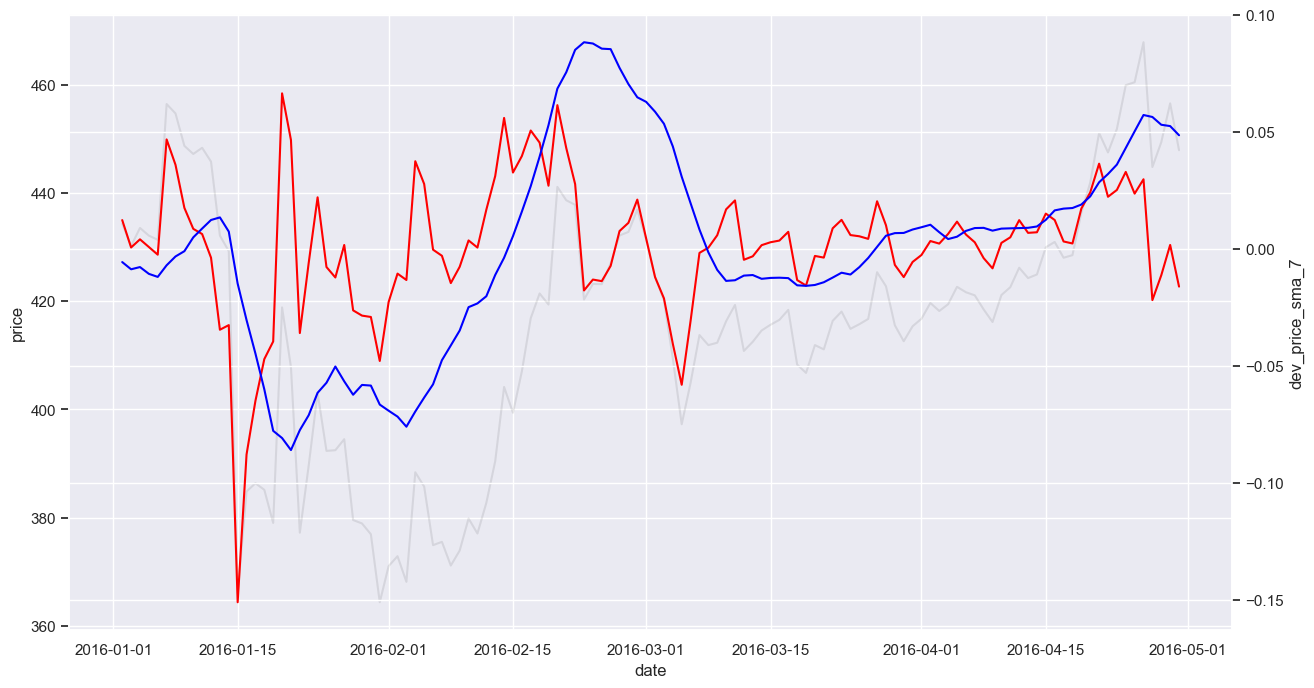

In [282]:
# plotting price signals 
from_date= '2016-01-01' 
to_date= '2016-05-01'

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_price_sma_7',
               data=plot_data[['date','dev_price_sma_7']],color='red',ax=ax2)


sns.lineplot(x='date', y='dev_price_7_30',
              data=plot_data[['date','dev_price_7_30']],color='blue',ax=ax2)


359.17679999999996 473.0311999999999 11.385439999999996
16796.05 16926.95 3.2725000000000364


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

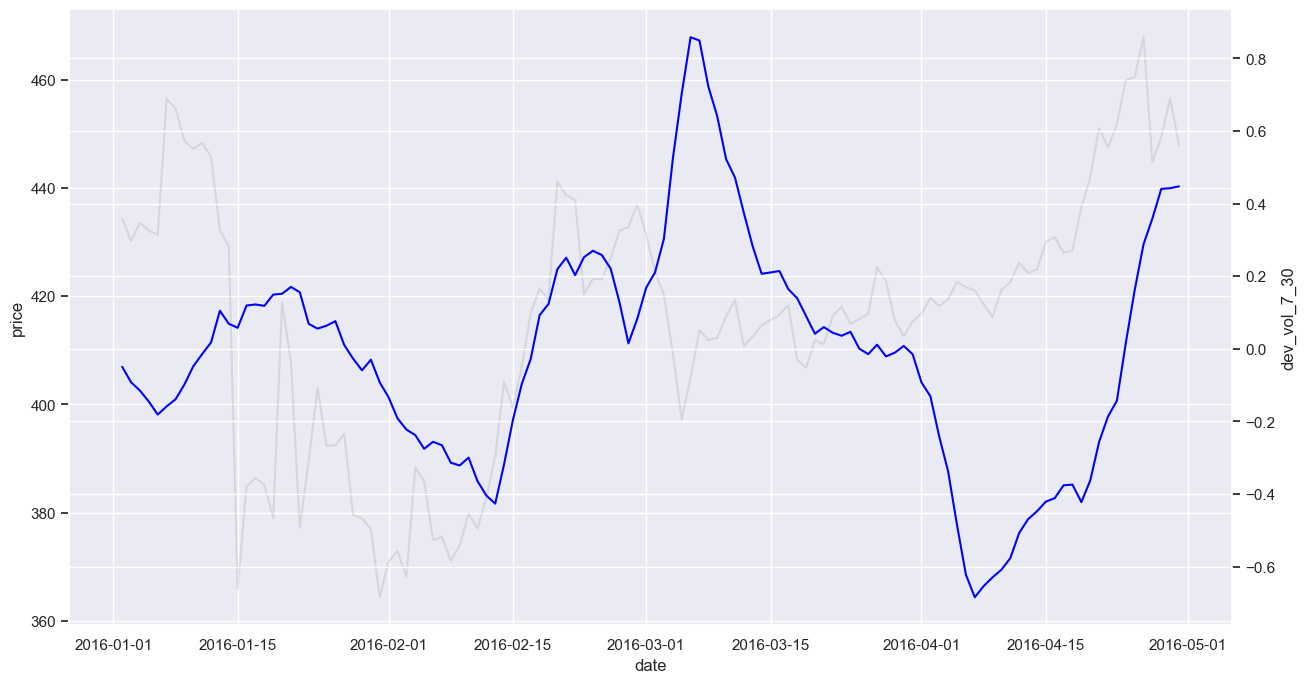

In [283]:
# plotting vol signals 
from_date= '2016-01-01' 
to_date= '2016-05-01'

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 

sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30']],color='blue',ax=ax2)



## A potential algo for a better biy signal (that filters fake buys as well)

* IF dev_price_7_30 is negative, and trend change is REV_UP and(optionally)  dev_vol_7_30  is REV_UP then BUY
* ELSE IF dev_price_7_30 >0 buy 
MIGHT NEED to ADD
* filter on sharp price trend reversals instead of any reversal (needs to be defined)
(to think about)
should i intorudce a quantum of trend reversal to filter fake trend reversals?

### 1. Try building a singal without adding sharpness or vol 7 30 trend, test extensively 

In [395]:
btc_hist_prices['signal'] = None 
btc_hist_prices['trade_reco'] = None 

# Calculate BUY signals

for index, row in btc_hist_prices.iterrows():
     if ((row['dev_price_7_30_trend'] =='UP') & (row['dev_vol_7_30_trend'] =='UP')):
        btc_hist_prices.at[index,'signal'] ='BUY'
#      if ((row['dev_price_7_30'] <0)& (row['dev_price_7_30_trend']=='REV_UP')& ((row['dev_vol_7_30_trend']=='REV_UP')|(row['dev_vol_7_30_trend']=='UP'))):
#          btc_hist_prices.at[index,'signal'] ='BUY'


        
# # calculate SELL signals 
for index, row in btc_hist_prices.iterrows():
    if (row['dev_price_7_30_trend']=='REV_DOWN'):
         btc_hist_prices.at[index,'signal'] ='SELL'
    elif ((row['dev_price_7_30'] <0)& (row['dev_price_7_30_trend']=='DOWN')):
        btc_hist_prices.at[index,'signal'] ='SELL'
            
#### HAVe REVISED SELL SIGNAL to add a condition that dev price 7 30 trend != REV_UP to signal a sell when its -ve

In [396]:
btc_hist_prices.trade_reco = None
start_date= btc_hist_prices.loc[0]['date']

for idate in btc_hist_prices.date : 
    if (idate<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(idate)=='BUY'):
        start_date=create_trade(idate) # record the trade and scan next 
        

15006.146117729972 31204.706918822245 1619.8560801092274
19225.0 19489.0 6.6000000000000005


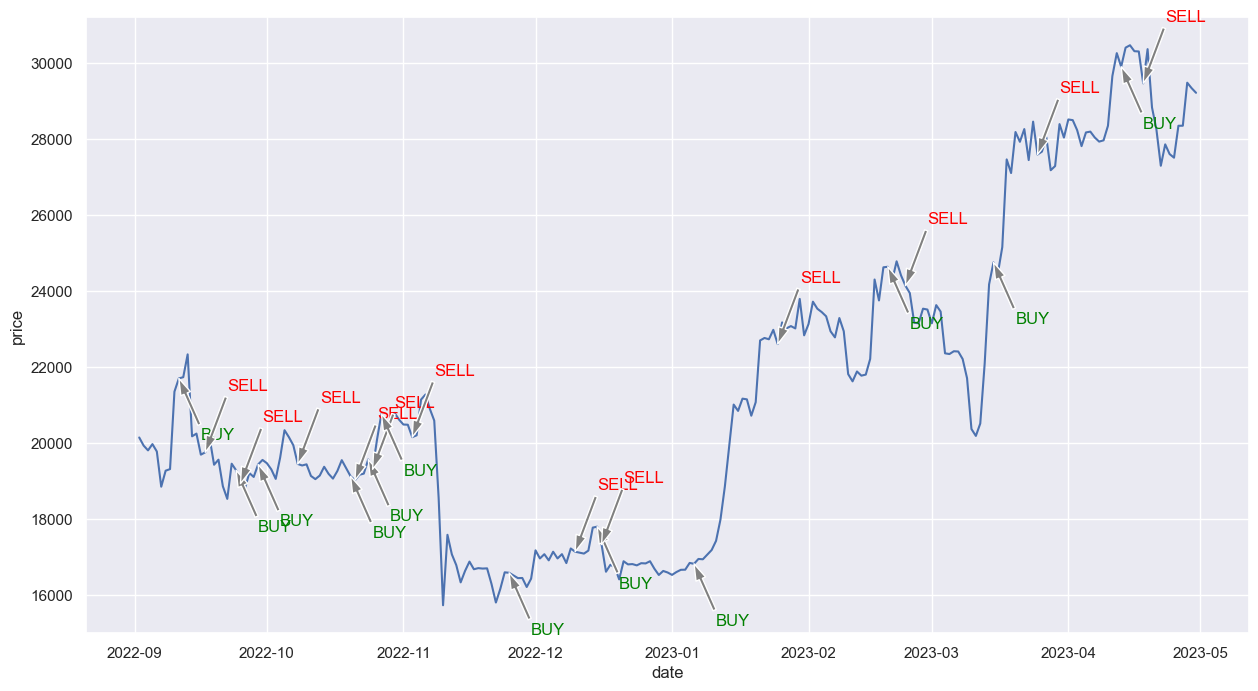

In [397]:
from_date= '2022-09-01' 
to_date= '2023-05-01'
# from_date= '2022-09-01' 
# to_date= '2023-05-01'


plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))

# ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_vol_7_30',
#               data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


# sns.lineplot(x='date', y='dev_price_sma_7',
#               data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)

# <font color='red'> (very important) Note </font>
At this point, I realised that its taking a bit more time than I was planning to spend on refininf the algorightm
Original plan was to get a v1 ready and hten do tuts and refactoring. However, its clear it will be much more helpful to reorganise the code so that i can developand test more effectively. Hence from this point on. I am going to refarctor this notebook and continue development.

15006.146117729972 31204.706918822245 1619.8560801092274
19225.0 19489.0 6.6000000000000005


<Axes: xlabel='date', ylabel='dev_price_7_30'>

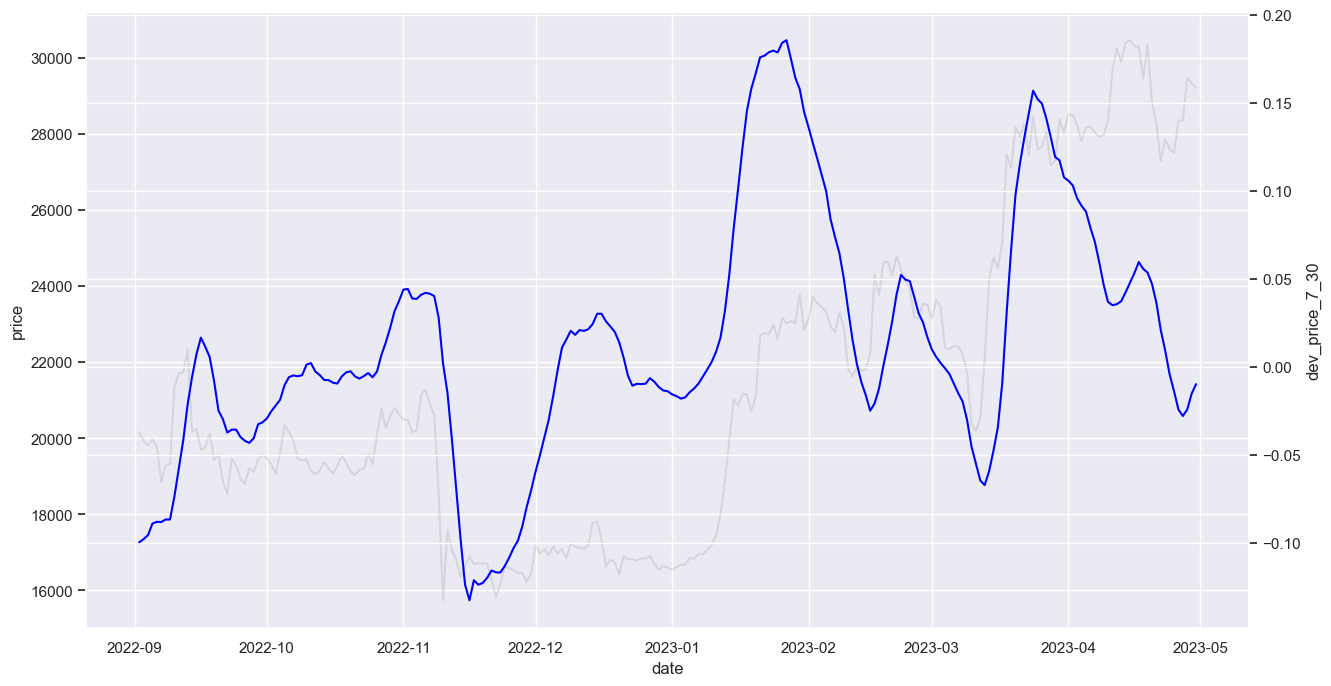

In [362]:
# plotting price signals 
from_date= '2022-09-01' 
to_date= '2023-05-01'

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_price_sma_7',
#                data=plot_data[['date','dev_price_sma_7']],color='red',ax=ax2)


sns.lineplot(x='date', y='dev_price_7_30',
              data=plot_data[['date','dev_price_7_30']],color='blue',ax=ax2)


15006.146117729972 31204.706918822245 1619.8560801092274
19225.0 19489.0 6.6000000000000005


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

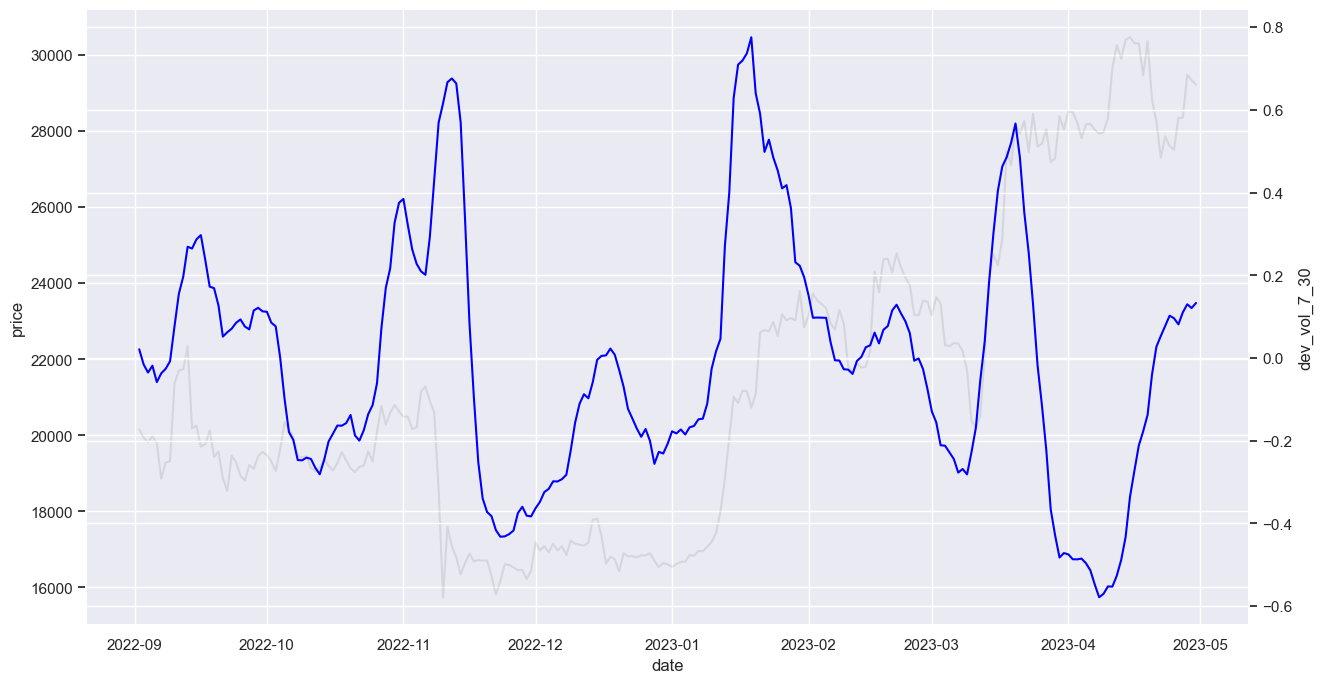

In [358]:
# plotting price signals 
from_date= '2022-09-01' 
to_date= '2023-05-01'

plot_data=btc_hist_prices[(btc_hist_prices['date']>from_date) & (btc_hist_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_price_sma_7',
#                data=plot_data[['date','dev_price_sma_7']],color='red',ax=ax2)


sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30']],color='blue',ax=ax2)


In [318]:
btc_hist_prices[['date','price','price_sma_30','dev_price_7_30','dev_price_7_30_diff','dev_price_7_30_trend']].tail(20)

date     price  price_sma_30  dev_price_7_30   
3480 2023-06-05 00:00:00  27315.45      27231.91        2.88e-03  \
3481 2023-06-06 00:00:00  25792.62      27128.74       -3.66e-03   
3482 2023-06-07 00:00:00  27216.62      27082.25       -4.58e-03   
3483 2023-06-08 00:00:00  26346.24      27037.23       -7.67e-03   
3484 2023-06-09 00:00:00  26507.91      27000.58       -8.00e-03   
3485 2023-06-10 00:00:00  26469.58      26961.58       -1.07e-02   
3486 2023-06-11 00:00:00  25858.12      26922.69       -1.57e-02   
3487 2023-06-12 00:00:00  25916.58      26893.65       -2.20e-02   
3488 2023-06-13 00:00:00  25910.36      26864.06       -2.03e-02   
3489 2023-06-14 00:00:00  25872.21      26829.41       -2.62e-02   
3490 2023-06-15 00:00:00  25107.75      26758.74       -3.03e-02   
3491 2023-06-16 00:00:00  25564.60      26710.13       -3.35e-02   
3492 2023-06-17 00:00:00  26327.33      26674.71       -3.30e-02   
3493 2023-06-18 00:00:00  26501.04      26663.32       -2.92e-02   
3494 2023-06-19 00:00:00  26333.09      26644.94       -2.63e-02   
3495 2023-06-20 00:00:00  26779.39      26634.46       -2.12e-02   
3496 2023-06-21 00:00:00  28330.89      26686.36       -9.96e-03   
3497 2023-06-22 00:00:00  30101.76      26794.10        1.27e-02   
3498 2023-06-23 00:00:00  29935.63      26884.52        3.25e-02   
3499 2023-06-23 05:35:52  30048.44      27008.17        4.75e-02   

      dev_price_7_30_diff dev_price_7_30_trend  
3480            -1.46e-03             REV_DOWN  
3481            -6.54e-03                 DOWN  
3482            -9.13e-04                 DOWN  
3483            -3.09e-03                 DOWN  
3484            -3.26e-04                 DOWN  
3485            -2.69e-03                 DOWN  
3486            -4.98e-03                 DOWN  
3487            -6.37e-03                 DOWN  
3488             1.70e-03               REV_UP  
3489            -5.89e-03                 DOWN  
3490            -4.04e-03                 DOWN  
3491            -3.28e-03                 DOWN  
3492             5.22e-04               REV_UP  
3493             3.86e-03                   UP  
3494             2.90e-03                   UP  
3495             5.04e-03                   UP  
3496             1.13e-02                   UP  
3497             2.26e-02                   UP  
3498             1.98e-02                   UP  
3499             1.50e-02                   UP

In [319]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30','signal', 'trade_reco']].tail(20)

date     price  price_sma_30  dev_price_sma_30 signal   
3480 2023-06-05 00:00:00  27315.45      27231.91          3.07e-03   SELL  \
3481 2023-06-06 00:00:00  25792.62      27128.74         -4.93e-02   SELL   
3482 2023-06-07 00:00:00  27216.62      27082.25          4.96e-03   SELL   
3483 2023-06-08 00:00:00  26346.24      27037.23         -2.56e-02   SELL   
3484 2023-06-09 00:00:00  26507.91      27000.58         -1.82e-02   SELL   
3485 2023-06-10 00:00:00  26469.58      26961.58         -1.82e-02   SELL   
3486 2023-06-11 00:00:00  25858.12      26922.69         -3.95e-02   SELL   
3487 2023-06-12 00:00:00  25916.58      26893.65         -3.63e-02   SELL   
3488 2023-06-13 00:00:00  25910.36      26864.06         -3.55e-02   None   
3489 2023-06-14 00:00:00  25872.21      26829.41         -3.57e-02   SELL   
3490 2023-06-15 00:00:00  25107.75      26758.74         -6.17e-02   SELL   
3491 2023-06-16 00:00:00  25564.60      26710.13         -4.29e-02   SELL   
3492 2023-06-17 00:00:00  26327.33      26674.71         -1.30e-02   None   
3493 2023-06-18 00:00:00  26501.04      26663.32         -6.09e-03   SELL   
3494 2023-06-19 00:00:00  26333.09      26644.94         -1.17e-02   SELL   
3495 2023-06-20 00:00:00  26779.39      26634.46          5.44e-03   SELL   
3496 2023-06-21 00:00:00  28330.89      26686.36          6.16e-02   SELL   
3497 2023-06-22 00:00:00  30101.76      26794.10          1.23e-01    BUY   
3498 2023-06-23 00:00:00  29935.63      26884.52          1.13e-01    BUY   
3499 2023-06-23 05:35:52  30048.44      27008.17          1.13e-01    BUY   

     trade_reco  
3480       None  
3481       None  
3482       None  
3483       None  
3484       None  
3485       None  
3486       None  
3487       None  
3488       None  
3489       None  
3490       None  
3491       None  
3492       None  
3493       None  
3494       None  
3495       None  
3496       None  
3497       None  
3498       None  
3499       None

In [335]:
btc_hist_prices[['date','price','price_sma_30','dev_price_sma_30',
                       'signal', 'trade_reco']] [(btc_hist_prices['trade_reco']=='BUY') 
                                                 | (btc_hist_prices['trade_reco']=='SELL')].tail(50)

date     price  price_sma_30  dev_price_sma_30 signal   
3166 2022-07-26 00:00:00  21330.30      21037.01          1.39e-02   SELL  \
3167 2022-07-27 00:00:00  21235.61      21043.11          9.15e-03    BUY   
3172 2022-08-01 00:00:00  23379.70      21624.88          8.11e-02   SELL   
3173 2022-08-02 00:00:00  23333.75      21760.40          7.23e-02    BUY   
3175 2022-08-04 00:00:00  22860.42      21971.97          4.04e-02   SELL   
3176 2022-08-05 00:00:00  22678.36      22054.96          2.83e-02    BUY   
3187 2022-08-16 00:00:00  24179.01      23154.82          4.42e-02   SELL   
3188 2022-08-17 00:00:00  23913.33      23257.79          2.82e-02    BUY   
3192 2022-08-21 00:00:00  21175.23      23141.06         -8.49e-02   SELL   
3217 2022-09-15 00:00:00  20255.92      20836.20         -2.78e-02    BUY   
3219 2022-09-17 00:00:00  19764.41      20575.99         -3.94e-02   SELL   
3220 2022-09-18 00:00:00  20131.68      20472.10         -1.66e-02    BUY   
3221 2022-09-19 00:00:00  19437.16      20421.81         -4.82e-02   SELL   
3242 2022-10-10 00:00:00  19448.15      19745.01         -1.50e-02    BUY   
3244 2022-10-12 00:00:00  19058.63      19570.15         -2.61e-02   SELL   
3259 2022-10-27 00:00:00  20774.25      19462.45          6.74e-02    BUY   
3266 2022-11-03 00:00:00  20162.98      19723.76          2.23e-02   SELL   
3267 2022-11-04 00:00:00  20210.91      19719.28          2.49e-02    BUY   
3270 2022-11-07 00:00:00  20907.00      19845.02          5.35e-02   SELL   
3271 2022-11-08 00:00:00  20597.76      19884.34          3.59e-02    BUY   
3274 2022-11-11 00:00:00  17594.92      19692.68         -1.07e-01   SELL   
3300 2022-12-07 00:00:00  17085.64      16868.61          1.29e-02    BUY   
3303 2022-12-10 00:00:00  17149.82      16746.40          2.41e-02   SELL   
3304 2022-12-11 00:00:00  17125.36      16730.75          2.36e-02    BUY   
3309 2022-12-16 00:00:00  17338.36      16845.85          2.92e-02   SELL   
3310 2022-12-17 00:00:00  16623.76      16843.66         -1.31e-02    BUY   
3315 2022-12-22 00:00:00  16816.85      16891.37         -4.41e-03   SELL   
3334 2023-01-10 00:00:00  17194.91      16886.55          1.83e-02    BUY   
3349 2023-01-25 00:00:00  22610.01      18860.99          1.99e-01   SELL   
3350 2023-01-26 00:00:00  23180.42      19070.33          2.16e-01    BUY   
3352 2023-01-28 00:00:00  23082.86      19499.23          1.84e-01   SELL   
3353 2023-01-29 00:00:00  23022.23      19711.82          1.68e-01    BUY   
3368 2023-02-13 00:00:00  21779.87      22501.97         -3.21e-02   SELL   
3373 2023-02-18 00:00:00  24628.82      22894.98          7.57e-02    BUY   
3378 2023-02-23 00:00:00  24146.10      23228.22          3.95e-02   SELL   
3379 2023-02-24 00:00:00  23951.11      23272.93          2.91e-02    BUY   
3387 2023-03-04 00:00:00  22367.43      23279.58         -3.92e-02   SELL   
3401 2023-03-18 00:00:00  27466.68      23365.50          1.76e-01    BUY   
3408 2023-03-25 00:00:00  27595.49      24176.48          1.41e-01   SELL   
3409 2023-03-26 00:00:00  27670.20      24300.45          1.39e-01    BUY   
3432 2023-04-18 00:00:00  29467.46      28567.70          3.15e-02   SELL   
3433 2023-04-19 00:00:00  30365.90      28640.34          6.02e-02    BUY   
3438 2023-04-24 00:00:00  27606.58      28645.65         -3.63e-02   SELL   
3446 2023-05-02 00:00:00  28125.50      28848.98         -2.51e-02    BUY   
3449 2023-05-05 00:00:00  28846.46      28924.37         -2.69e-03   SELL   
3478 2023-06-03 00:00:00  27247.74      27364.75         -4.28e-03    BUY   
3480 2023-06-05 00:00:00  27315.45      27231.91          3.07e-03   SELL   
3497 2023-06-22 00:00:00  30101.76      26794.10          1.23e-01    BUY   
3498 2023-06-23 00:00:00  29935.63      26884.52          1.13e-01    BUY   
3499 2023-06-23 05:35:52  30048.44      27008.17          1.13e-01    BUY   

     trade_reco  
3166       SELL  
3167        BUY  
3172       SELL  
3173        BUY  
31

### 2. Add vol 7 30 trend, test extensively 

### 3. add sharpness if needed, test extenstively 

### (Maybe) better buy signal 

# Improving algo v0.1.1 - Continue improving algo (continuation of algo until 23 June)

**Based on the observation above, I will modify my algo to:**
    
    1. BUY when 7 day vol changes trend AND price 7 30 is in a positive trend A (MAYBE Add: AND price 7 30 is in a positive trend )
    2. SELL when 7 day vol changes trend AND price 7 30 is in a downward trend (this might require more thought)

<i> **Other indicators that I might add if needed** </i>
1. price sma 7 being positive is usually means that we must be in an upmove
2. price sma 7 changing course/spiking might indicate a price run-up


<b> ToDOs </b>


1. Add vol 7 spike detector
2. Add price 7 30 trend indicator
3. Add price 7 spike detector
4. Add vol 7 30 trend indicator
5. Update algo
6. visualise and iterate
7. See if combining bits of this with the v0.2 based on just price sma30 makes for a better algo 






## # <font color='orange'>To Do Later for code improvement and learning </font>
 
1. i should add exception handling and make my code robust against edge cases like invalid date, start/end of arrays etc. 
2. but now i must focus on getting a version up and ready first 
3. I could re-write create_trade using recursion 
4. I could understand what unit testing is and do a bunch of it in my code 

## OTHER explorations (not being used at the moment)

In [ ]:
#BUBBLE PLOT (OLD) ### OLDER Plot, not using currently ###
# from https://seaborn.pydata.org/examples/scatter_bubbles.html
##sns.relplot(x='date',y='volume',hue='coin',size='price',palette='muted',height=12, data=btc_eth_hist_prices)

In [ ]:
# filtering only on btc data source: https://towardsdatascience.com/8-ways-to-filter-pandas-dataframes-d34ba585c1b8 
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_hist_prices[btc_eth_hist_prices.coin=='btc'])

In [ ]:
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_hist_prices[btc_eth_hist_prices.coin=='eth'])

In [ ]:
# make a wide array like before and do some ratios and plotting on 2 axes adn stuff like that 

In [ ]:
# plotting with 2 different vertical axes

In [ ]:
ax=btc_eth_hist_prices.plot(x="date",y="price")

In [ ]:
# generic function to fetch historical crypto prices into a data frame 

In [ ]:
# fetch the list of cryptos i am interested in

In [ ]:
# loop through the cryptos, fetch the prices, and aggregate in a dataframe

In [ ]:
# plot them all together 

In [ ]:
# grab an element in each row, put the date from the first one in a new dataframe, 
# and grab the price from the list, convert it to float, do the same for mcap and volume, build a row and append to 
# new dataframe 

### Volume trends for top 10 crypto over last 3 months 
**Plot a graph showing line charts of top 10 crypto currencies by trading volume for each day** 
1. Grab a set of cryptos that were in teh top 10 traded in the last 3 months at any time 
2. Plot their volume traded daily 
3. Let the size of the circle represent price of the asset (we will see if this is possible )

### PLAYING AROUND WITH GRAPHING (NEHAS CODE TO BE USED AS A BASE FOR FURTHER EXPLORATION)

In [ ]:
top_crypto_vol.plot.bar(x='symbol', y='market_cap')

In [ ]:
top_crypto_vol.plot.scatter(x='current_price', y='market_cap')

In [ ]:
top_crypto_vol.plot.line(x='current_price', y='market_cap')

## Playing around with some interesting API features

### some of these would be signals for my trading algo 

### Trending on coingecko

In [ ]:
cg.get_search_trending()

### Exchange volumes

In [ ]:
cg.get_exchanges_list()

In [ ]:
cg.get_exchanges_by_id(id="binance")

### Defi 

In [ ]:
cg.get_global_decentralized_finance_defi()

### Public companies holding crypto (known)

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "ethereum")

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "bitcoin")